### Importing packages and settings

In [30]:
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
os.chdir("D:\\DS\\Machine learning\\Assignment")
mush=pd.read_csv('D19022.csv')

In [2]:
#To see all columns of dataframe
pd.set_option('display.max_columns', 25)

### Data exploration

In [33]:
#Total number of nulls
mush.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [4]:
mush.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape stalk-root  \
count          8124      8124       8124        8124       8124   
unique            2         2         12           2          5   
top               c         b          b           t          b   
freq           6812      5612       1728        4608       3776   

       stalk-surface-above-ring stalk-surface-below-ring  \
count                      8124                     8124   
unique                        4                        4   
top                           s                        s   
freq                       5176                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148

In [5]:
#Only one unique value in veil type, so its not useful for prediction purpose. We will remove it.
del mush['veil-type']

In [6]:
mush.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color stalk-shape stalk-root  \
count          8124      8124       8124        8124       8124   
unique            2         2         12           2          5   
top               c         b          b           t          b   
freq           6812      5612       1728        4608       3776   

       stalk-surface-above-ring stalk-surface-below-ring  \
count                      8124                     8124   
unique                        4                        4   
top                           s                        s   
freq                       5176                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-color ring-number  \
count                    8124                   8124       8124        8124   
unique                      9                      9          4           3   
top                         w                      w          w           o   
freq                     4464                   4384       7924        7488   

       ring-type spore-print-color population habitat  
count       8124              8124       8124    8124  
unique         5                 9          6       7  
top            p                 w          v       d  
freq        3968              2388       4040    3148

In [7]:
#Checking for duplicate values
print('Total values',len(mush))
print('Duplicate values',len(mush)-len(mush.drop_duplicates()))

Total values 8124
Duplicate values 0


In [8]:
# Checking if any set of attributes are classified into different classes.
print('Length without duplicate attributes:',len(mush.drop(labels='class',axis=1).drop_duplicates()))

Length without duplicate attributes: 8124


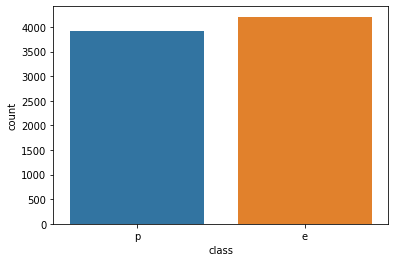

In [9]:
# Distribution of mushroom class
#plt.figure(figsize=(6,6))
sb.countplot('class',data=mush)

In [10]:
#Replacing all the single letter variable values with their full names
mush['cap-shape']=mush['cap-shape'].replace({'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'})
mush['cap-surface']=mush['cap-surface'].replace({'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'})
mush['cap-color']=mush['cap-color'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green' ,'p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
mush['bruises']=mush['bruises'].replace({'t':'bruises', 'f':'no bruises'})
mush['odor']=mush['odor'].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'})
mush['gill-attachment']=mush['gill-attachment'].replace({'a':'attached','d':'descending','f':'free','n':'notched'})
mush['gill-spacing']=mush['gill-spacing'].replace({'c':'close','w':'crowded','d':'distant'})
mush['gill-size']=mush['gill-size'].replace({'b':'broad','n':'narrow'})
mush['gill-color']=mush['gill-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
mush['stalk-shape']=mush['stalk-shape'].replace({'e':'enlarging','t':'tapering'})
mush['stalk-root']=mush['stalk-root'].replace({'b':'bulbous','c':'club','u':'cup' ,'e':'equal','z':'rhizomorphs' ,'r':'rooted','m':'missing' })
mush['stalk-surface-above-ring']=mush['stalk-surface-above-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
mush['stalk-surface-below-ring']=mush['stalk-surface-below-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
mush['stalk-color-above-ring']=mush['stalk-color-above-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})
mush['stalk-color-below-ring']=mush['stalk-color-below-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})
mush['veil-color']=mush['veil-color'].replace({'n':'brown','o':'orange','w':'white','y':'yellow'})
mush['ring-number']=mush['ring-number'].replace({'n':'none','o':'one','t':'two'})
mush['ring-type']=mush['ring-type'].replace({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'})
mush['spore-print-color']=mush['spore-print-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'})
mush['population']=mush['population'].replace({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'})
mush['habitat']=mush['habitat'].replace({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'})
mush['class']=mush['class'].replace({'e':'edible','p':'poisonous'})


In [5]:
mush['stalk-root']=mush['stalk-root'].replace({'b':'bulbous','c':'club','u':'cup' ,'e':'equal','z':'rhizomorphs' ,'r':'rooted','m':'?' })

In [6]:
mush['stalk-root']

0       equal
1        club
2        club
3       equal
4       equal
        ...  
8119        ?
8120        ?
8121        ?
8122        ?
8123        ?
Name: stalk-root, Length: 8124, dtype: object

In [9]:
mush['stalk-root'].replace({'?':Null})

NameError: name 'Null' is not defined

### Bi-variate analysis

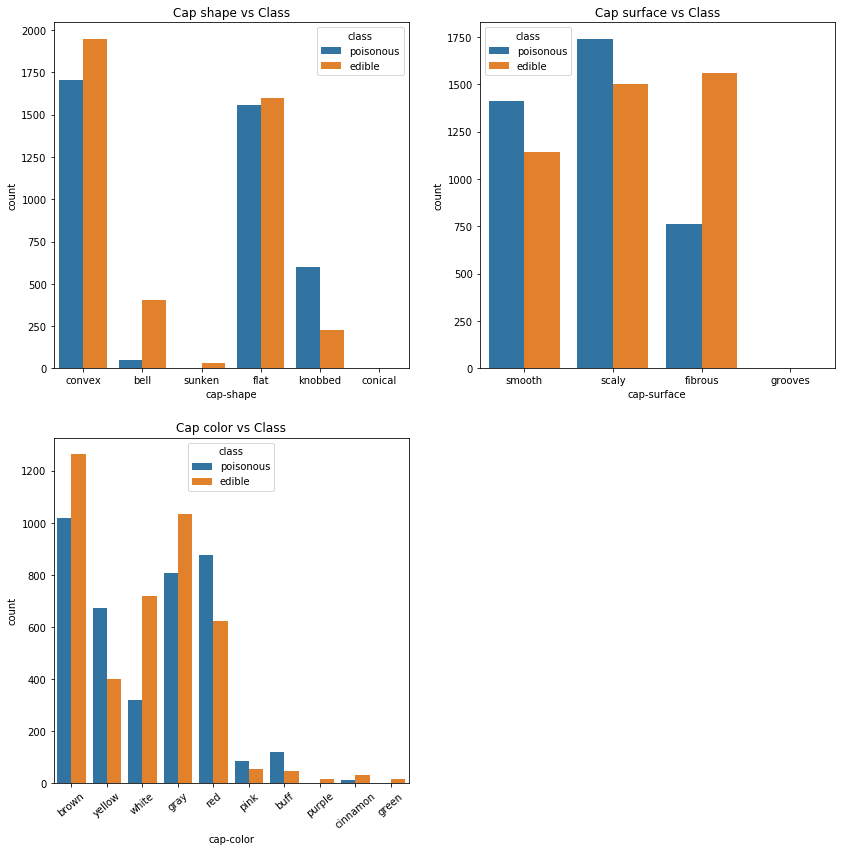

<Figure size 432x288 with 0 Axes>

In [11]:
#Cap features
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
sb.countplot(x='cap-shape',hue='class',data=mush)
plt.title('Cap shape vs Class')
plt.subplot(2,2,2)
sb.countplot(x='cap-surface',hue='class',data=mush,)
plt.title('Cap surface vs Class')
plt.xticks(rotation=0)
plt.subplot(2,2,3)
sb.countplot(x='cap-color',hue='class',data=mush)
plt.xticks(rotation=40)
plt.title('Cap color vs Class')
plt.show()
plt.subplots_adjust(hspace=0.3)

1) Mushroom with sunken cap shape is edible (but the number of data points is less).
<br> 2) Cap surface doesnt give much idea about the mushroom class.
<br> 3) Purple and green cap color mushrooms are edible (less data points).

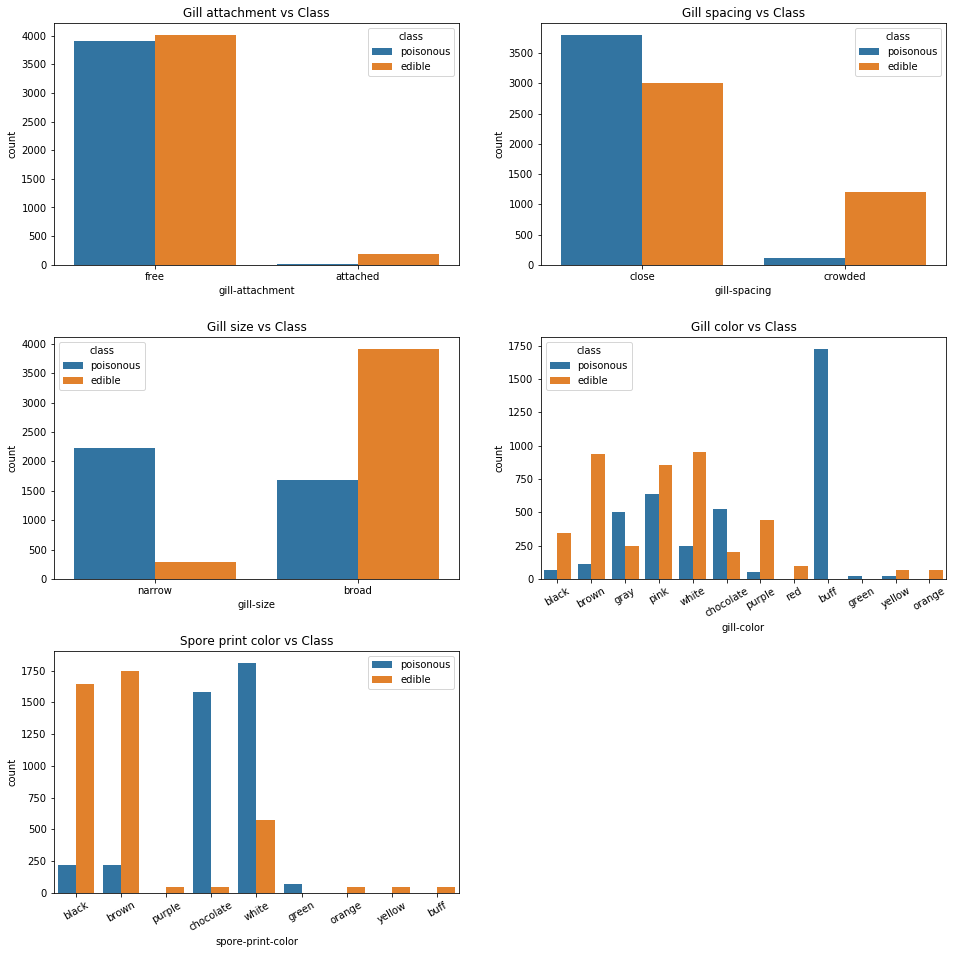

In [12]:
# Gill features
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.title('Gill attachment vs Class')
sb.countplot(x='gill-attachment',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,2)
plt.title('Gill spacing vs Class')
sb.countplot(x='gill-spacing',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,3)
plt.title('Gill size vs Class')
sb.countplot(x='gill-size',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,4)
plt.title('Gill color vs Class')
sb.countplot(x='gill-color',hue='class',data=mush,)
plt.xticks(rotation=30)
plt.subplot(3,2,5)
plt.title('Spore print color vs Class')
sb.countplot(x='spore-print-color',hue='class',data=mush)
plt.legend(loc='upper right')
plt.xticks(rotation=30)
plt.subplots_adjust(hspace=0.3)

1) Attached gill attachments are mostly edible.
<br> 2) Crowded gill spacing are mostly edible.
<br> 3) Narrow gill size is mostly poisonous.
<br> 4) Red and orange gill color mushrooms are edible. 
<br> 5) Buff and green gill color mushrooms are poisonous.
<br> 6) Mushroom with purple, orange, yellow and buff spore print color are edible.
<br> 7) Mushroom with green spore print color is poisonous. Even in other spore print color the distribution is heavily skewed towards one class.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

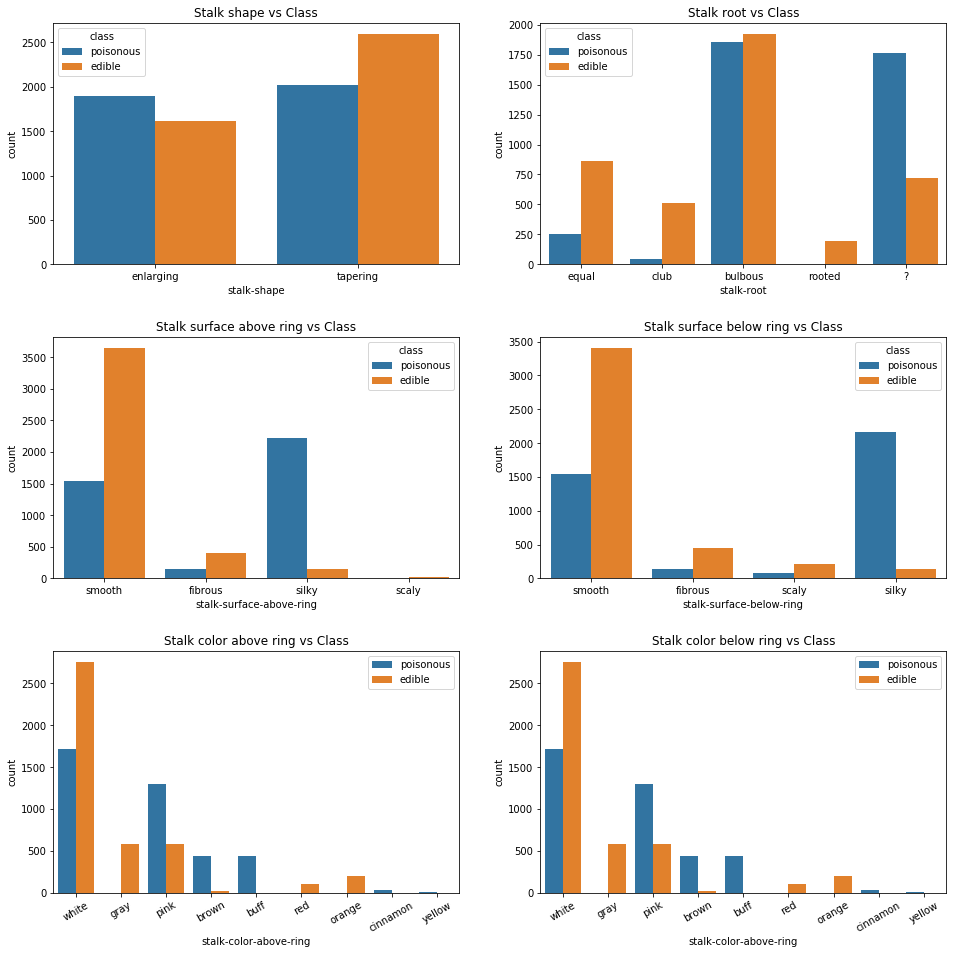

In [13]:
#Stalk features
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.title('Stalk shape vs Class')
sb.countplot(x='stalk-shape',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,2)
plt.title('Stalk root vs Class')
sb.countplot(x='stalk-root',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,3)
plt.title('Stalk surface above ring vs Class')
sb.countplot(x='stalk-surface-above-ring',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,4)
plt.title('Stalk surface below ring vs Class')
sb.countplot(x='stalk-surface-below-ring',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(3,2,5)
plt.title('Stalk color above ring vs Class')
sb.countplot(x='stalk-color-above-ring',hue='class',data=mush)
plt.legend(loc='upper right')
plt.xticks(rotation=30)
plt.subplot(3,2,6)
plt.title('Stalk color below ring vs Class')
sb.countplot(x='stalk-color-above-ring',hue='class',data=mush)
plt.legend(loc='upper right')
plt.subplots_adjust(hspace=0.3)
plt.xticks(rotation=30)

1) Stalk shape in itself doesnt give an idea about mushroom class.
<br> 2) Rooted stalk root mushrooms are edible.
<br> 3) Club and equal stalk root mushrooms are mostly edible.
<br> 4) Smooth stalk surface are mostly edible and silky ones are mostly poisonous. We can also see that stalk surface above and below ring have similar distribution.
<br> 5) Stalk color above and below ring are also similar. Grey, red and orange stalk colors means the mushroom is edible. Buff, cinnamon and yellow stalk color mean the mushroom is poisonous.

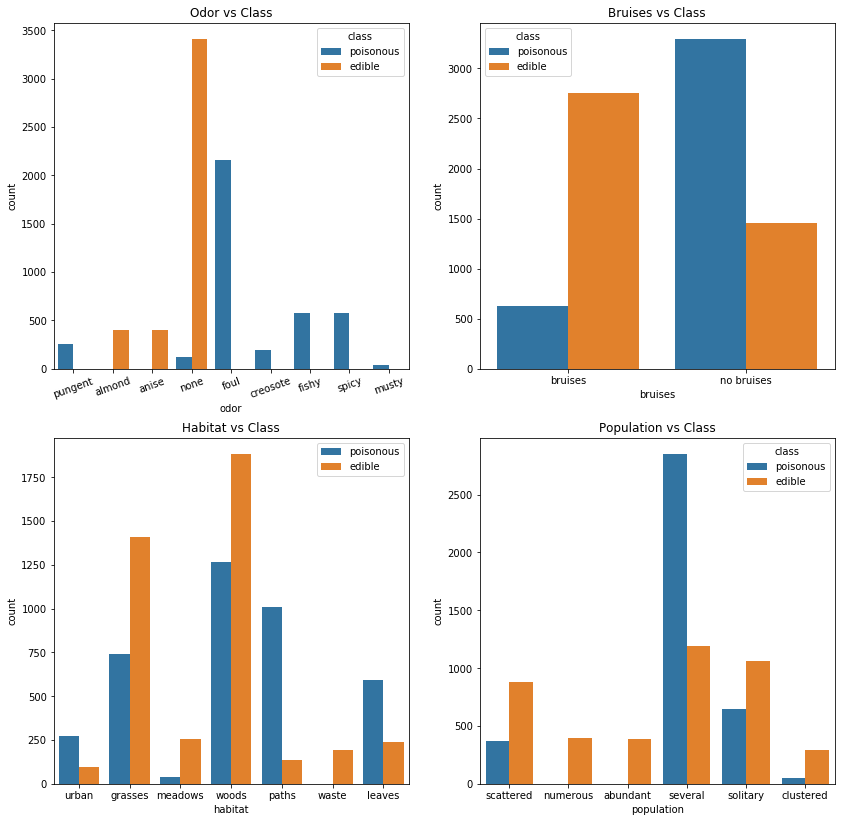

In [14]:
#Miscellaneous features
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.title('Odor vs Class')
sb.countplot(x='odor',hue='class',data=mush,)
plt.xticks(rotation=20)
plt.subplot(2,2,2)
plt.title('Bruises vs Class')
sb.countplot(x='bruises',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(2,2,3)
plt.title("Habitat vs Class")
sb.countplot(x='habitat',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.subplot(2,2,4)
plt.title("Population vs Class")
sb.countplot(x='population',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.2)
plt.show()

1) Odor can be used to determine the class of the mushroom except for mushrooms with none smell.
<br> 2) Bruises in itself cant be used to predict class.
<br> 3) Mushrooms growing in waste habitat are edible!!
<br> 4) Mushroom displaying numerous and abundant population characteristic are edible. 

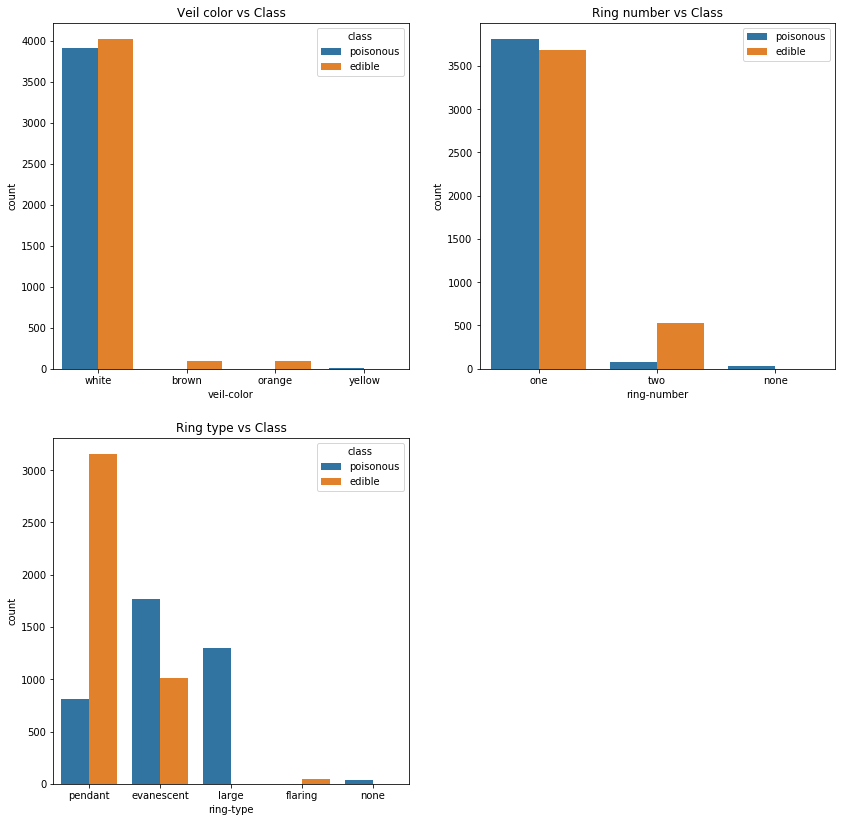

In [15]:
#Veil and ring features
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.title('Veil color vs Class')
sb.countplot(x='veil-color',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.subplot(2,2,2)
plt.title('Ring number vs Class')
sb.countplot(x='ring-number',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.subplot(2,2,3)
plt.title("Ring type vs Class")
sb.countplot(x='ring-type',hue='class',data=mush,)
plt.xticks(rotation=0)
plt.show()

1) Brown and orange veil color mushrooms are edible. Yellow veil color mushrooms are poisonous. But its based on a small number of data points.
<br> 2) Mushroom with no rings mean mushroom are poisonous (limited data points). Mushroom with two rings are mostly edible.
<br> 3) Mushroom with large and none ring type are poisonous while that with flaring is edible(but limited data points).

#### Simple Classification

Set of features which denote mushroom is edible:
    <br> 1) Sunken cap shape.
    <br> 2) Purple and green cap color.
    <br> 3) Red and orange gill color.
    <br> 4) Purple, orange, yellow and buff spore print color.
    <br> 5) Rooted stalk root
    <br> 6) Grey, red and orange stalk colors.
    <br> 7) Almond and anise mushroom odor.
    <br> 8) Mushroom in waste habitats.
    <br> 9) Numerous and abundant population characteristic.

Set of features which denote mushroom is poisonous:
<br> 1) Buff and green gill color.
<br> 2) Green spore print color.
<br> 3) Buff, cinnamon and yellow stalk color.
<br> 4) Pungent, foul, creosote, fishy, musty and spicy odor.
<br> 5) Mushroom with no rings.
<br> 6) None ring type.

### Correlation

In [16]:
import scipy.stats

In [17]:
props=list(mush.columns)
props.remove('class')
pval=[]
chi=[]
for i in props:
    ct=pd.crosstab(mush[i],columns=mush['class'])
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(ct)
    pval.append(p)
    chi.append(chi2)
chisq1=pd.DataFrame()
chisq1['Properties']=props
chisq1['P value']=pval
chisq1['Chi Square value']=chi
chisq1.sort_values('Chi Square value',ascending=False)

Properties        P value  Chi Square value
4                       odor   0.000000e+00       7659.726740
18         spore-print-color   0.000000e+00       4602.033170
8                 gill-color   0.000000e+00       3765.714086
17                 ring-type   0.000000e+00       2956.619278
11  stalk-surface-above-ring   0.000000e+00       2808.286287
12  stalk-surface-below-ring   0.000000e+00       2684.474076
7                  gill-size   0.000000e+00       2366.834257
13    stalk-color-above-ring   0.000000e+00       2237.898496
14    stalk-color-below-ring   0.000000e+00       2152.390891
3                    bruises   0.000000e+00       2041.415647
19                population   0.000000e+00       1929.740891
20                   habitat   0.000000e+00       1573.777261
10                stalk-root  7.702048e-290       1344.440527
6               gill-spacing  5.022978e-216        984.143333
0                  cap-shape  1.196457e-103        489.919954
2                  cap-color   6.055815e-78        387.597769
16               ring-number   4.235758e-82        374.736831
1                cap-surface   5.518427e-68        315.042831
15                veil-color   3.320973e-41        191.223702
5            gill-attachment   5.501707e-31        133.986181
9                stalk-shape   4.604746e-20         84.142038

The chi square values can be understood through the count plots too. A high chi square value indicates that that variable is strongly associated with the target. On checking countplot for odor vs class we can see that except for none odor all cases are either poisonous or edible(i.e. they can uniquely determine the class). Store print color also displays a similar trait but to a lesser extent(black,brown and white spore print color means the class is ambiguous). On the other hand stalk shape has 2 possible values which have more or less a equal distribution between edible and poisonous. But the distribution doesnt follow expected which means its still an important variable.

### Trivariate analysis

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


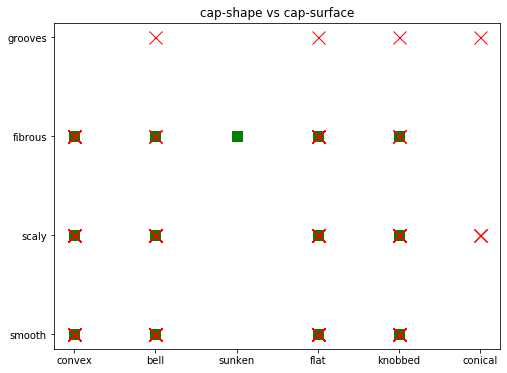

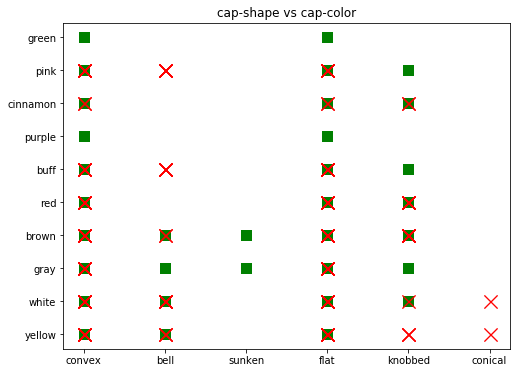

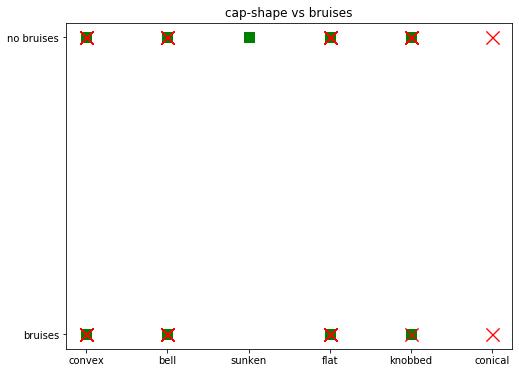

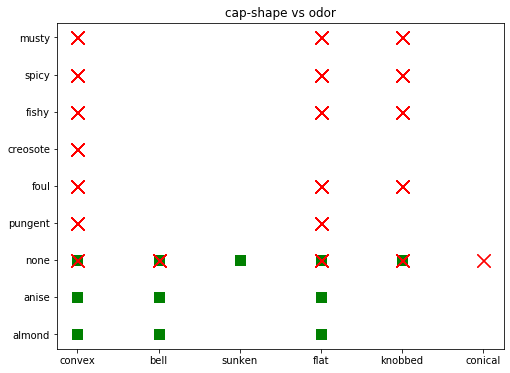

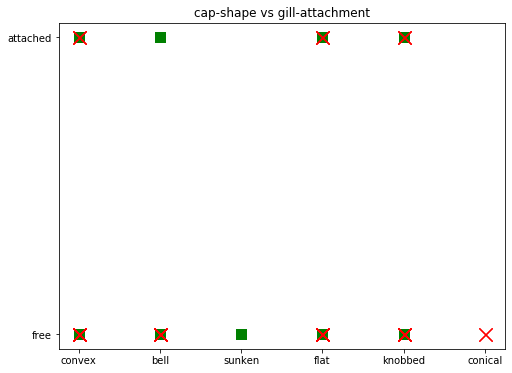

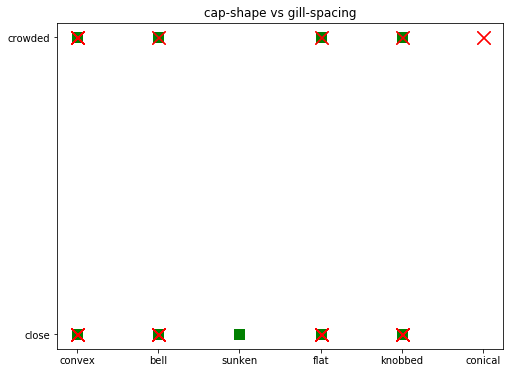

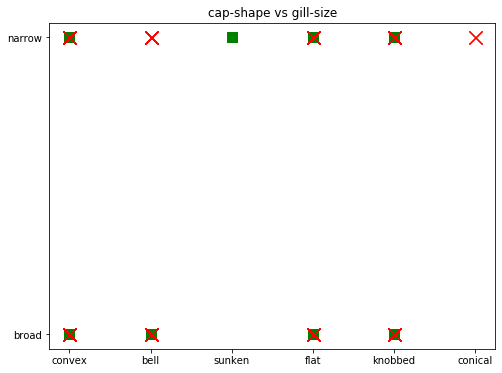

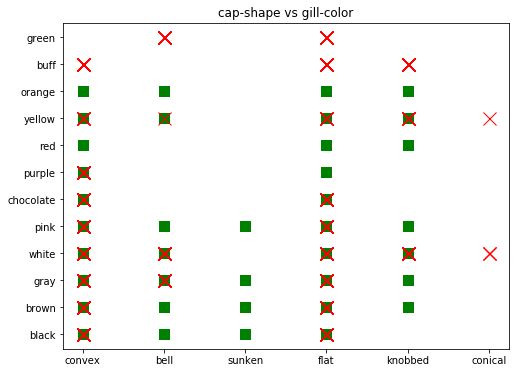

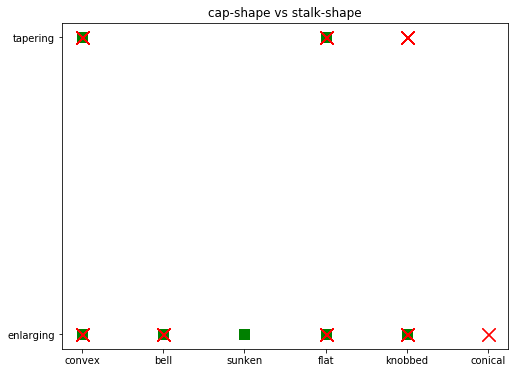

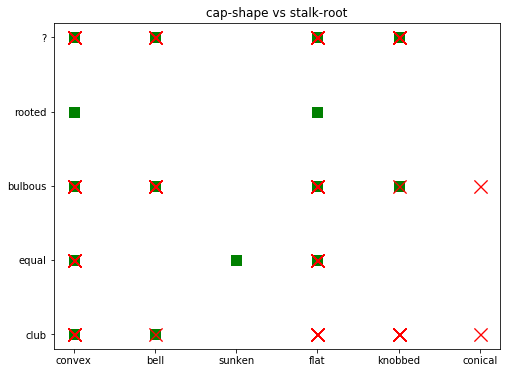

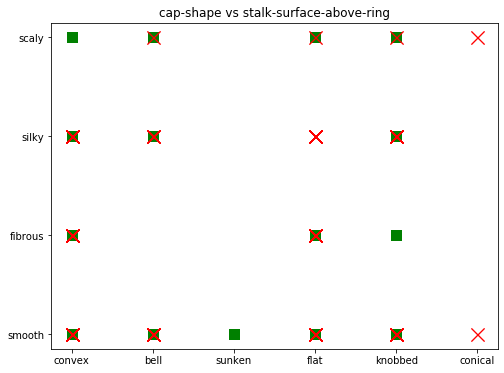

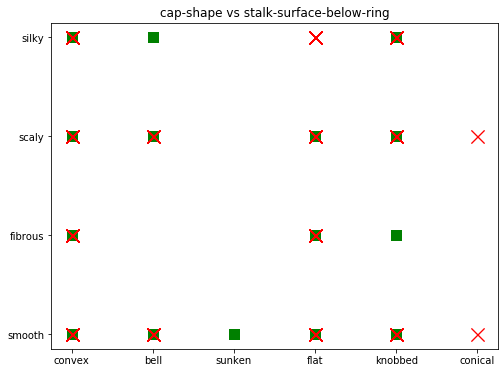

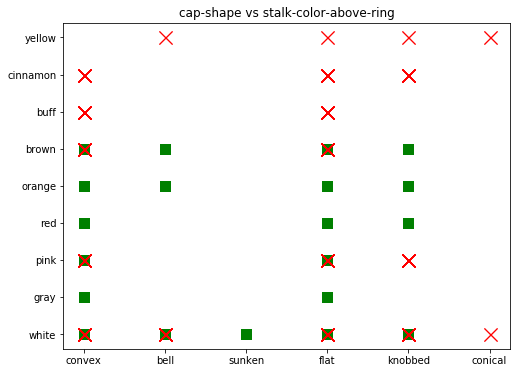

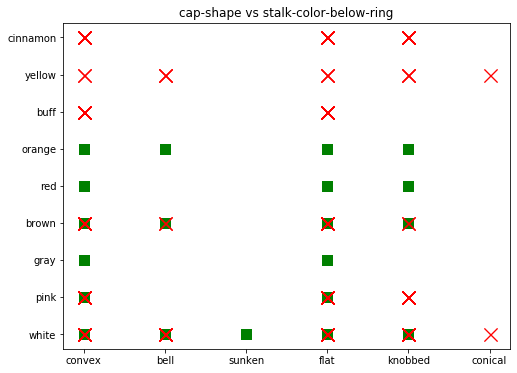

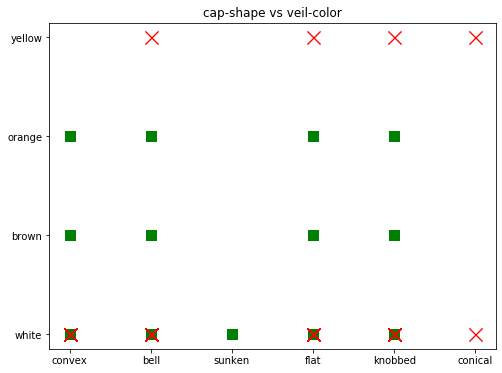

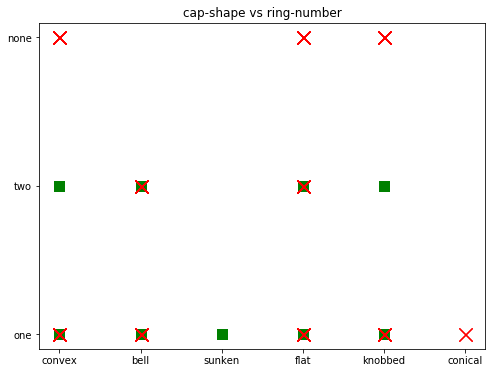

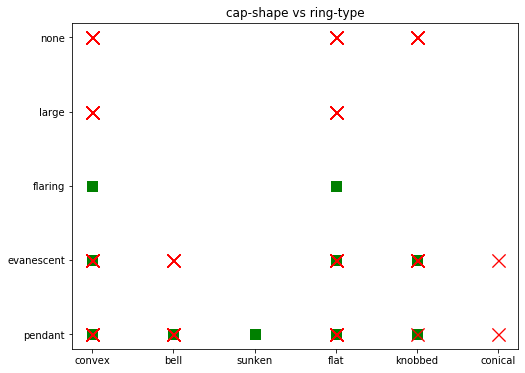

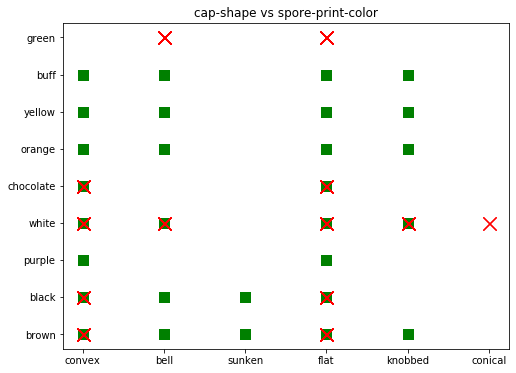

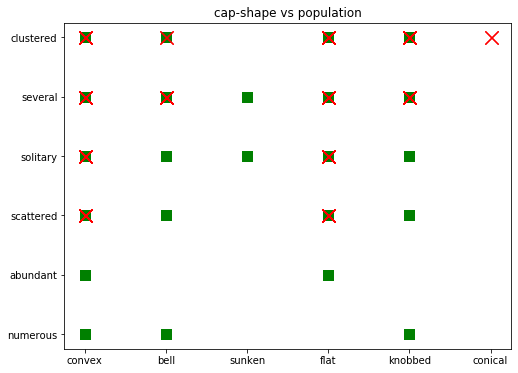

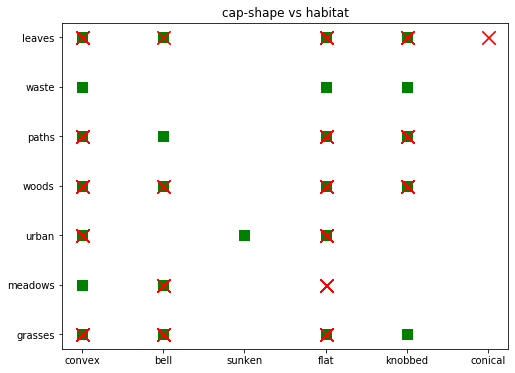

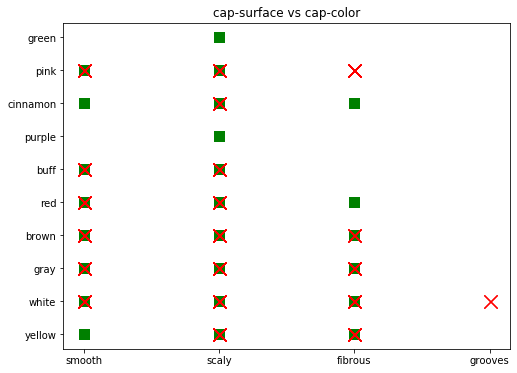

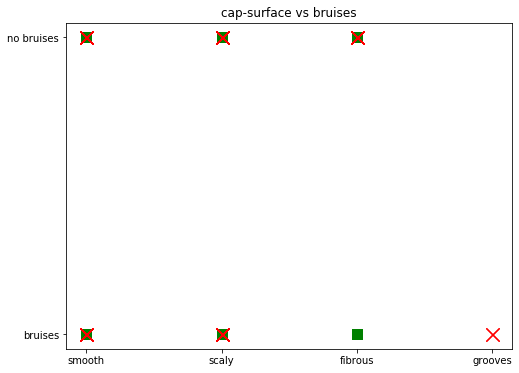

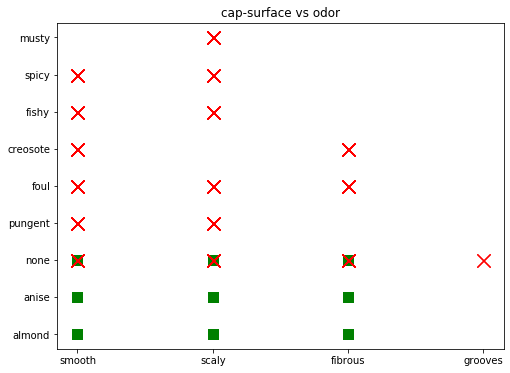

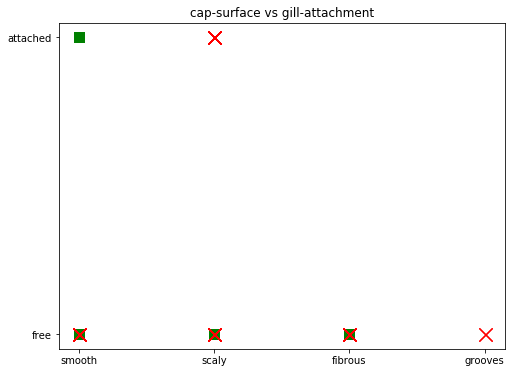

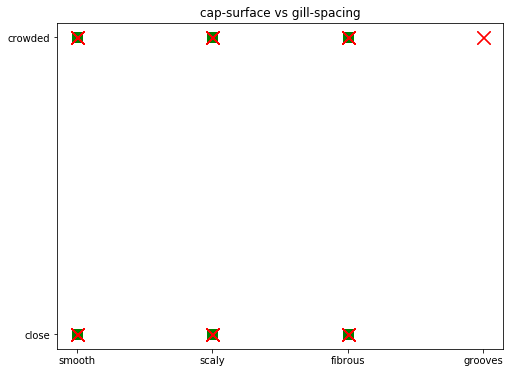

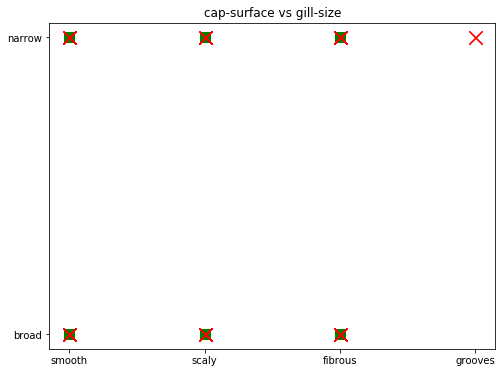

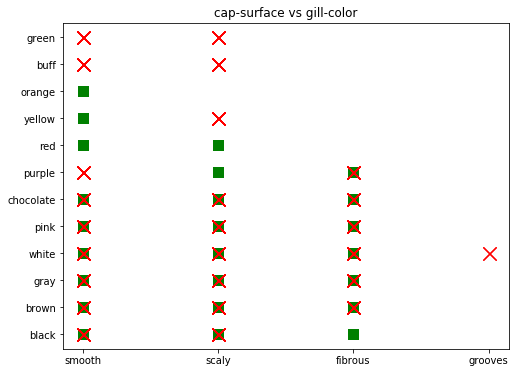

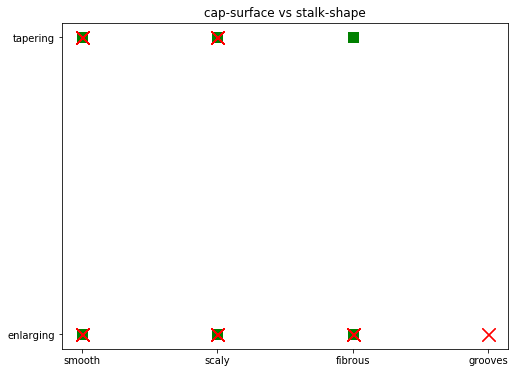

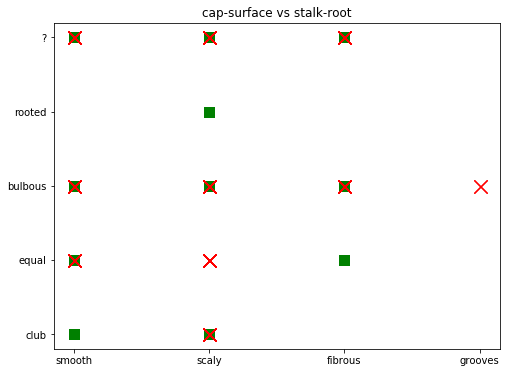

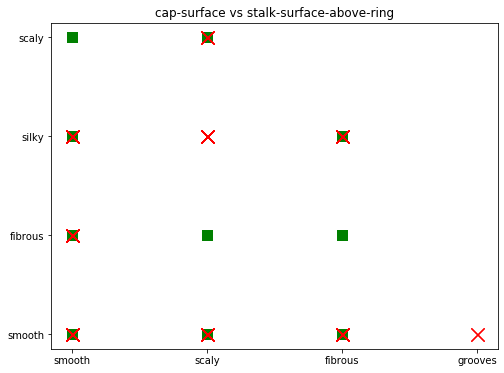

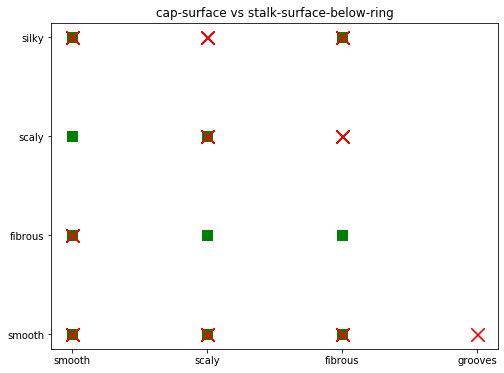

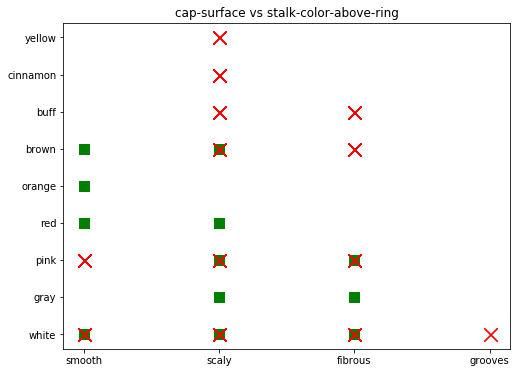

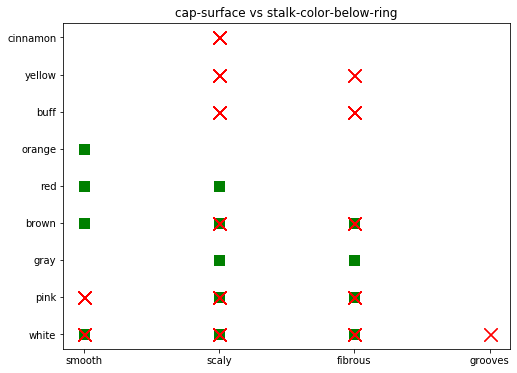

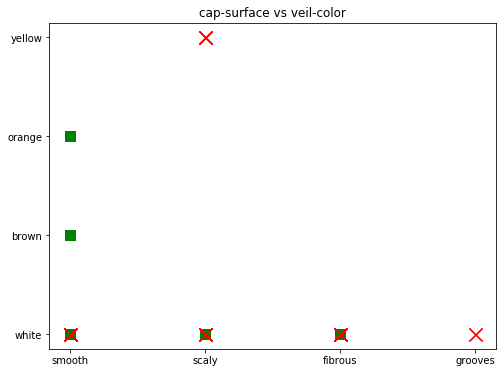

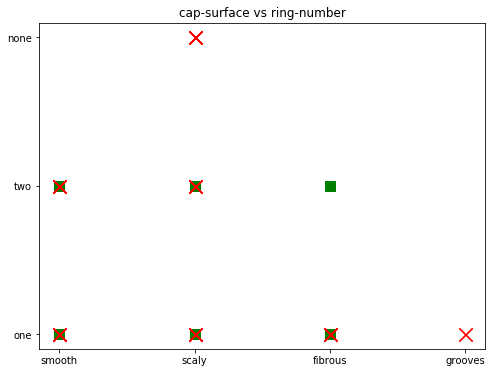

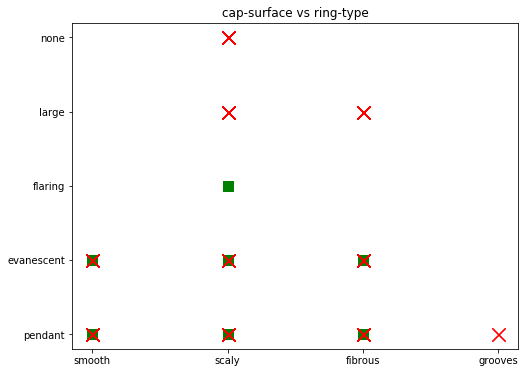

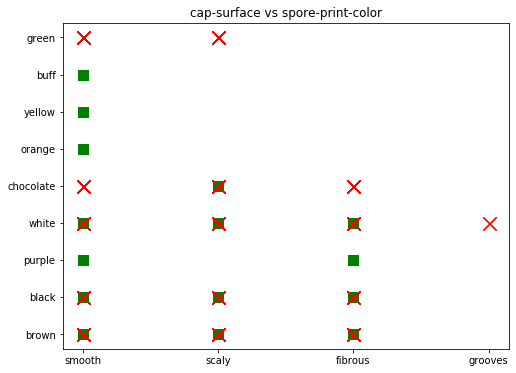

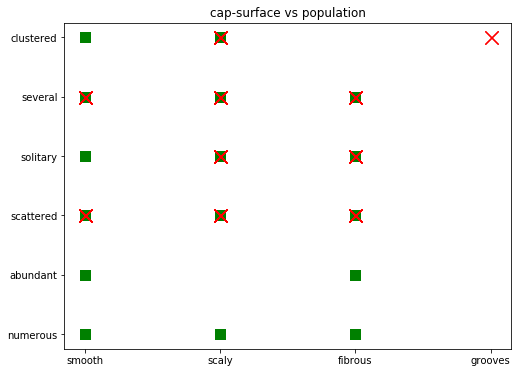

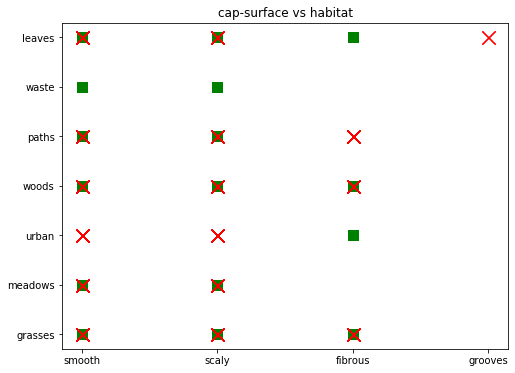

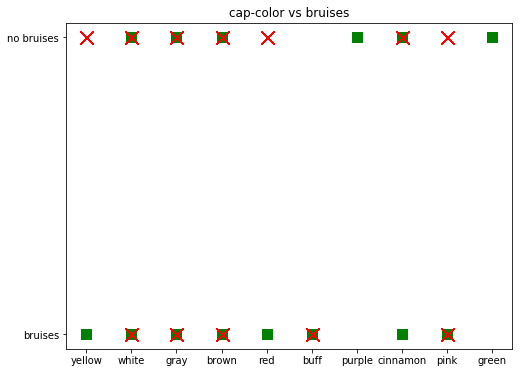

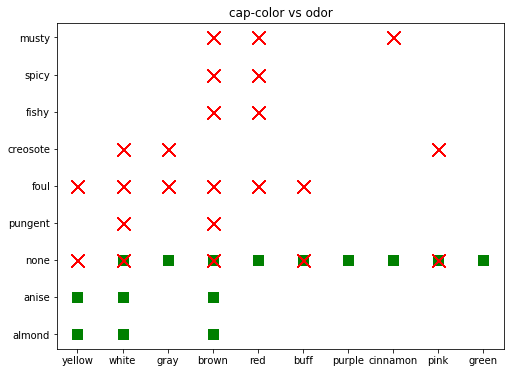

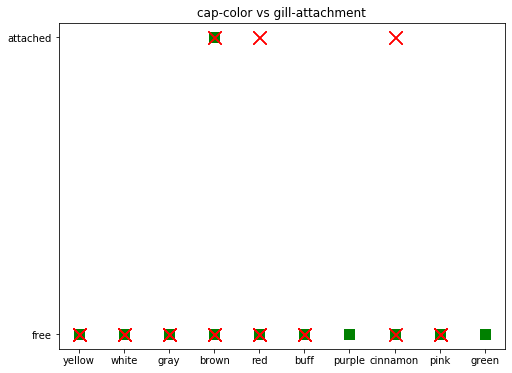

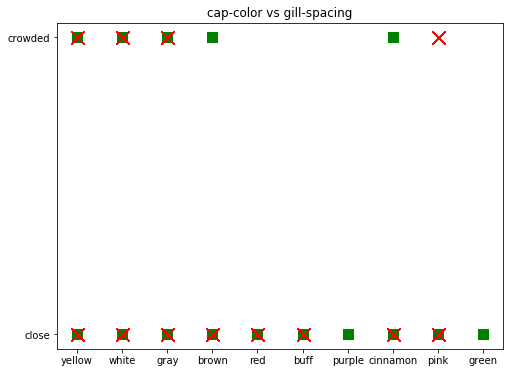

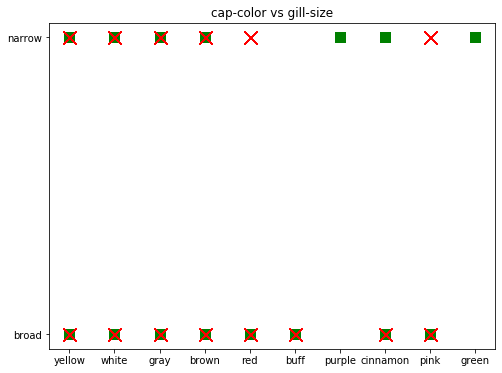

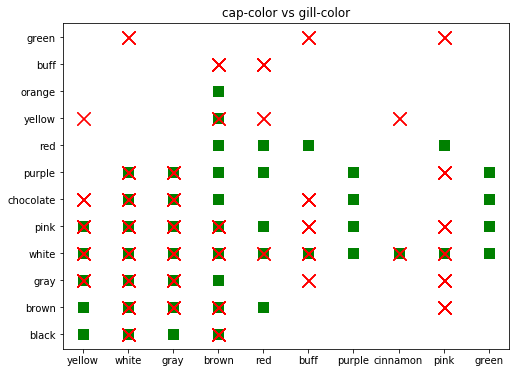

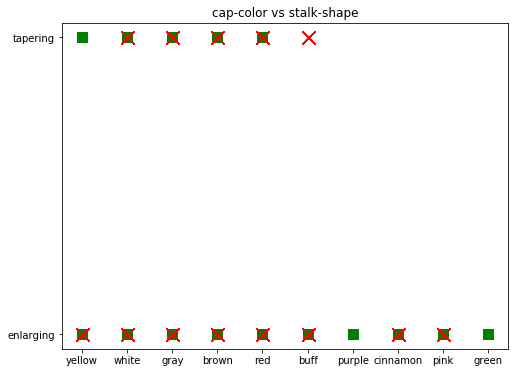

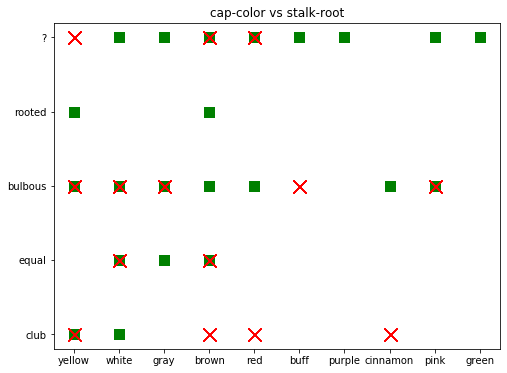

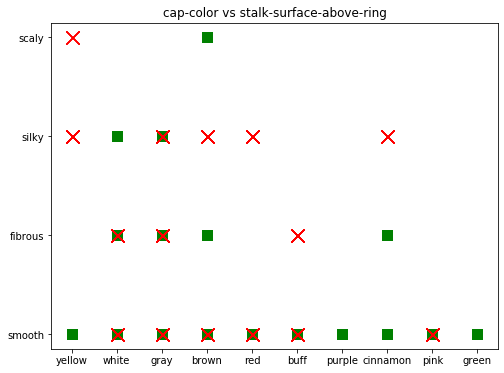

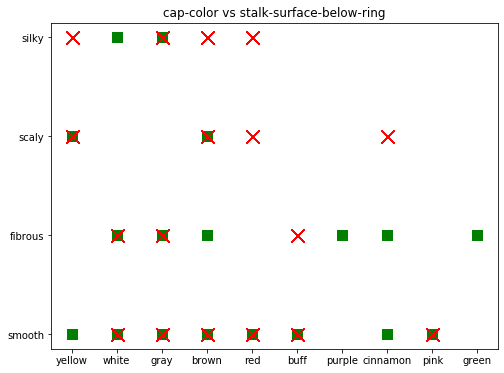

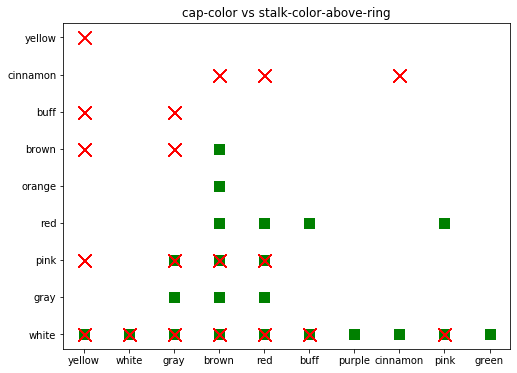

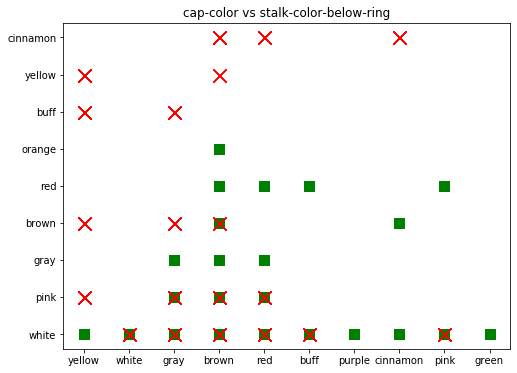

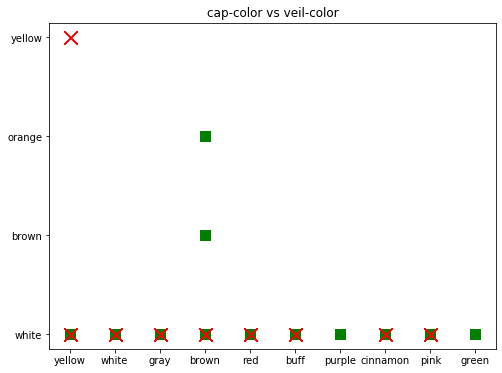

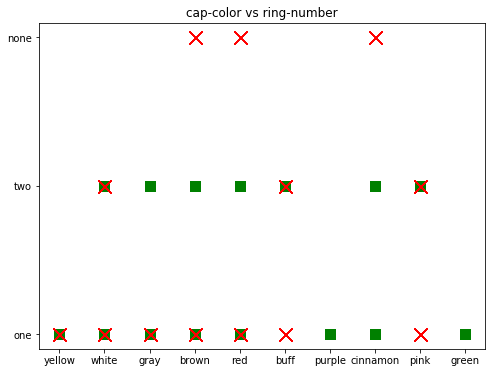

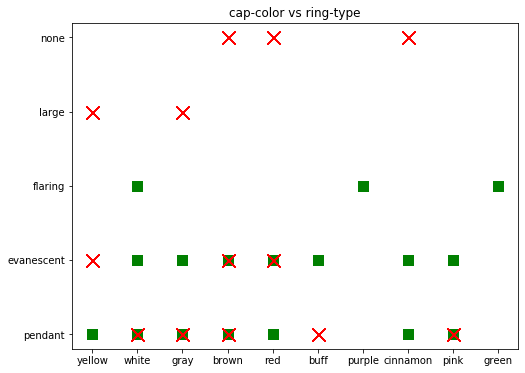

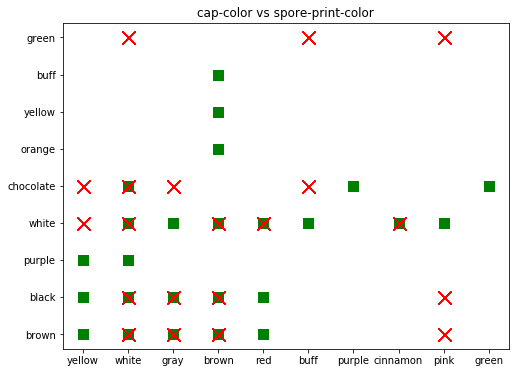

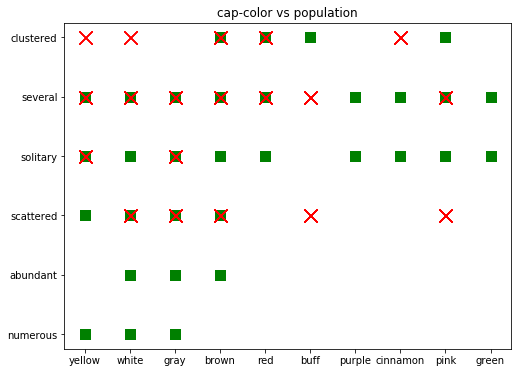

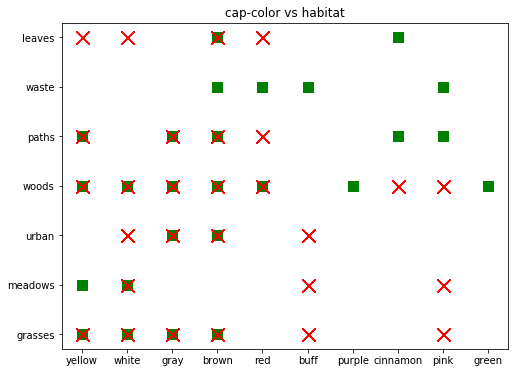

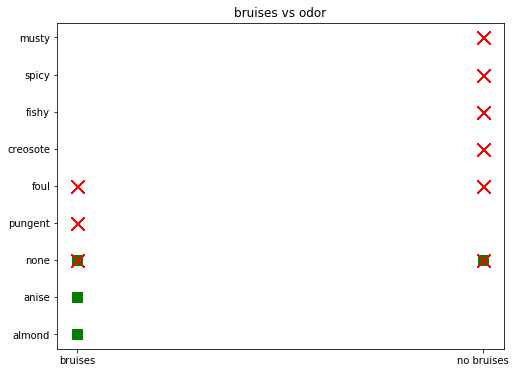

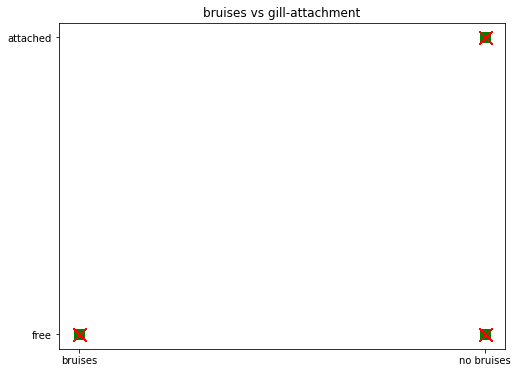

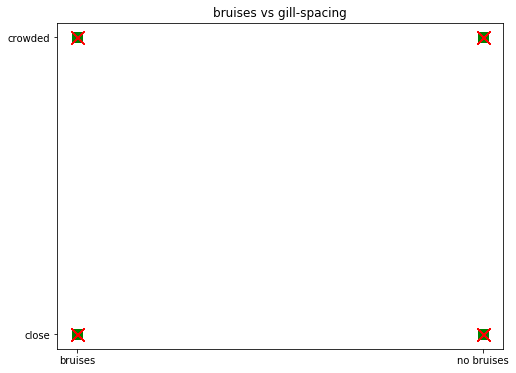

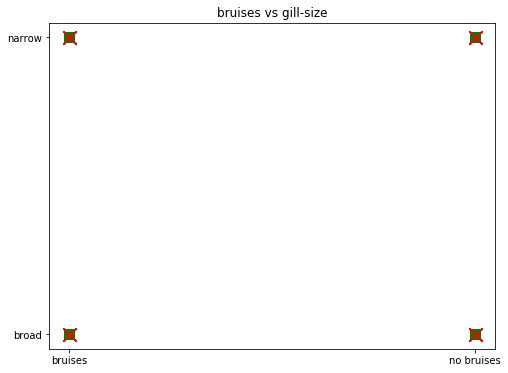

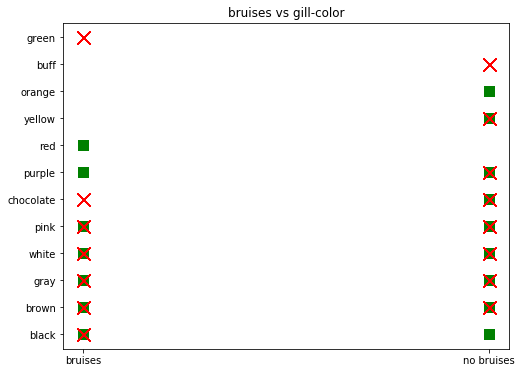

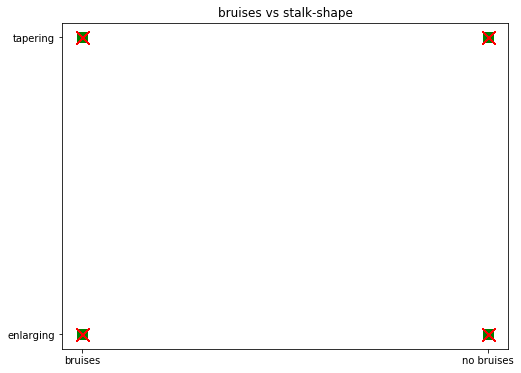

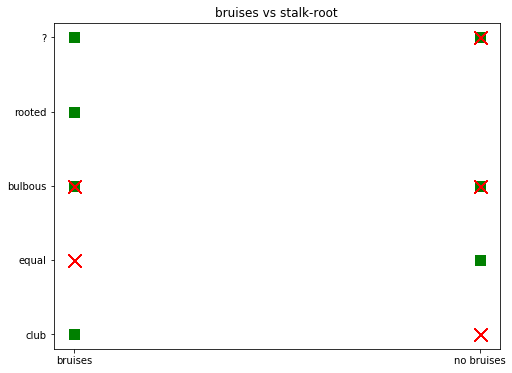

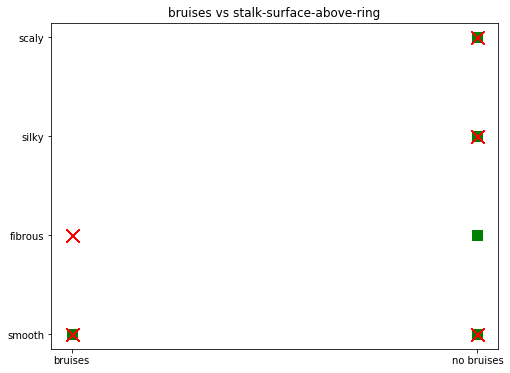

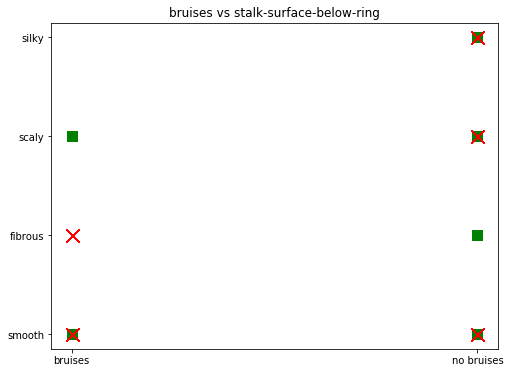

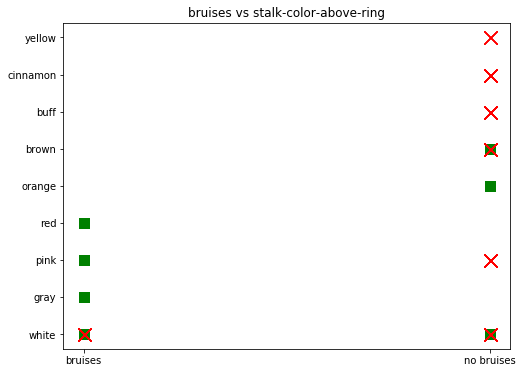

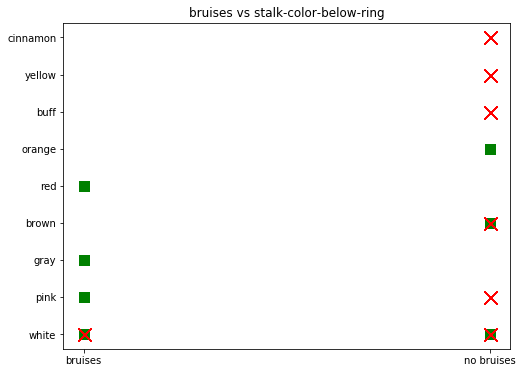

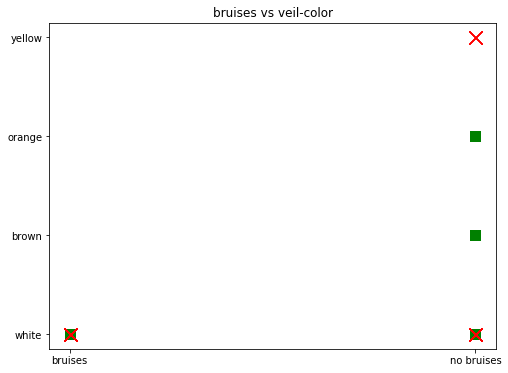

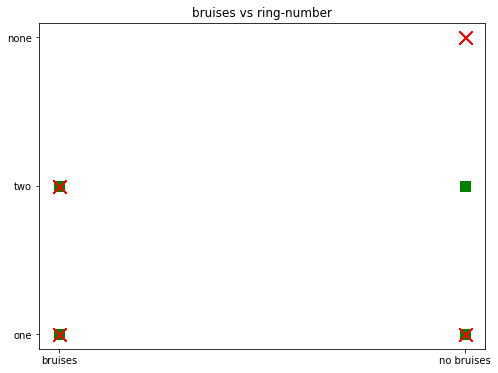

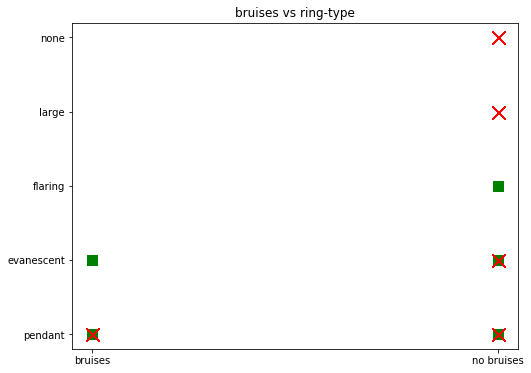

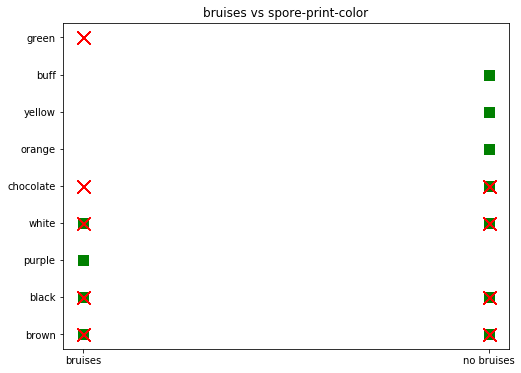

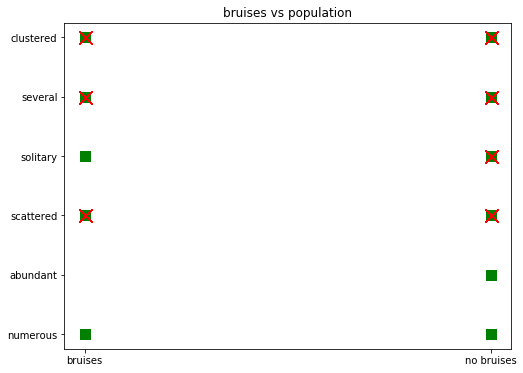

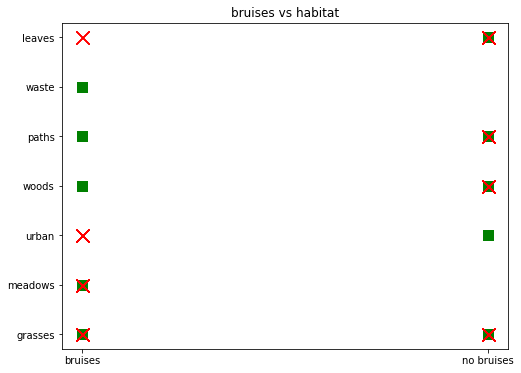

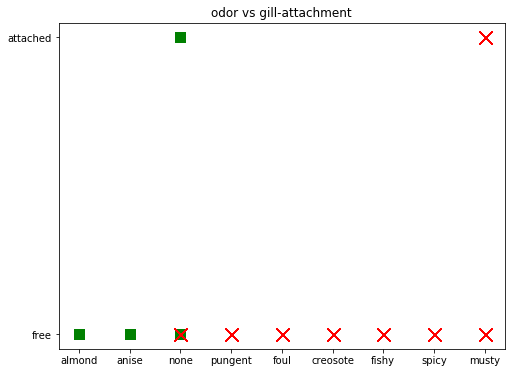

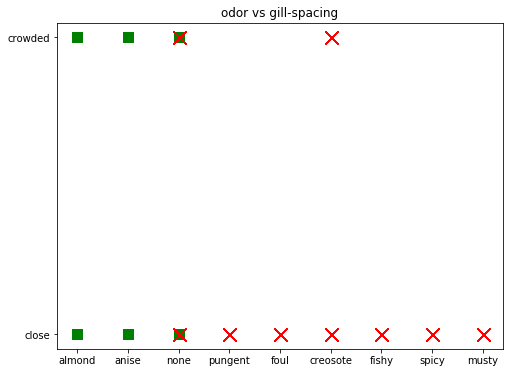

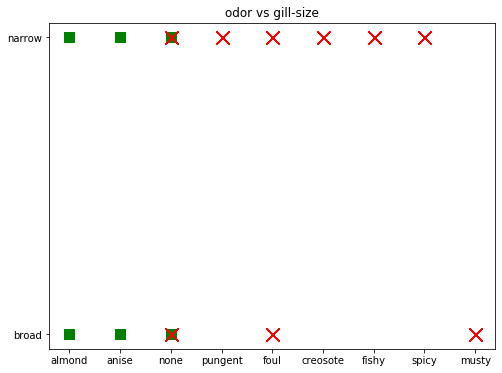

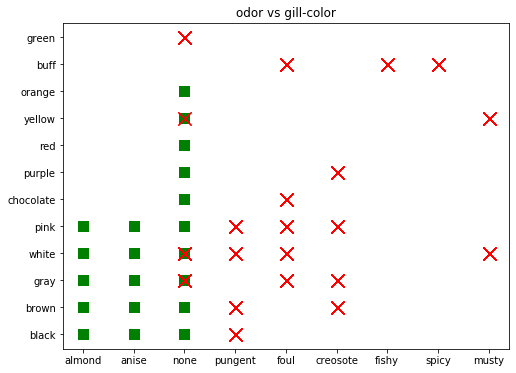

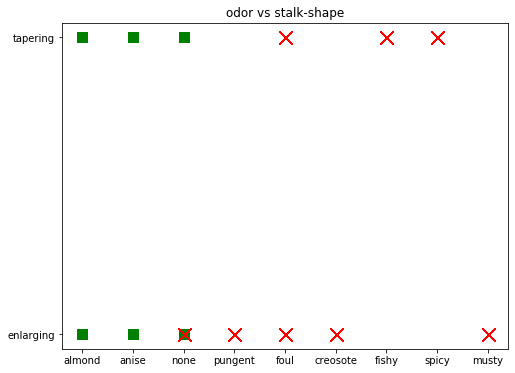

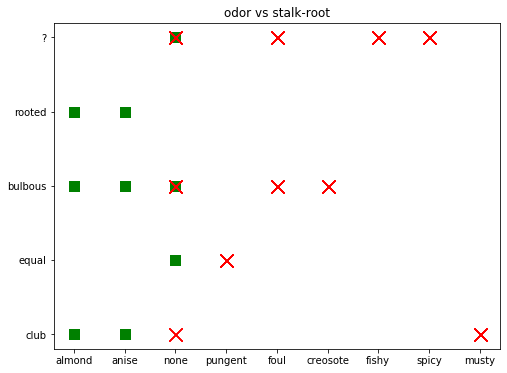

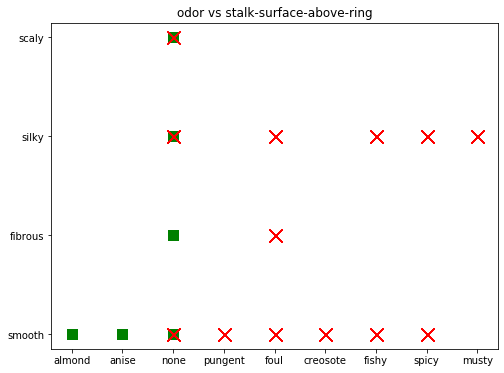

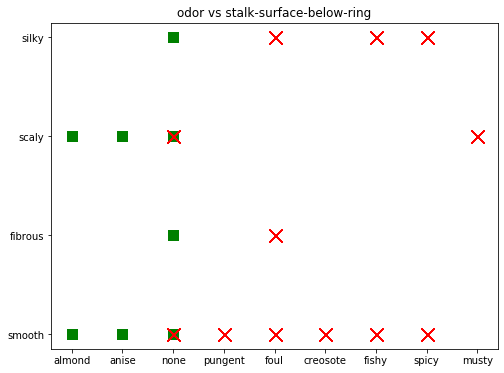

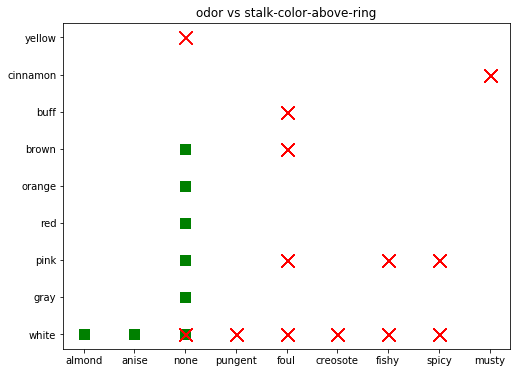

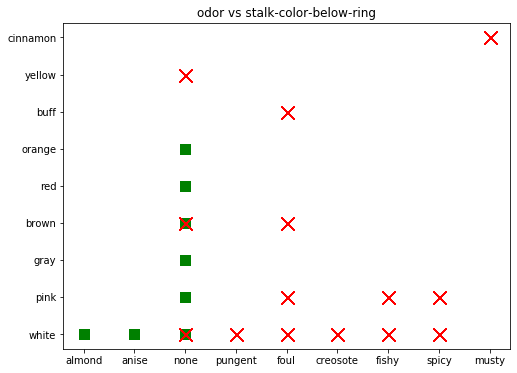

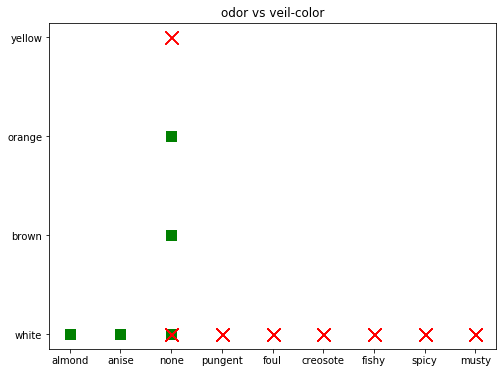

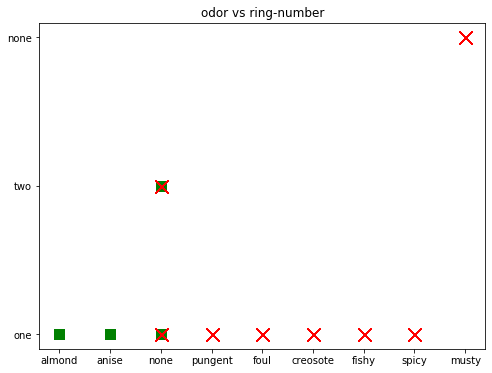

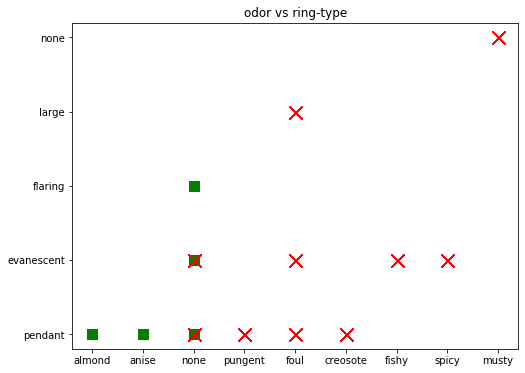

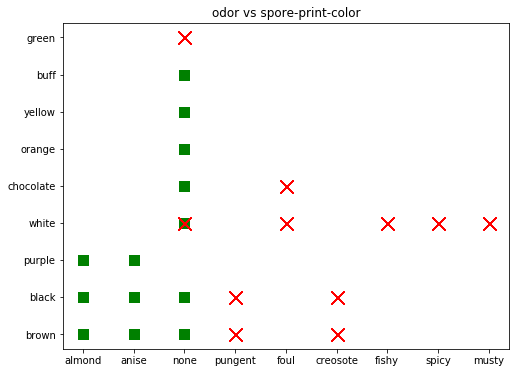

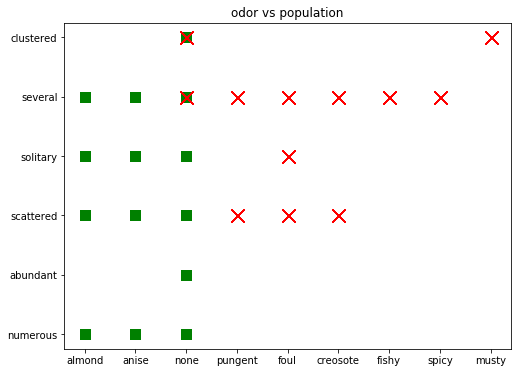

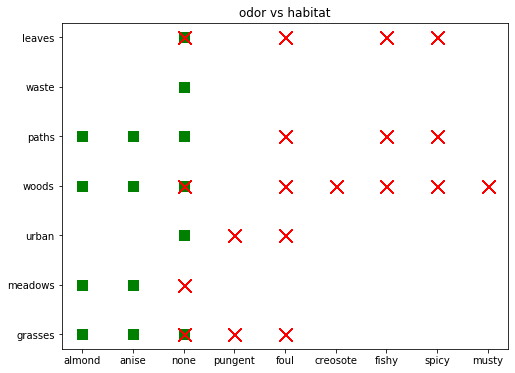

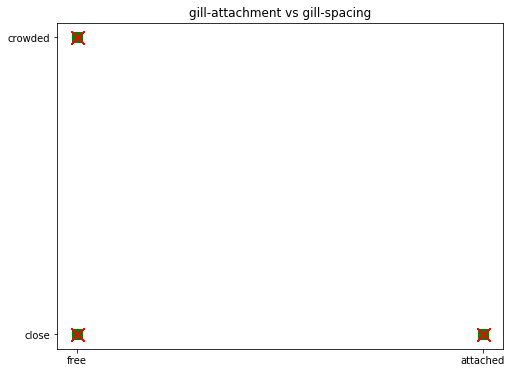

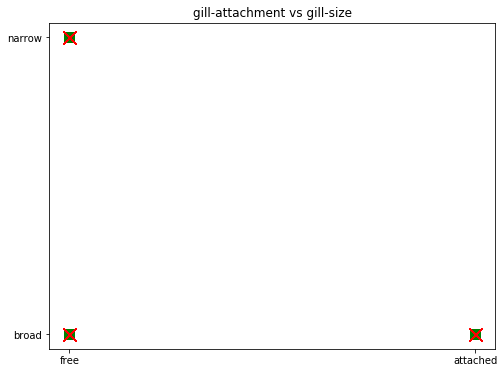

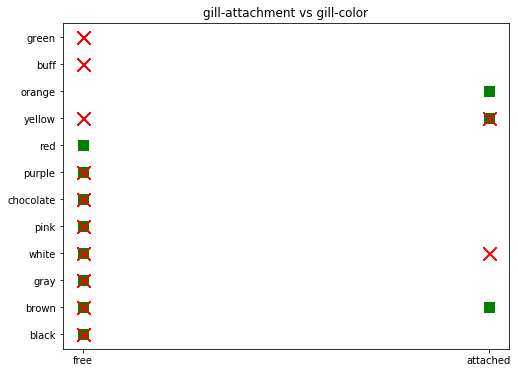

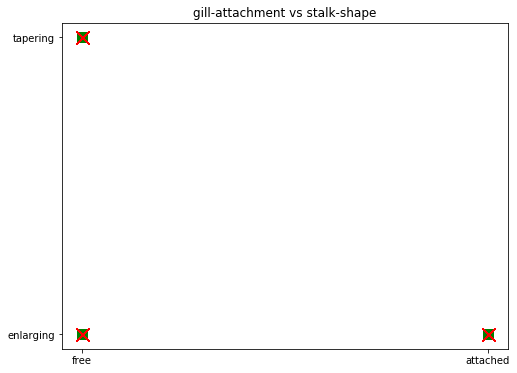

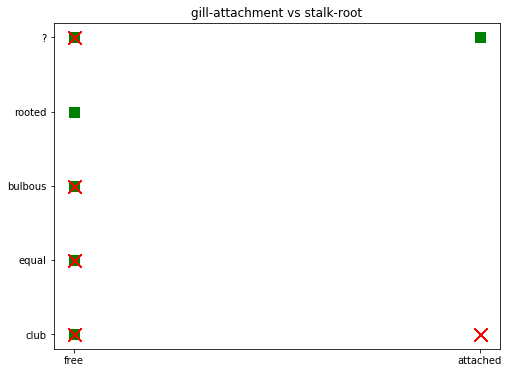

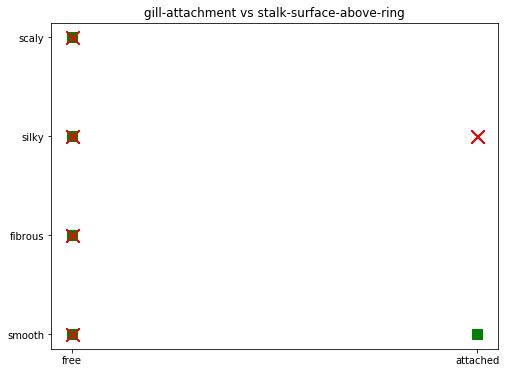

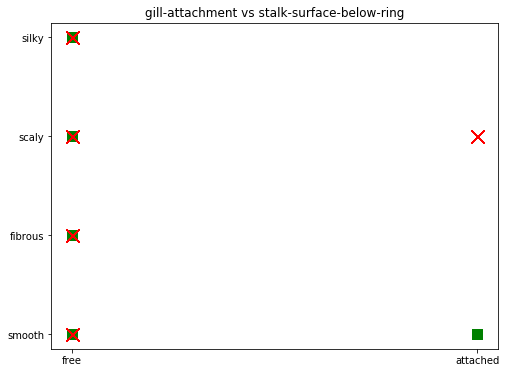

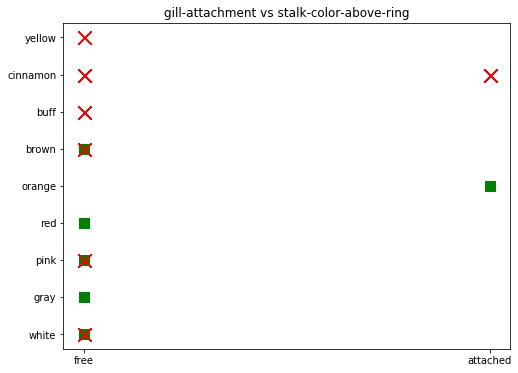

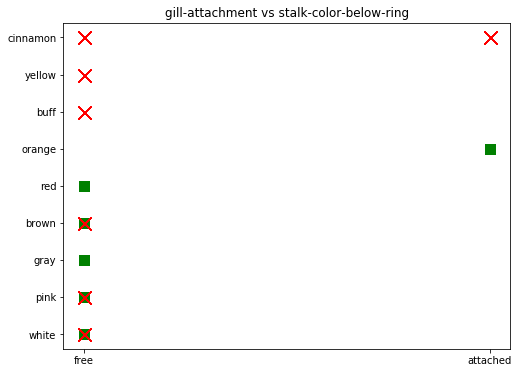

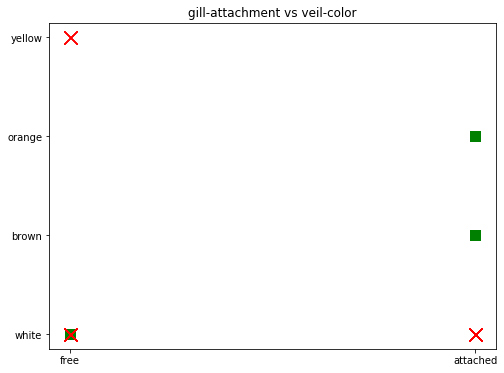

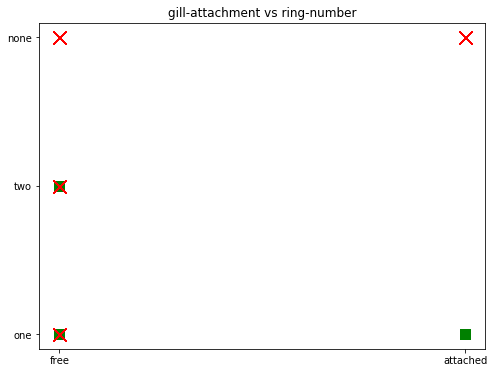

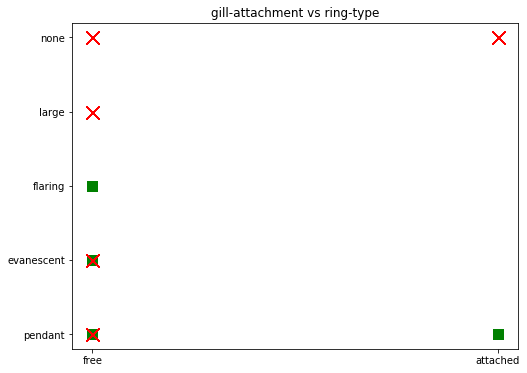

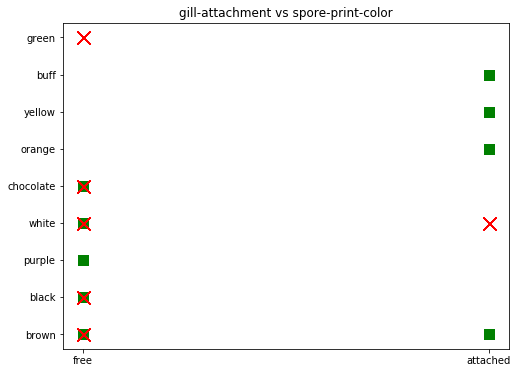

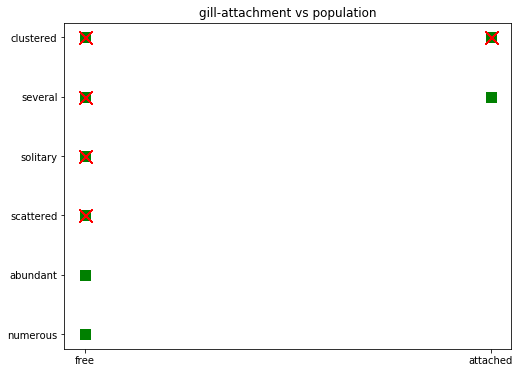

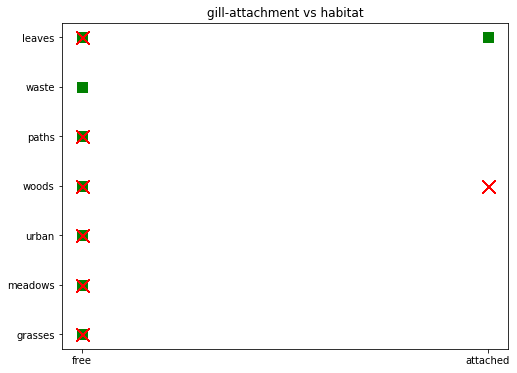

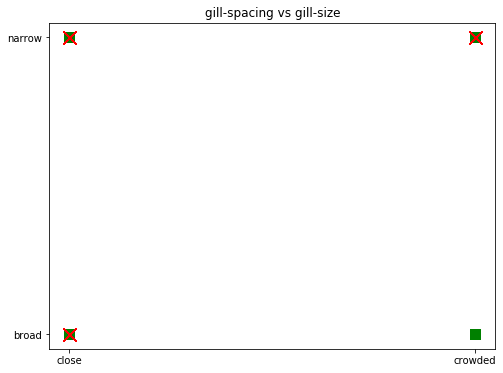

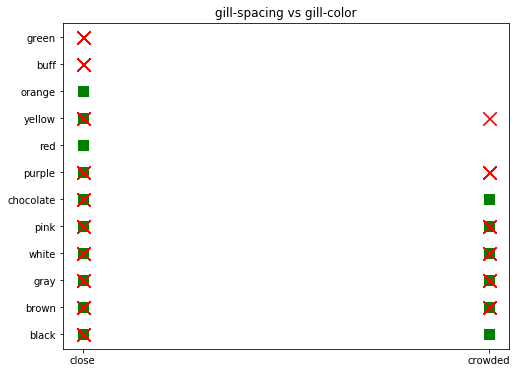

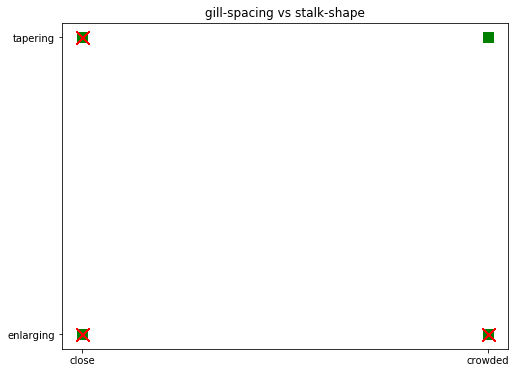

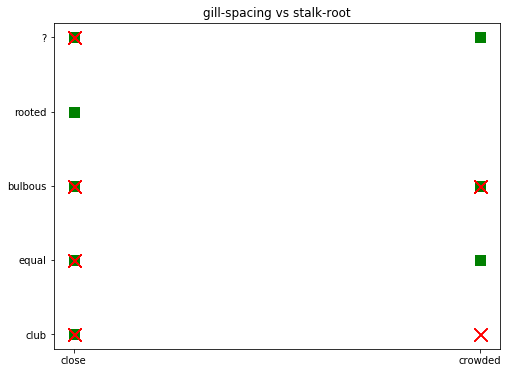

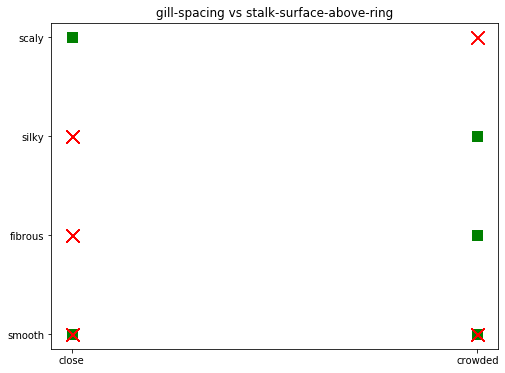

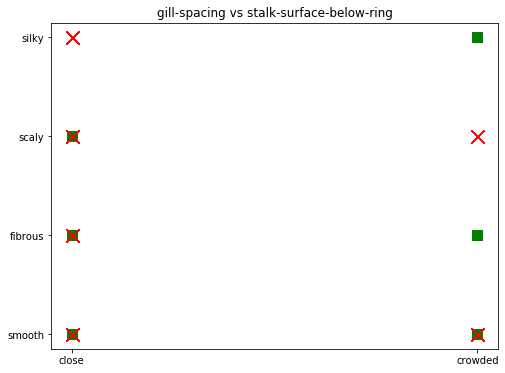

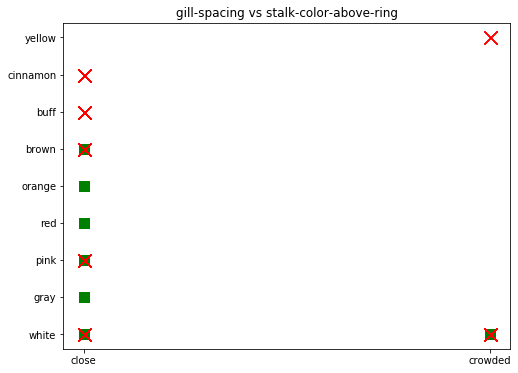

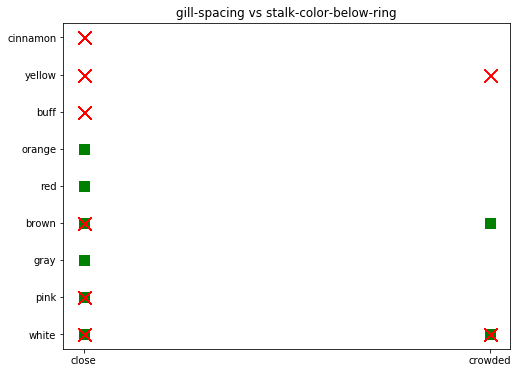

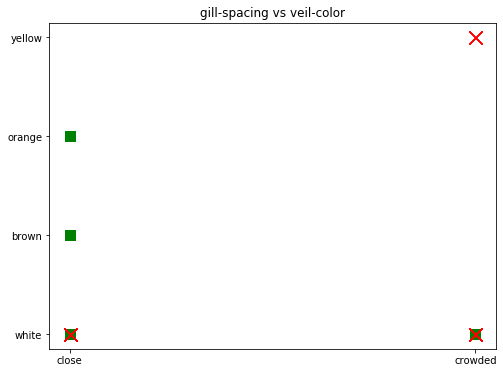

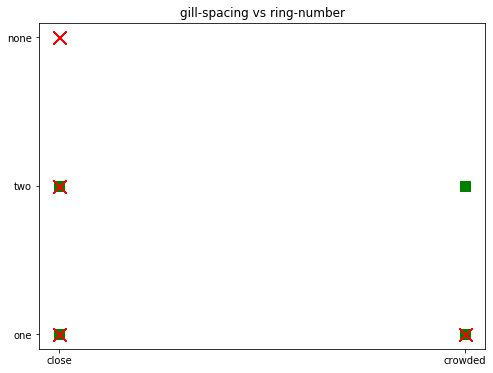

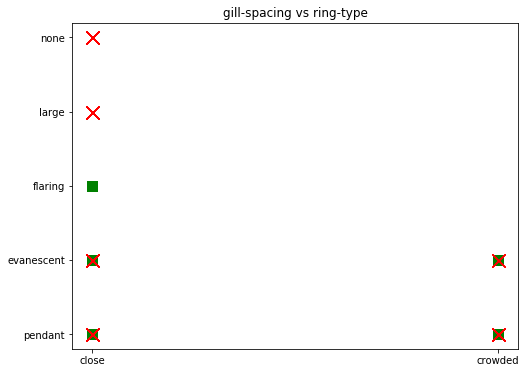

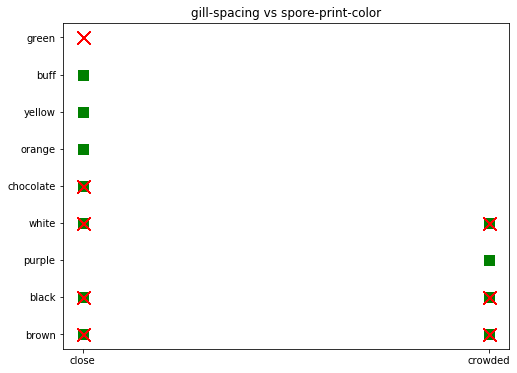

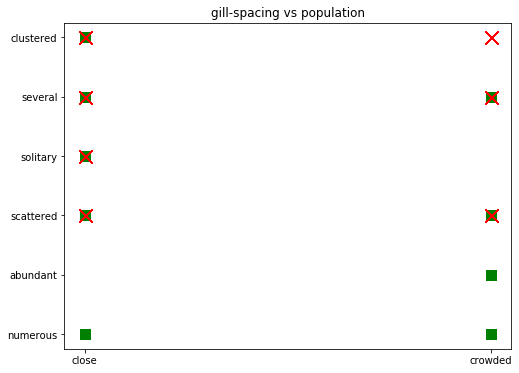

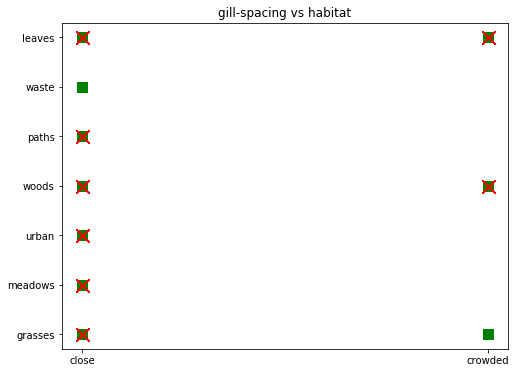

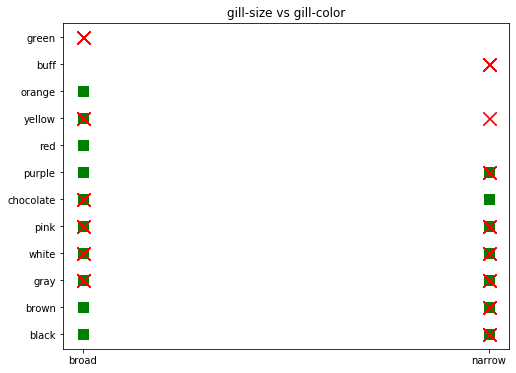

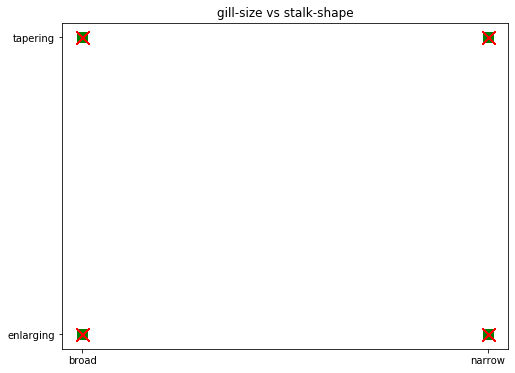

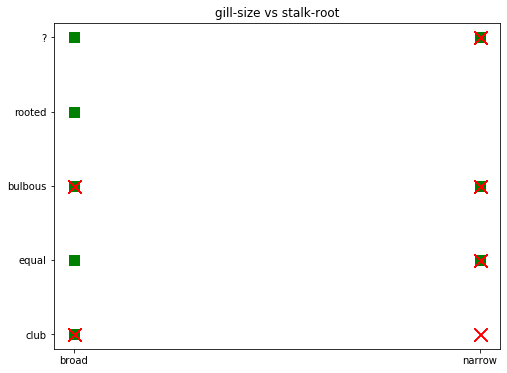

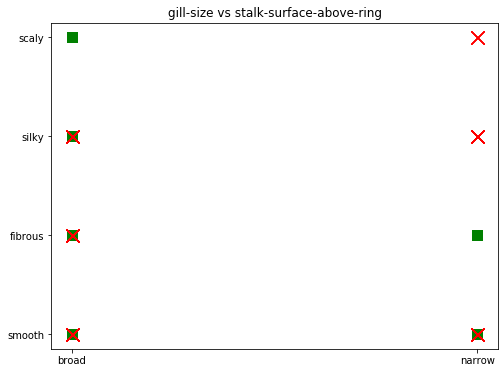

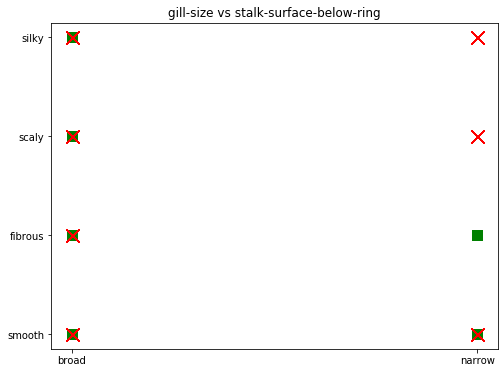

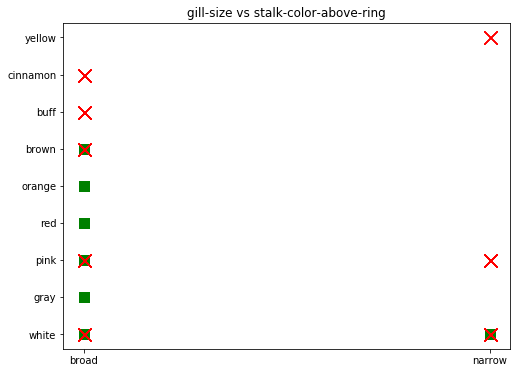

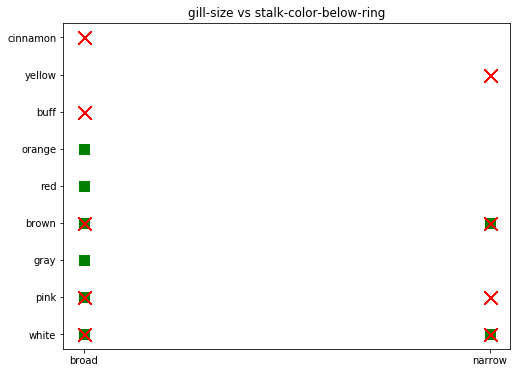

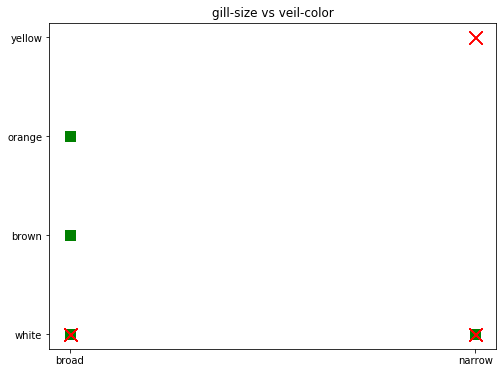

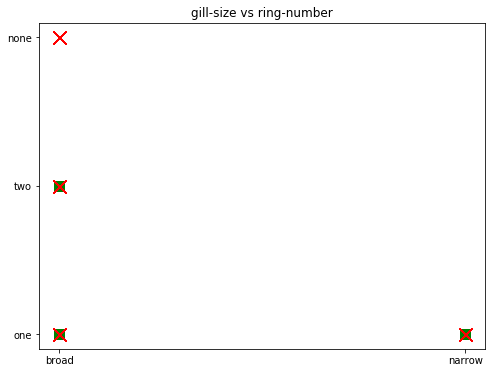

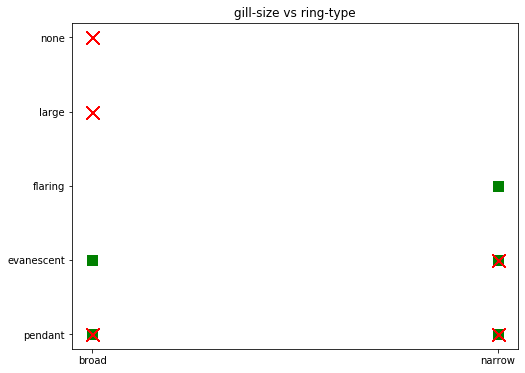

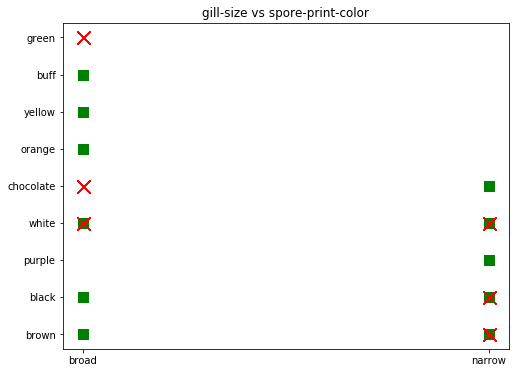

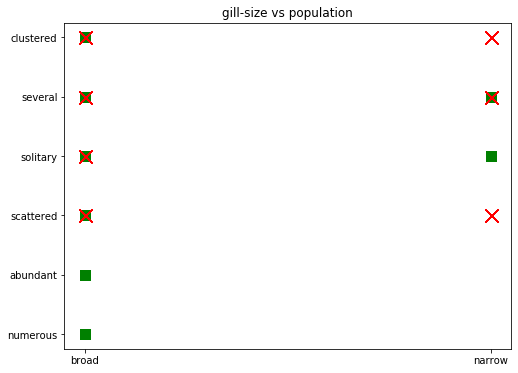

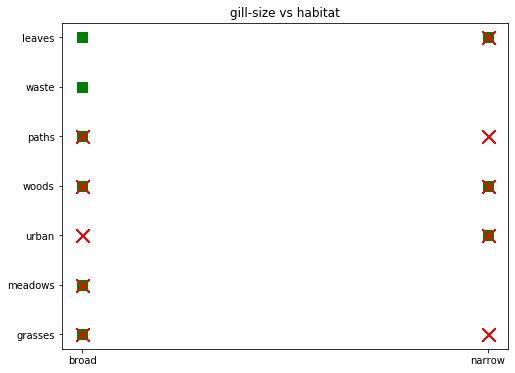

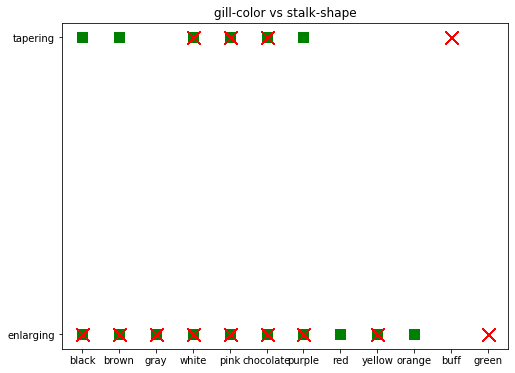

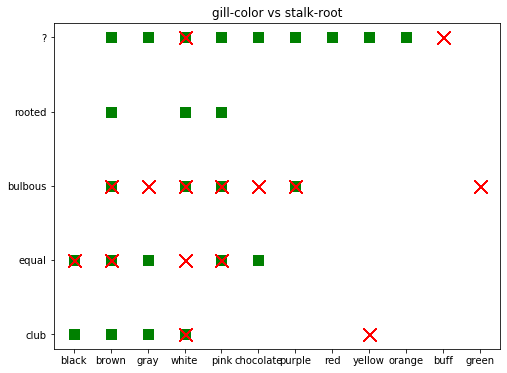

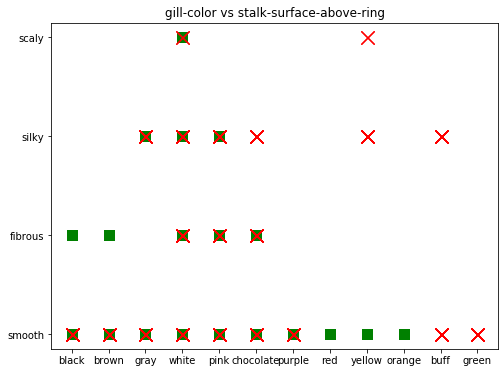

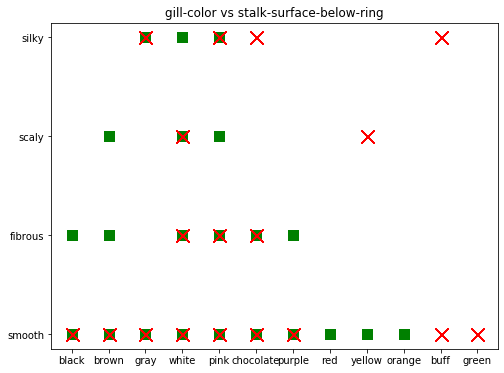

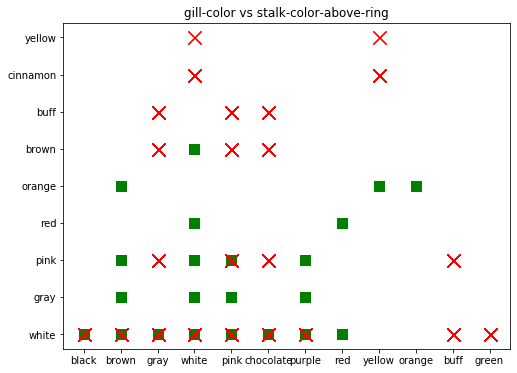

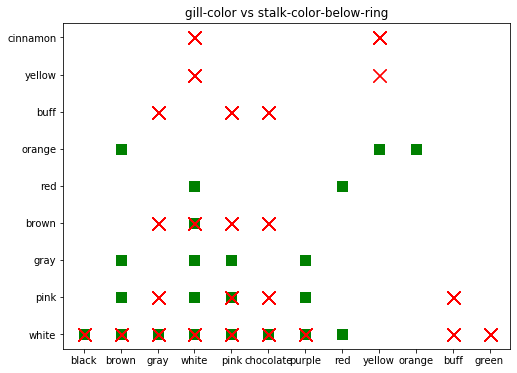

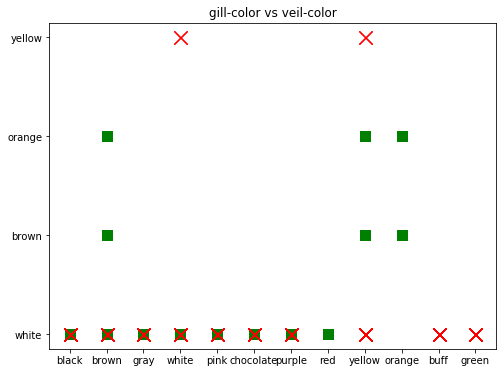

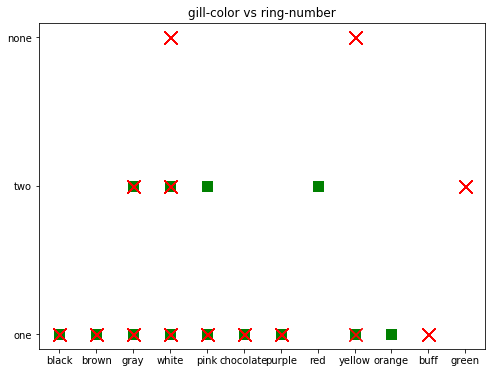

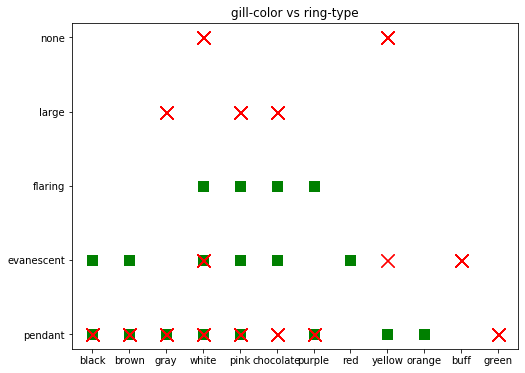

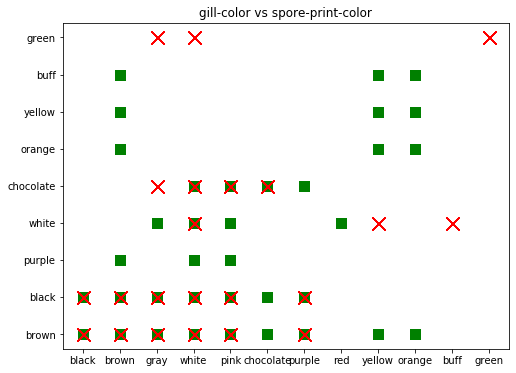

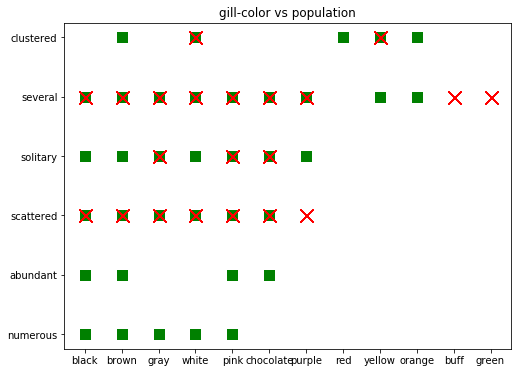

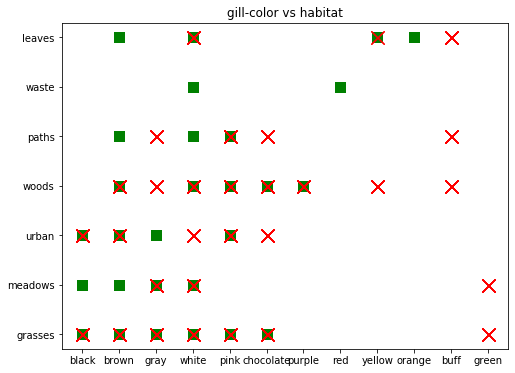

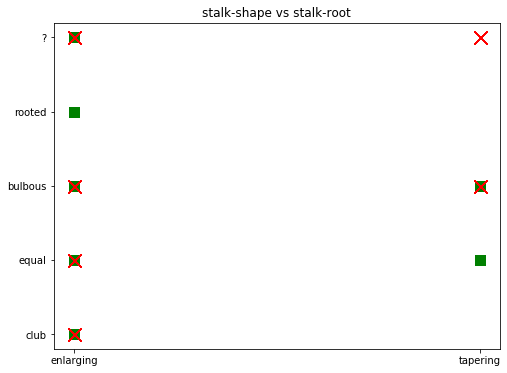

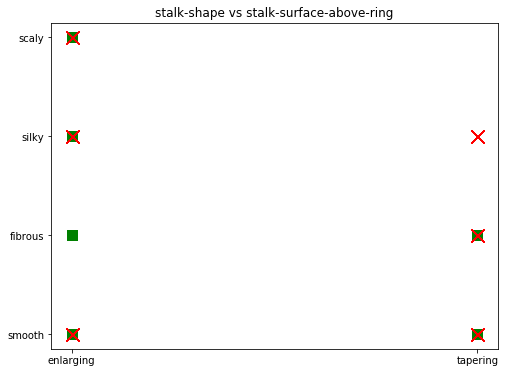

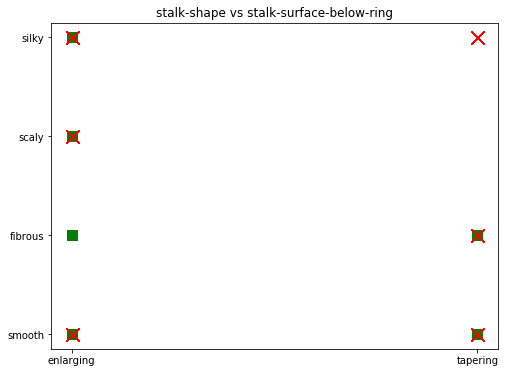

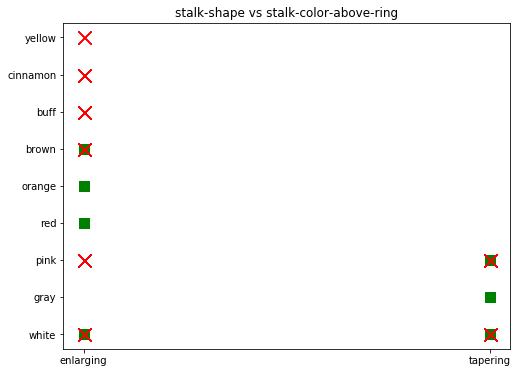

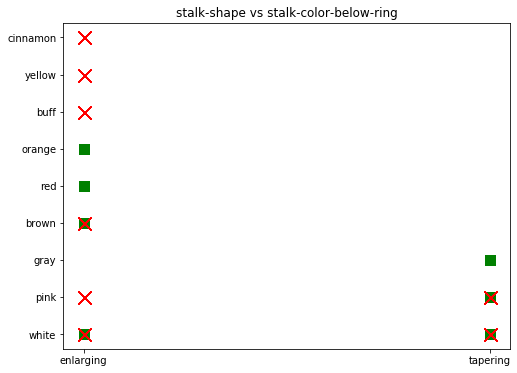

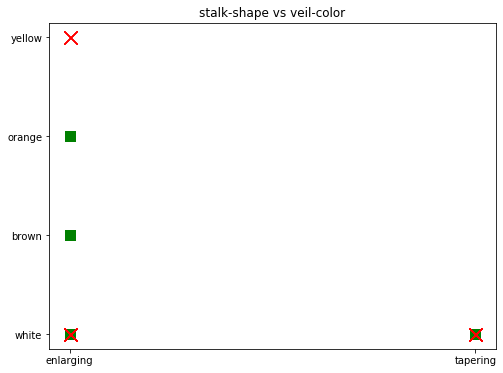

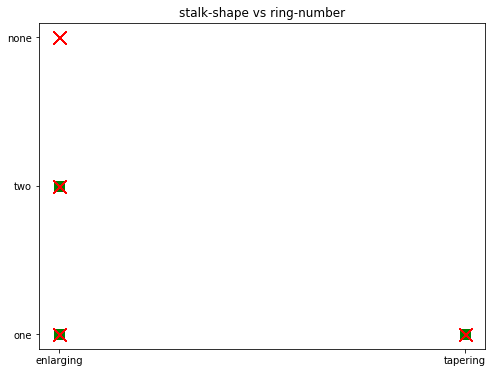

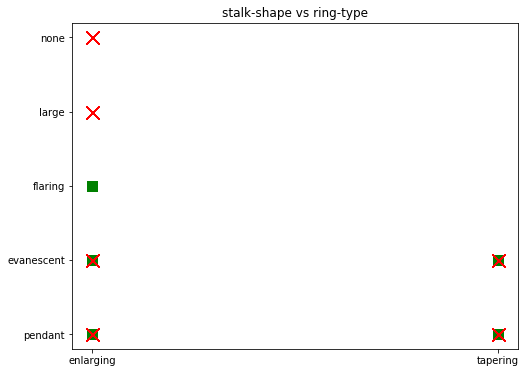

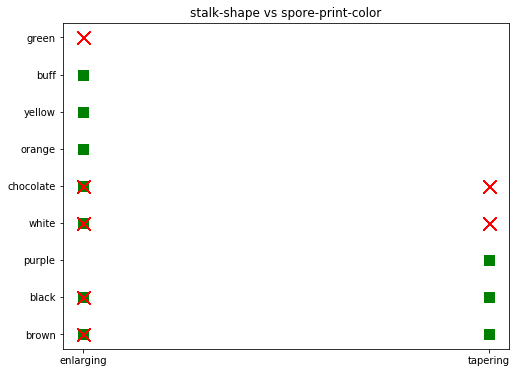

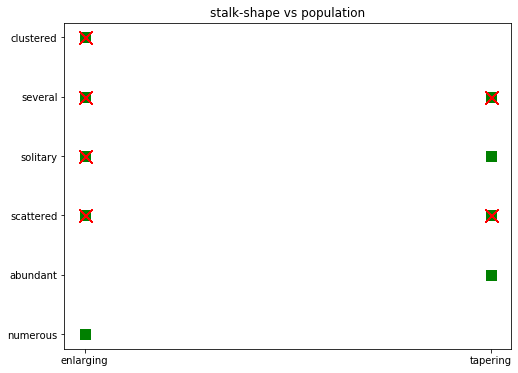

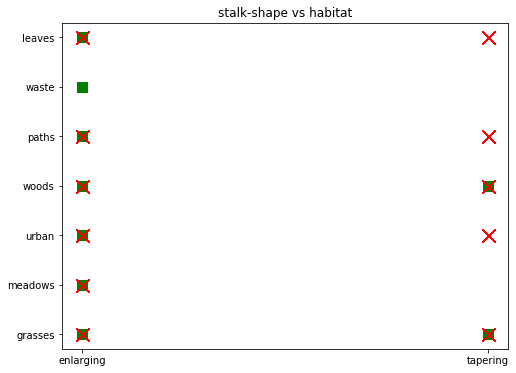

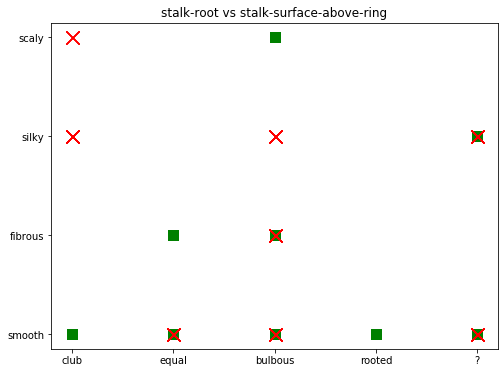

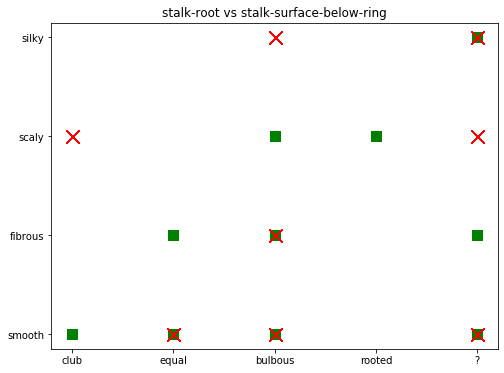

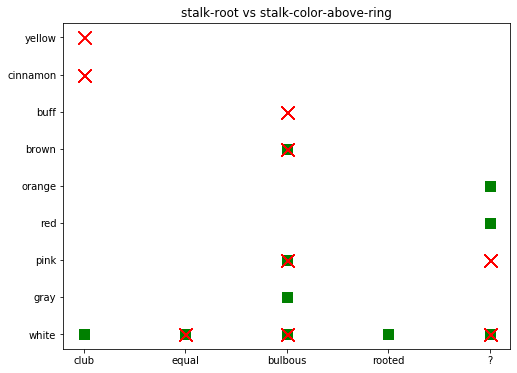

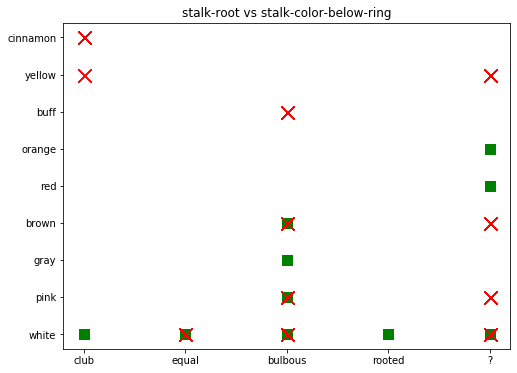

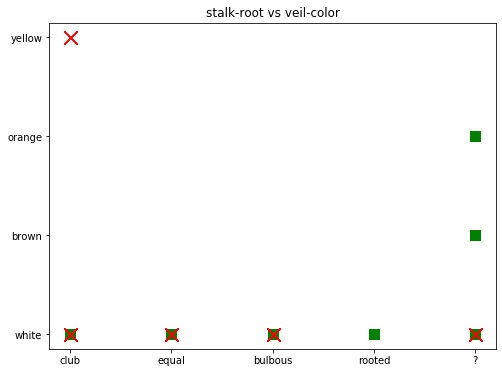

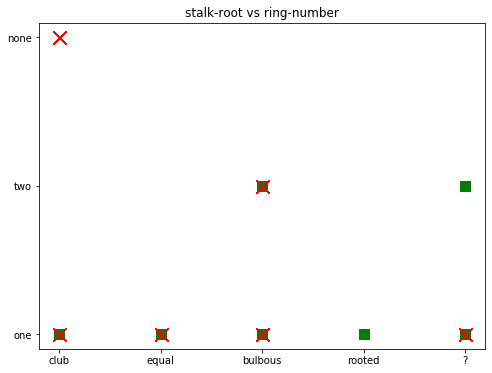

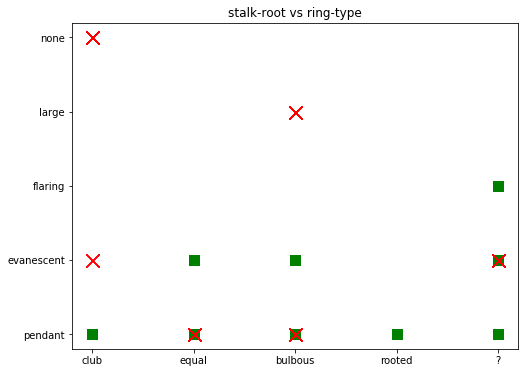

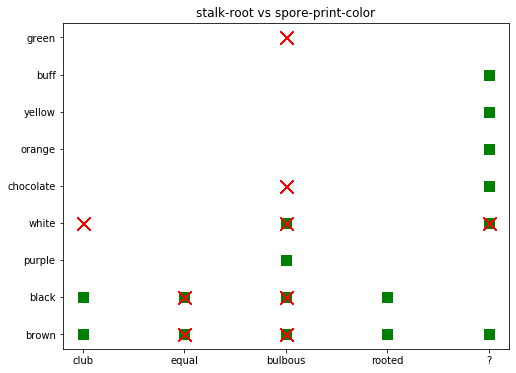

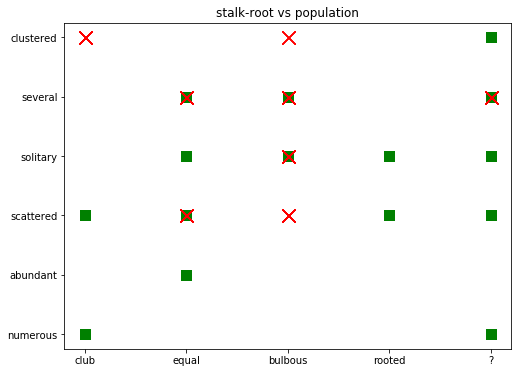

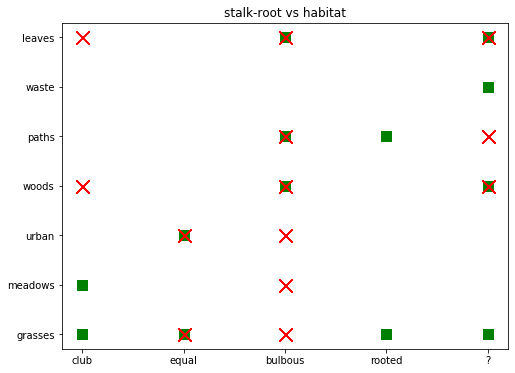

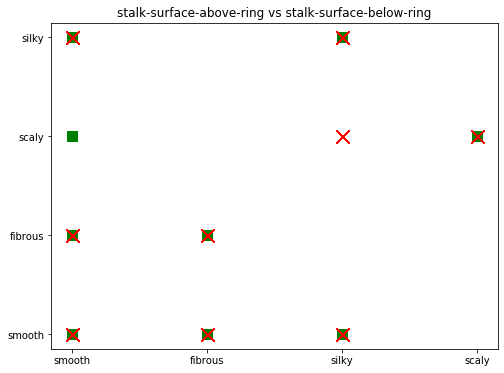

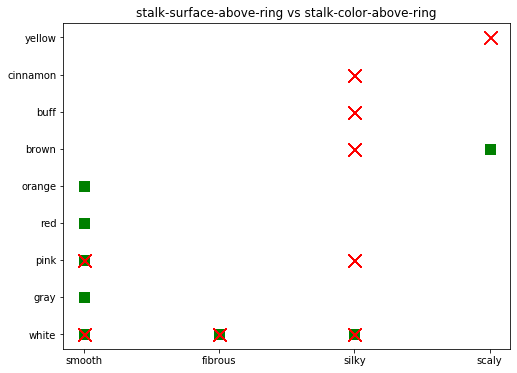

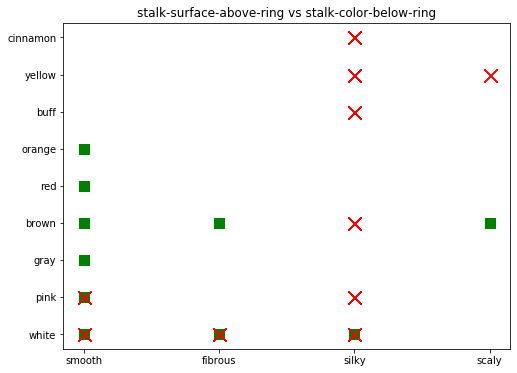

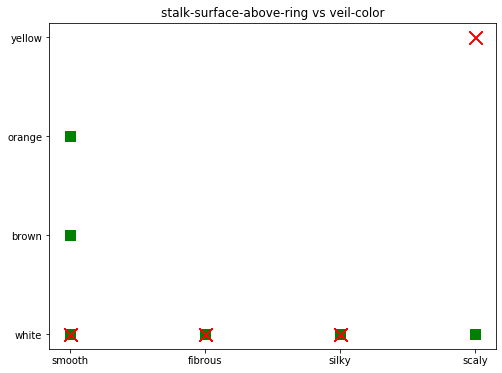

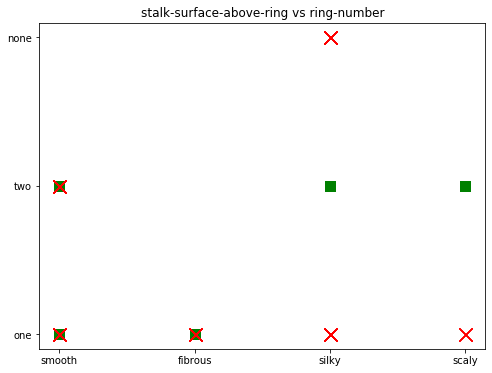

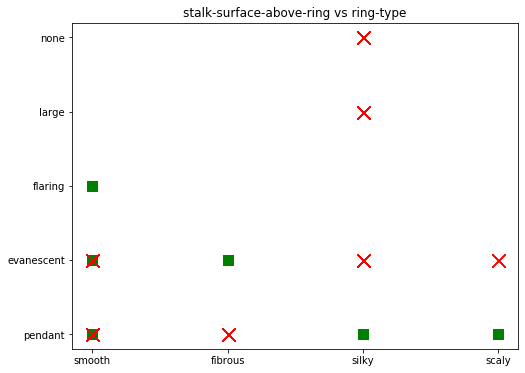

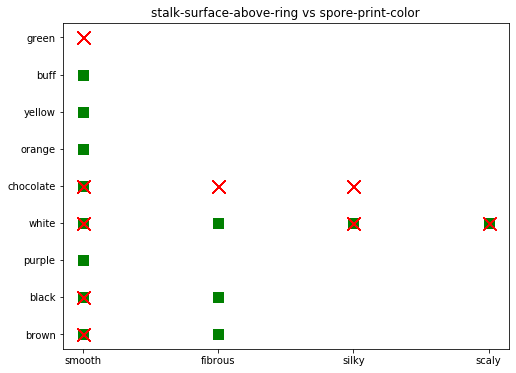

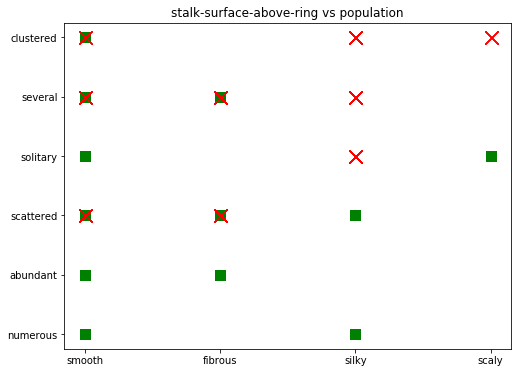

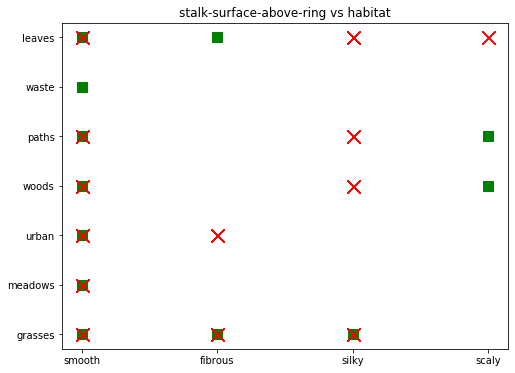

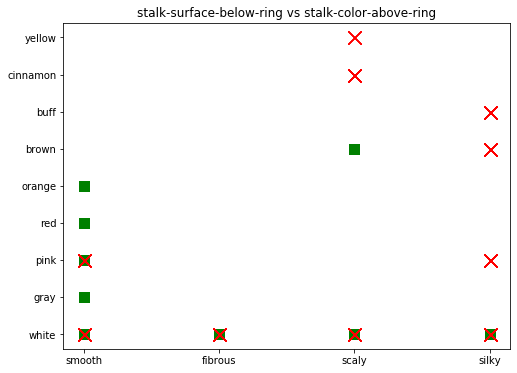

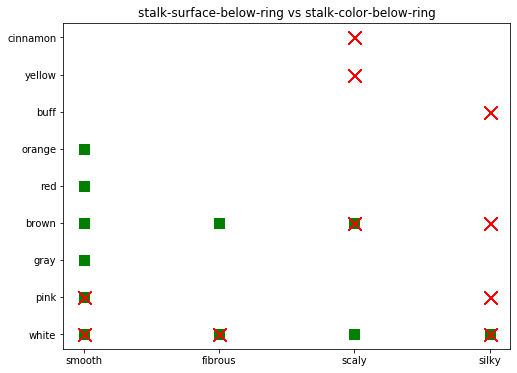

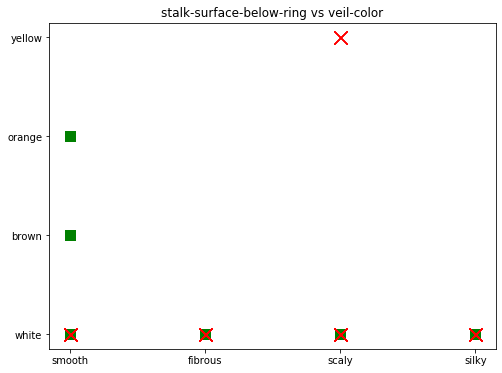

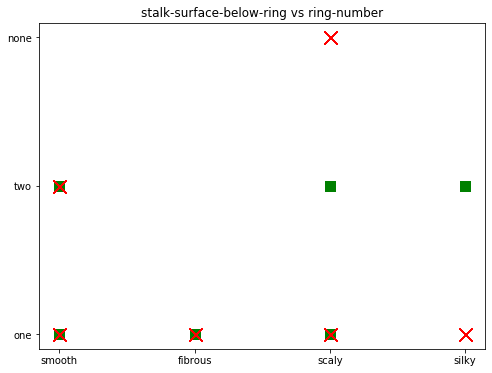

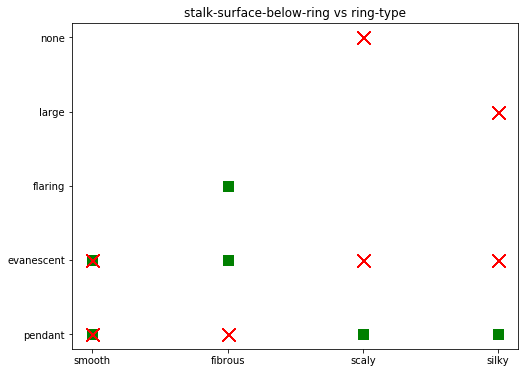

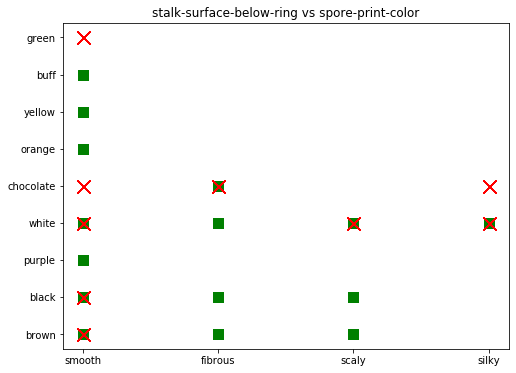

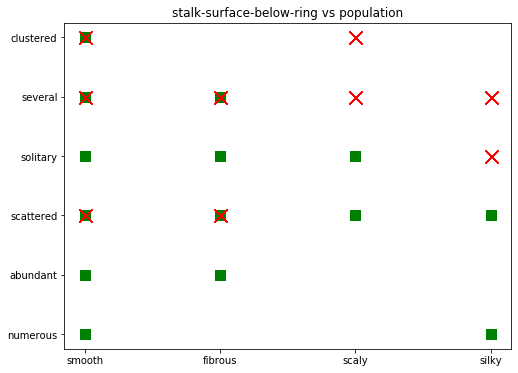

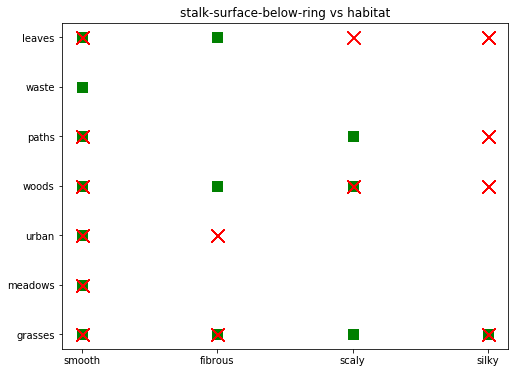

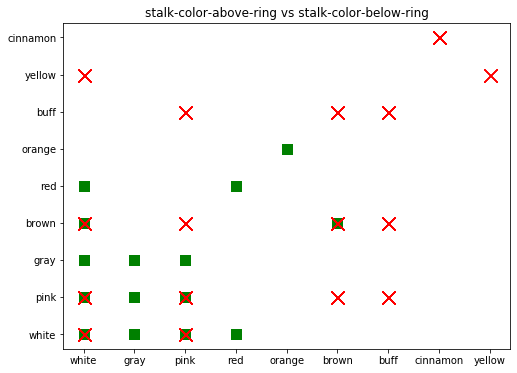

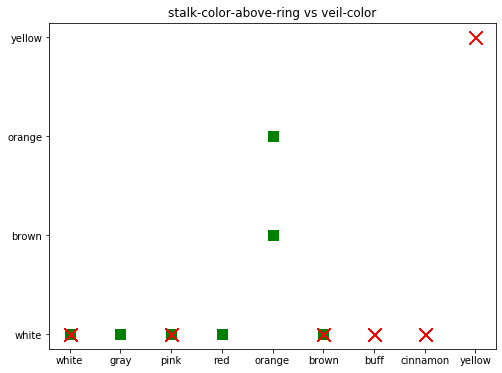

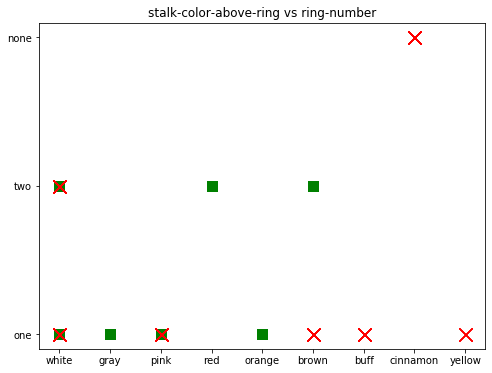

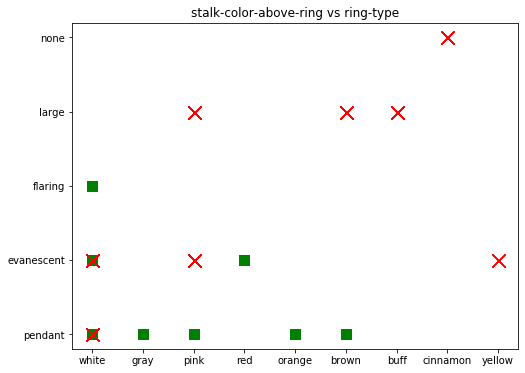

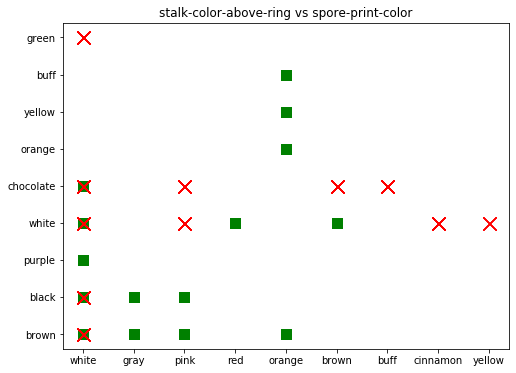

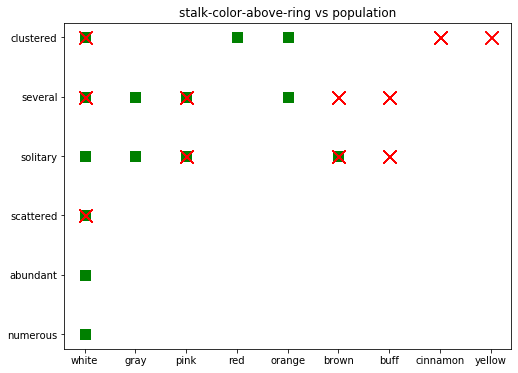

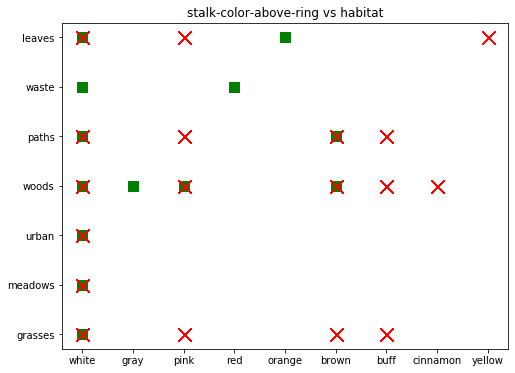

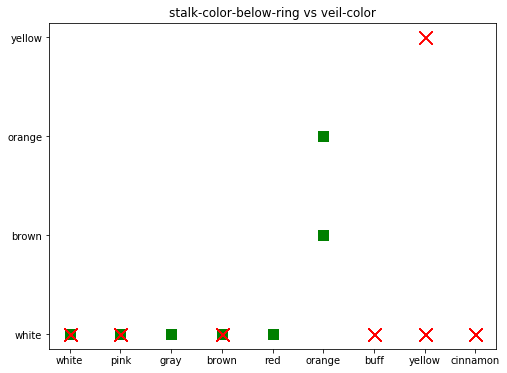

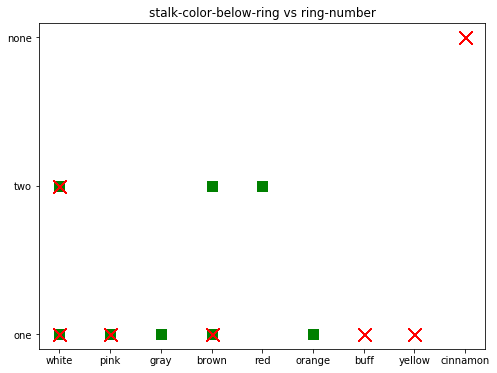

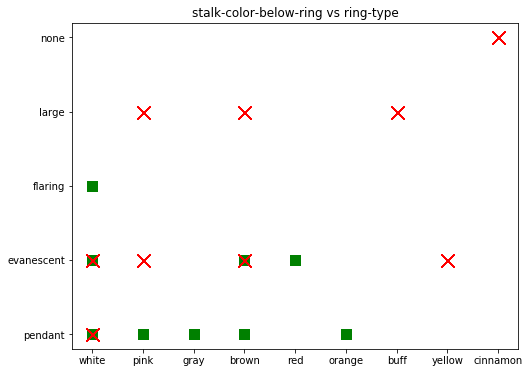

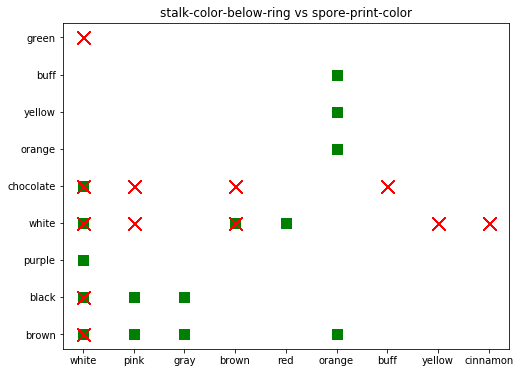

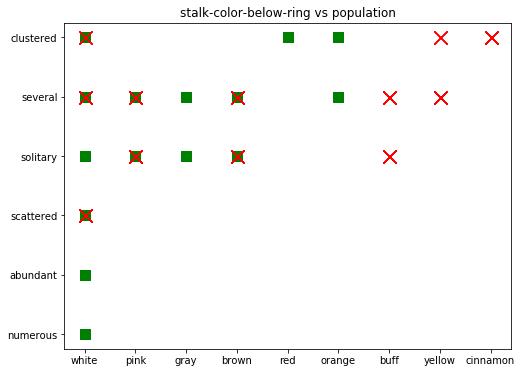

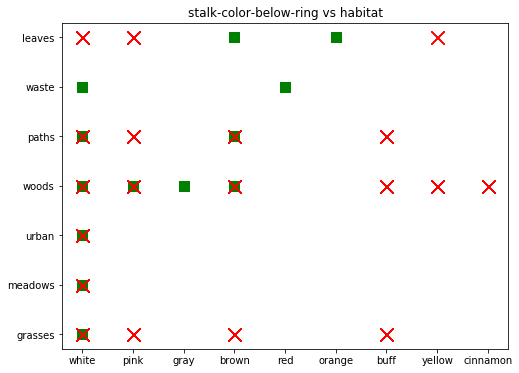

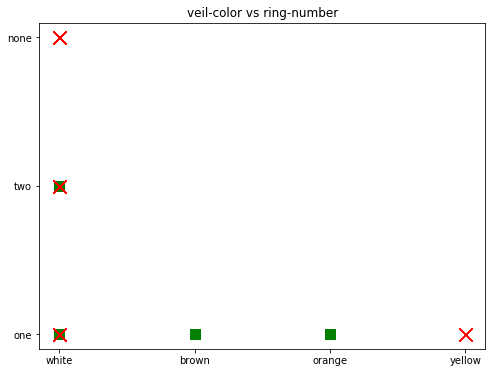

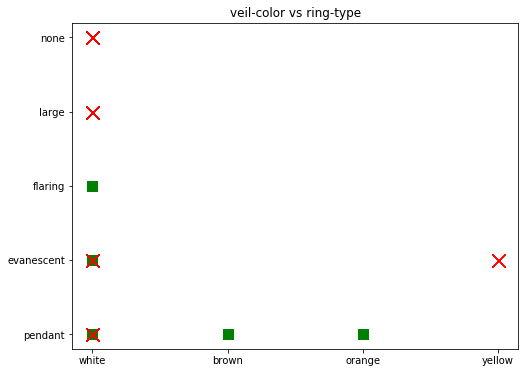

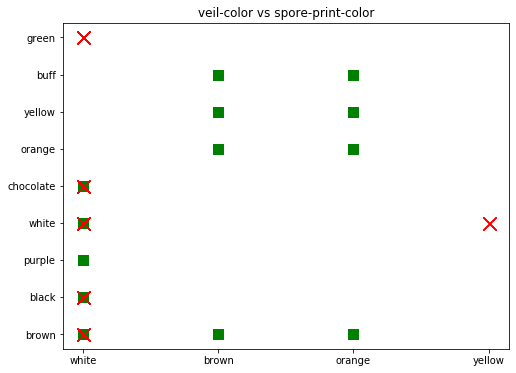

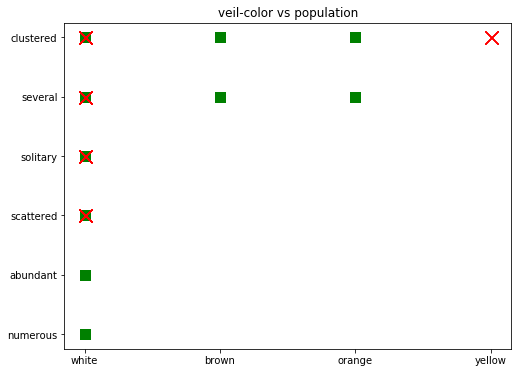

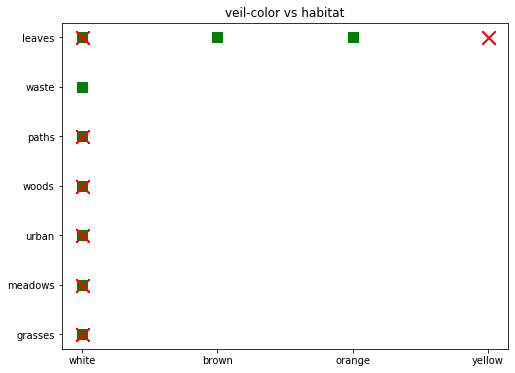

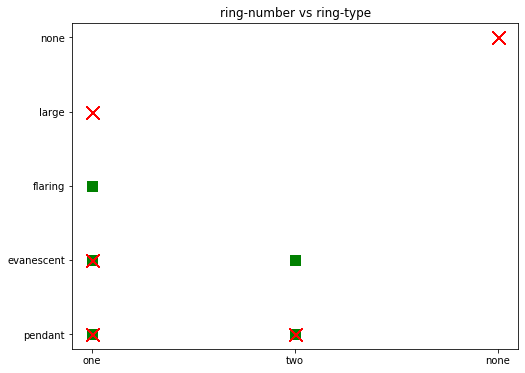

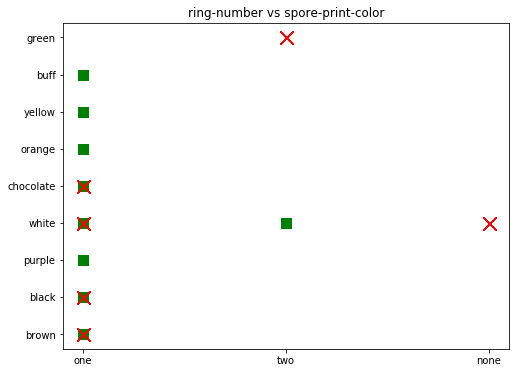

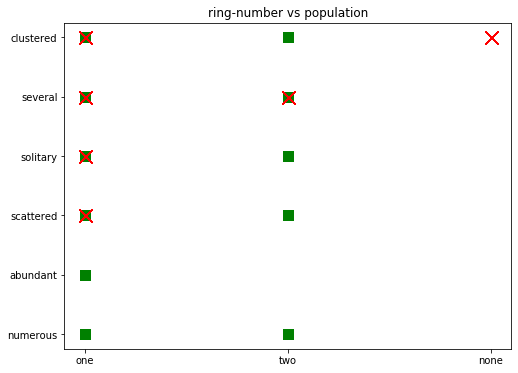

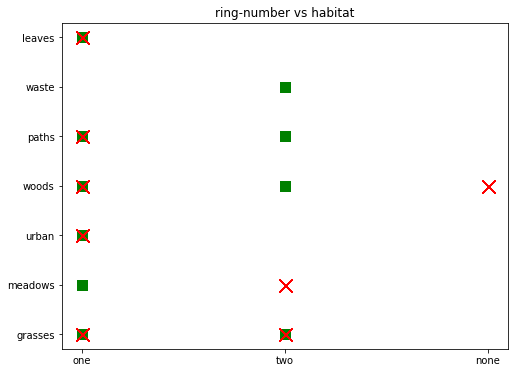

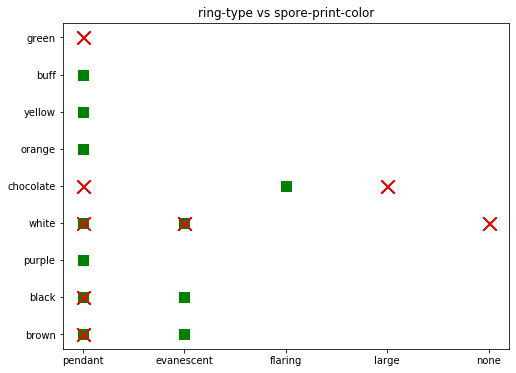

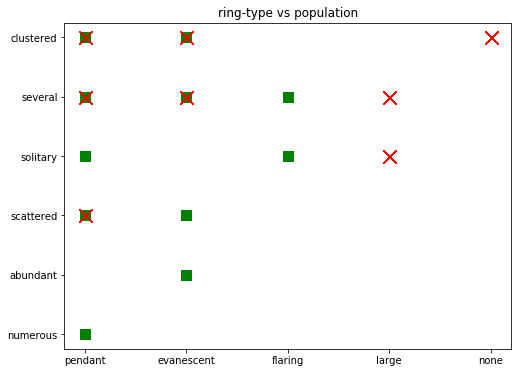

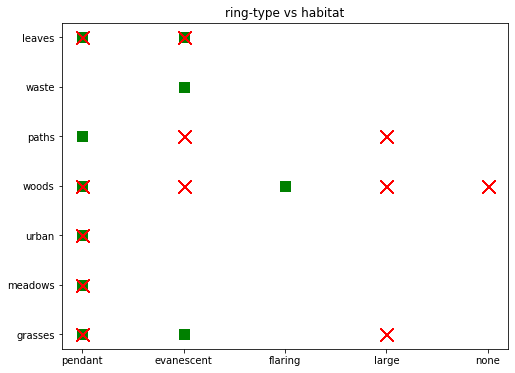

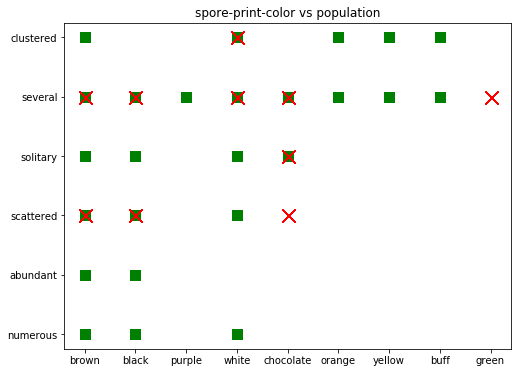

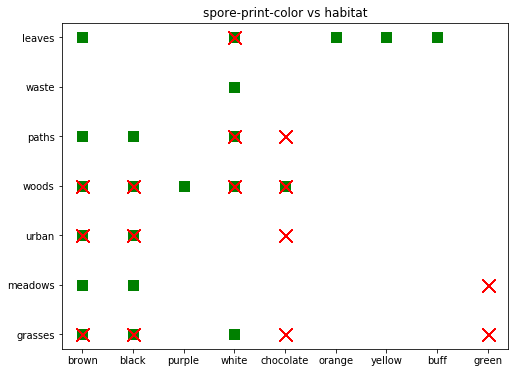

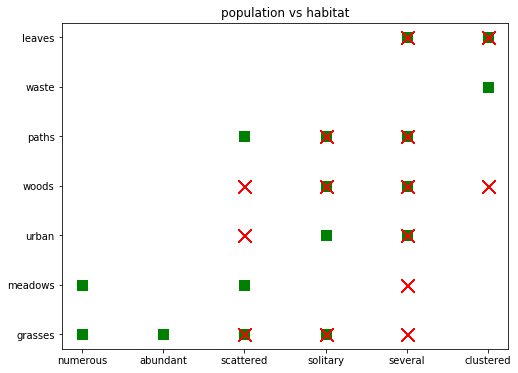

In [18]:
#Generate all the required graphs in order to check the lesser ambiguous graphs.
edi=mush.loc[mush['class']=='edible',:]
poi=mush.loc[mush['class']=='poisonous',:]
leng=len(props)
for i in range(0,leng):
    for j in range(i+1,leng):
        plt.figure(figsize=(8,6))
        title=str(props[i]+' vs '+props[j])
        plt.title(title)
        plt.plot(props[i],props[j],'gs',data=edi,markersize=10)
        plt.plot(props[i],props[j],'rx',data=poi,markersize=13)
        name=str(props[i]+' vs '+props[j])
        plt.savefig(name)

Text(1.8, 3.3, '0.92')

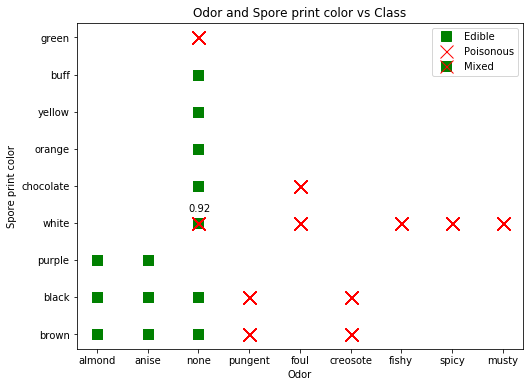

In [19]:
import matplotlib as mat
#mat.rcParams['figure.dpi'] = 300
# Odor and spore print color vs Class
edi=mush.loc[mush['class']=='edible',:]
poi=mush.loc[mush['class']=='poisonous',:]

plt.figure(figsize=(8,6))
plt.title('Odor and Spore print color vs Class')
greensq,=plt.plot('odor','spore-print-color','gs',data=edi,markersize=10)
redx,=plt.plot('odor','spore-print-color','rx',data=poi,markersize=13)
plt.ylabel('Spore print color')
plt.xlabel('Odor')
temp=mush.loc[((mush['spore-print-color']=='white')&(mush['odor']=='none'))]
prob=temp.loc[temp['class']=='edible','class'].count()/(temp.loc[temp['class']=='poisonous','class'].count()+temp.loc[temp['class']=='edible','class'].count())
prob= "{:.2f}".format(prob)
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])
plt.annotate(prob,('none','white'),xytext=(1.8,3.3))

Text(1.8, 0.04, '0.96')

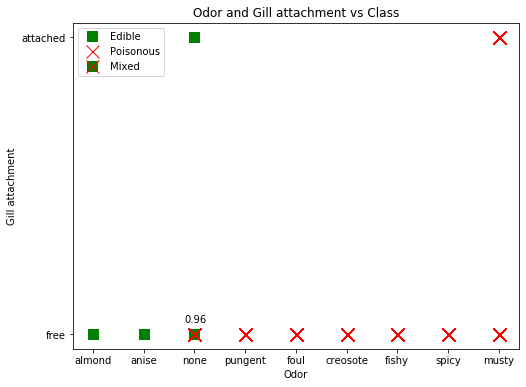

In [20]:
edi=mush.loc[mush['class']=='edible',:]
poi=mush.loc[mush['class']=='poisonous',:]
plt.figure(figsize=(8,6))
plt.title('Odor and Gill attachment vs Class')
greensq,=plt.plot('odor','gill-attachment','gs',data=edi,markersize=10)
redx,=plt.plot('odor','gill-attachment','rx',data=poi,markersize=13)
plt.ylabel('Gill attachment')
plt.xlabel('Odor')
temp=mush.loc[((mush['gill-attachment']=='free')&(mush['odor']=='none'))]
prob=temp.loc[temp['class']=='edible','class'].count()/(temp.loc[temp['class']=='poisonous','class'].count()+temp.loc[temp['class']=='edible','class'].count())
prob= "{:.2f}".format(prob)
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])
plt.annotate(prob,('none','free'),xytext=(1.8,0.04))

Text(1e-20, 0.15, '0.51')

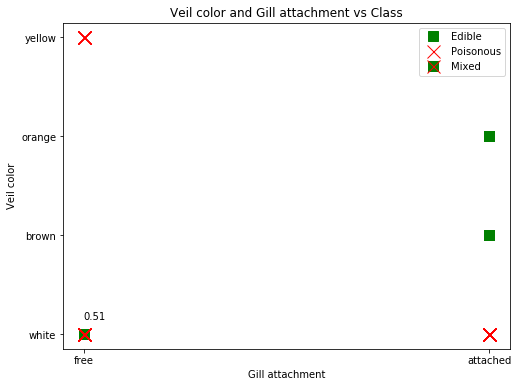

In [21]:
edi=mush.loc[mush['class']=='edible',:]
poi=mush.loc[mush['class']=='poisonous',:]
plt.figure(figsize=(8,6))
plt.title('Veil color and Gill attachment vs Class')
greensq,=plt.plot('gill-attachment','veil-color','gs',data=edi,markersize=10)
redx,=plt.plot('gill-attachment','veil-color','rx',data=poi,markersize=13)
plt.xlabel('Gill attachment')
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])
plt.ylabel('Veil color')
temp=mush.loc[((mush['gill-attachment']=='free')&(mush['veil-color']=='white'))]
prob=temp.loc[temp['class']=='edible','class'].count()/(temp.loc[temp['class']=='poisonous','class'].count()+temp.loc[temp['class']=='edible','class'].count())
prob= "{:.2f}".format(prob)
plt.annotate(prob,('free','white'),xytext=(0.00000000000000000001,0.15))

Text(1.8, 0.05, '0.88')

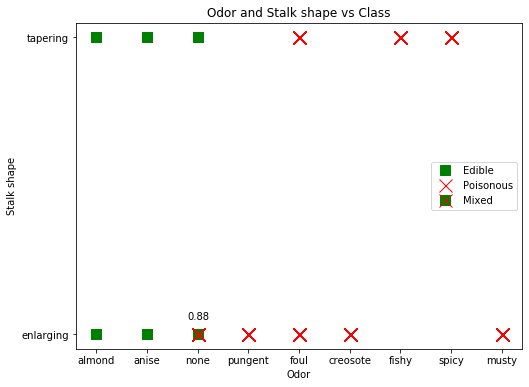

In [22]:
edi=mush.loc[mush['class']=='edible',:]
poi=mush.loc[mush['class']=='poisonous',:]
plt.figure(figsize=(8,6))
plt.title('Odor and Stalk shape vs Class')
greensq,=plt.plot('odor','stalk-shape','gs',data=edi,markersize=10)
redx,=plt.plot('odor','stalk-shape','rx',data=poi,markersize=13)
plt.ylabel('Stalk shape')
plt.xlabel('Odor')
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])
temp=mush.loc[((mush['stalk-shape']=='enlarging')&(mush['odor']=='none'))]
prob=temp.loc[temp['class']=='edible','class'].count()/(temp.loc[temp['class']=='poisonous','class'].count()+temp.loc[temp['class']=='edible','class'].count())
prob= "{:.2f}".format(prob)
plt.annotate(prob,('none','enlarging'),xytext=(1.8,0.05))

Text(1.8, 0.15, '0.97')

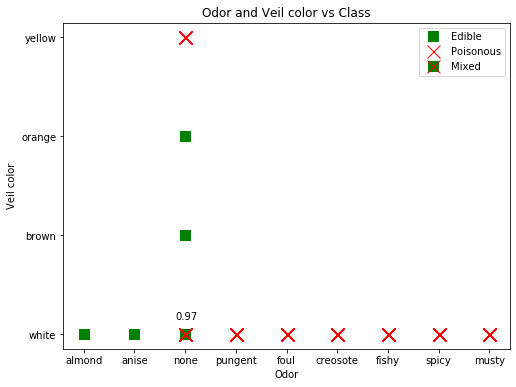

In [23]:
edi=mush.loc[mush['class']=='edible',:]
poi=mush.loc[mush['class']=='poisonous',:]
plt.figure(figsize=(8,6))
plt.title('Odor and Veil color vs Class')
plt.ylabel('Veil color')
plt.xlabel('Odor')
greensq,=plt.plot('odor','veil-color','gs',data=edi,markersize=10)
redx,=plt.plot('odor','veil-color','rx',data=poi,markersize=13)
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])
temp=mush.loc[((mush['veil-color']=='white')&(mush['odor']=='none'))]
prob=temp.loc[temp['class']=='edible','class'].count()/(temp.loc[temp['class']=='poisonous','class'].count()+temp.loc[temp['class']=='edible','class'].count())
prob= "{:.2f}".format(prob)
plt.annotate(prob,('none','white'),xytext=(1.8,0.15))


We will consider only one of the above cases with 1 ambiguous point.

In [24]:
#Dataset with odor as none and spore print color white
odorn=mush.loc[((mush['odor']=='none') &(mush['spore-print-color']=='white')),:]
props=list(odorn.columns)
props.remove('class')
pval=[]
chi=[]
for i in props:
    ct=pd.crosstab(odorn[i],columns=odorn['class'])
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(ct)
    pval.append(p)
    chi.append(chi2)
chisq1=pd.DataFrame()
chisq1['Properties']=props
chisq1['P value']=pval
chisq1['Chi Square value']=chi
chisq1.sort_values('Chi Square value',ascending=False)

Properties       P value  Chi Square value
20                   habitat  1.080658e-77        364.866667
12  stalk-surface-below-ring  4.011128e-76        352.634286
14    stalk-color-below-ring  6.497756e-72        333.192453
2                  cap-color  4.241261e-66        324.120301
16               ring-number  1.239223e-62        279.001677
7                  gill-size  1.239223e-62        279.001677
19                population  4.749448e-24        115.555556
13    stalk-color-above-ring  1.084777e-22        105.375661
10                stalk-root  6.731998e-22         97.500000
1                cap-surface  5.546551e-19         88.121335
8                 gill-color  7.440922e-18         86.457831
15                veil-color  3.796287e-20         84.523742
11  stalk-surface-above-ring  4.832341e-15         69.748283
0                  cap-shape  2.517731e-11         55.528420
17                 ring-type  5.783073e-08         29.434770
6               gill-spacing  1.353378e-03         10.268267
3                    bruises  3.669017e-03          8.440766
9                stalk-shape  1.000000e+00          0.000000
5            gill-attachment  1.000000e+00          0.000000
4                       odor  1.000000e+00          0.000000
18         spore-print-color  1.000000e+00          0.000000

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


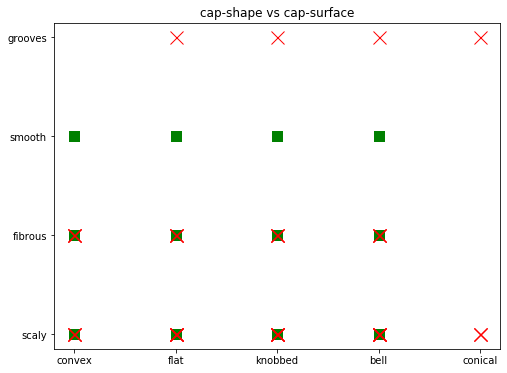

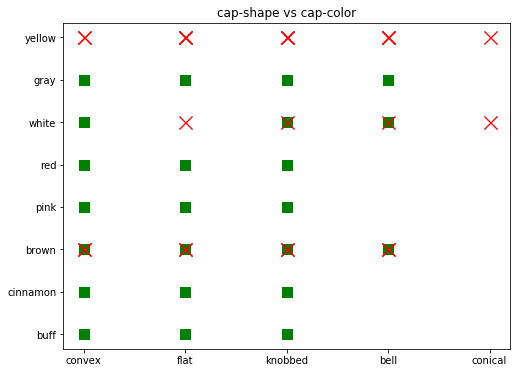

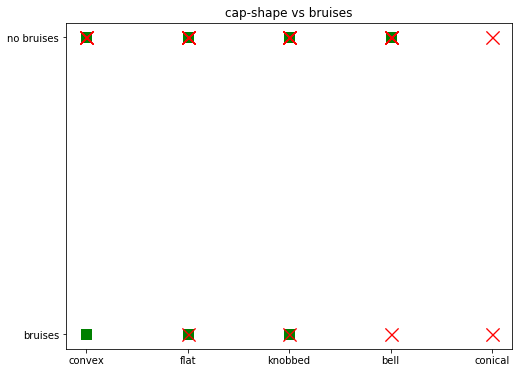

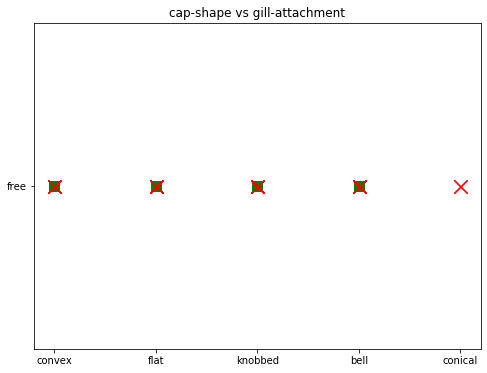

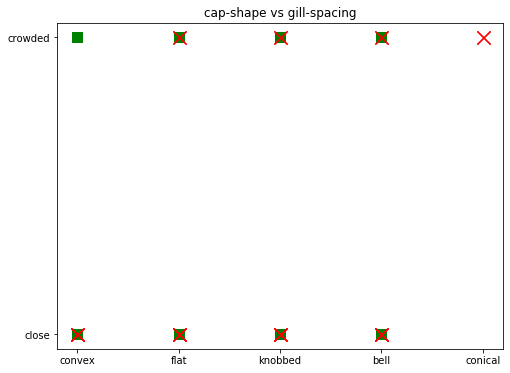

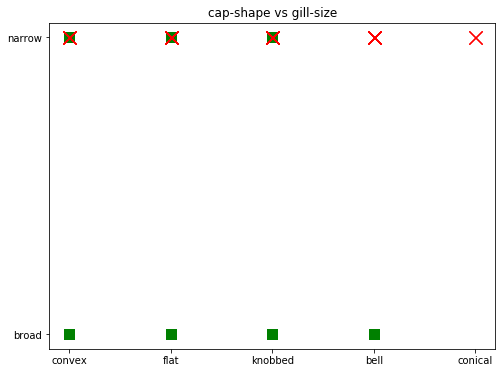

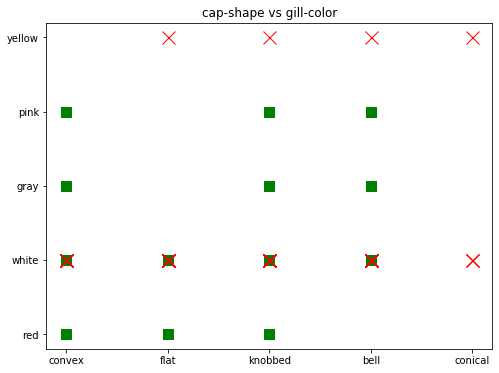

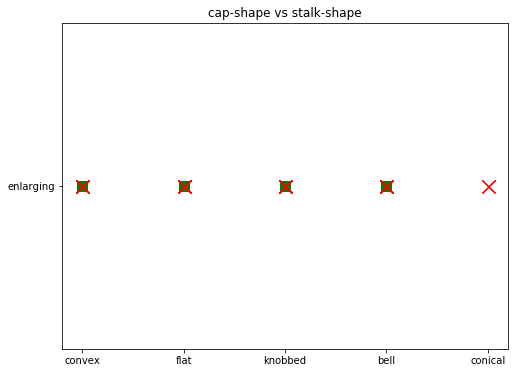

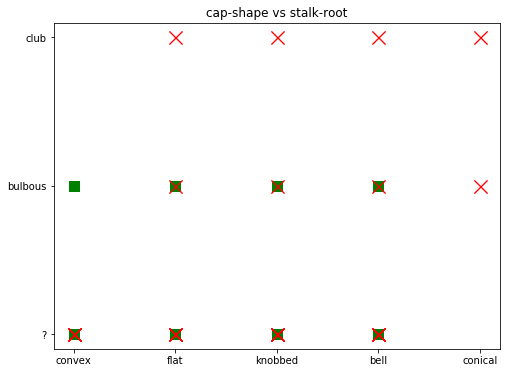

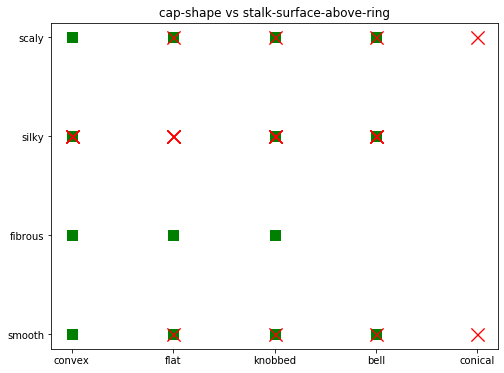

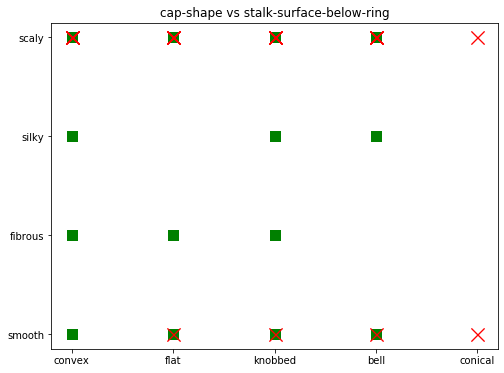

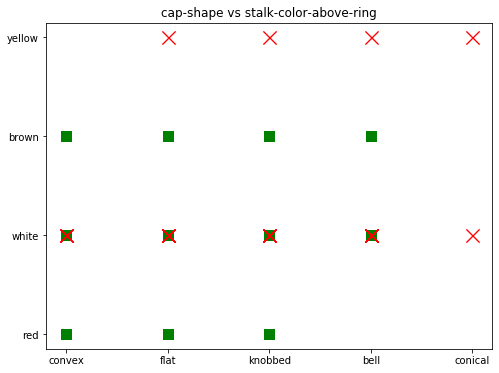

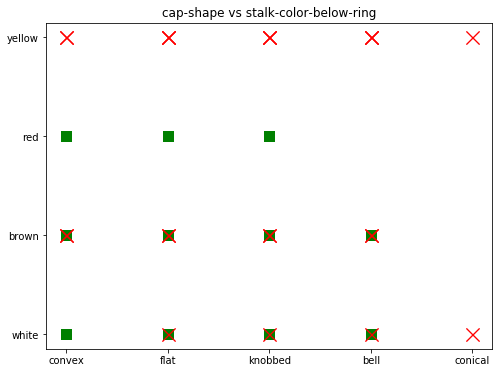

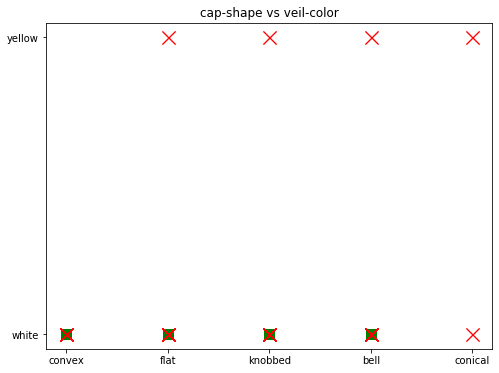

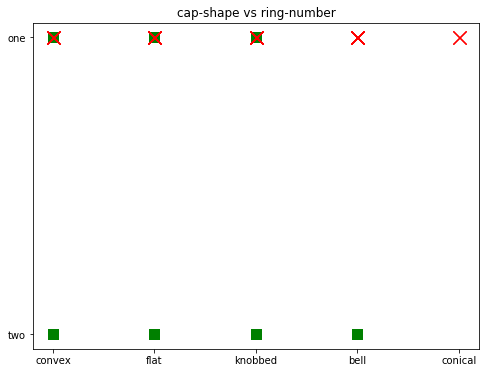

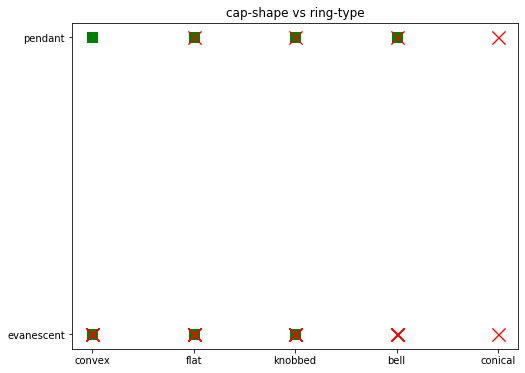

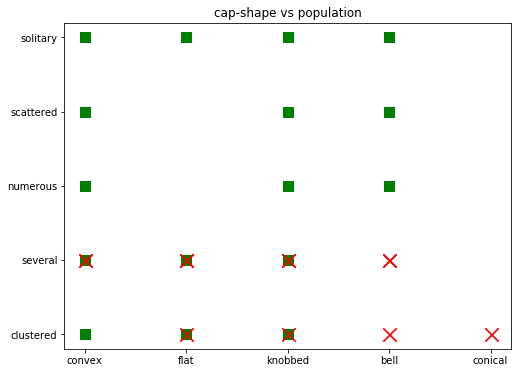

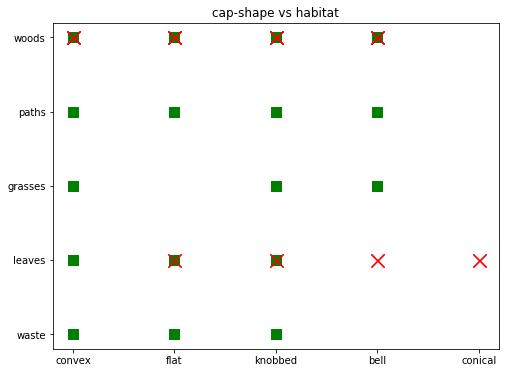

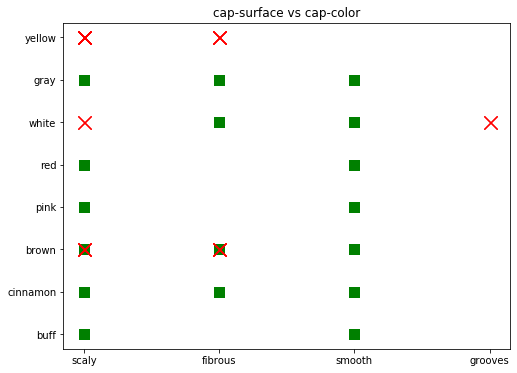

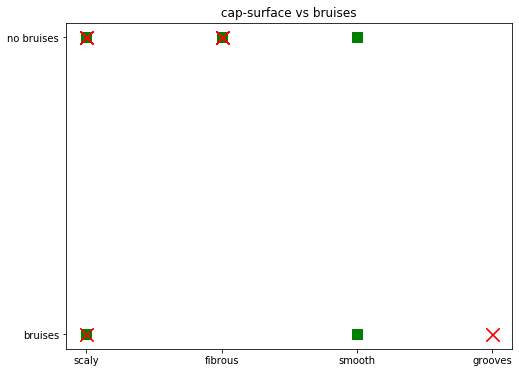

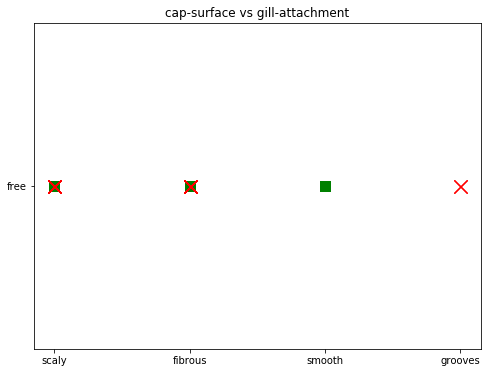

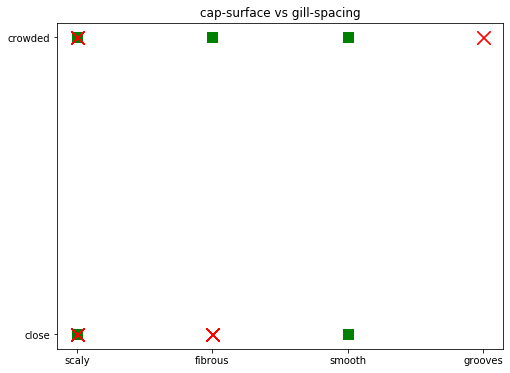

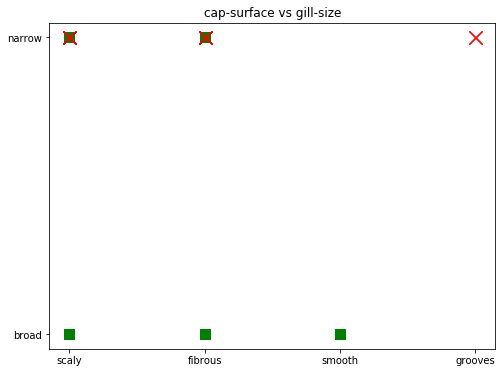

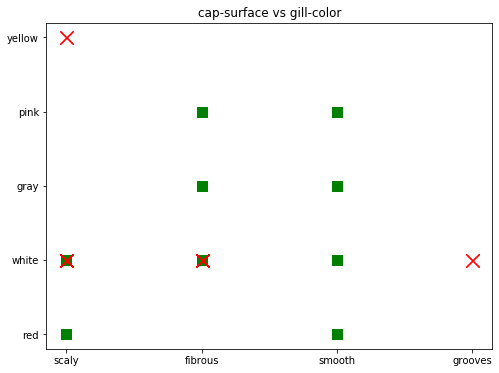

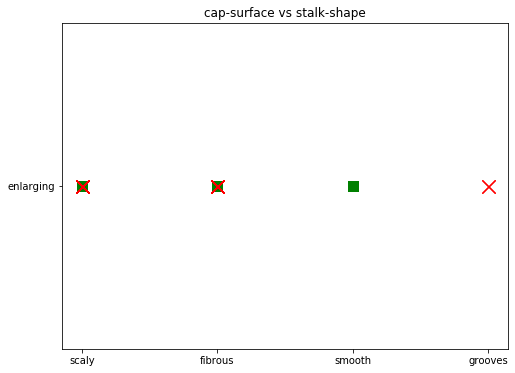

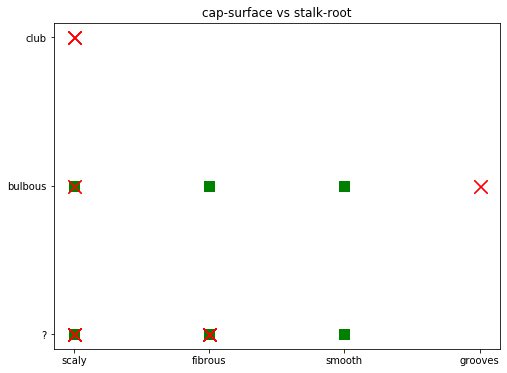

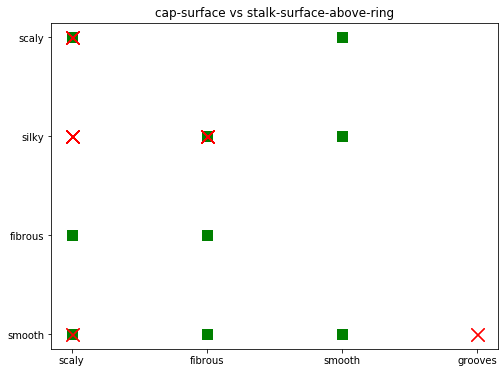

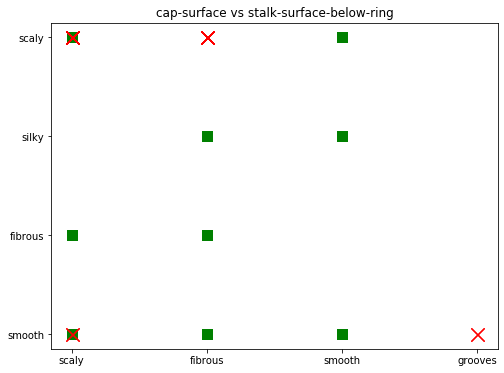

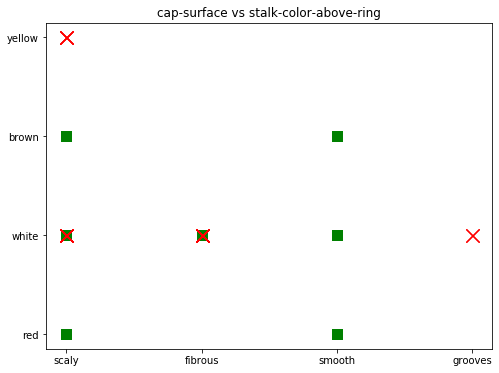

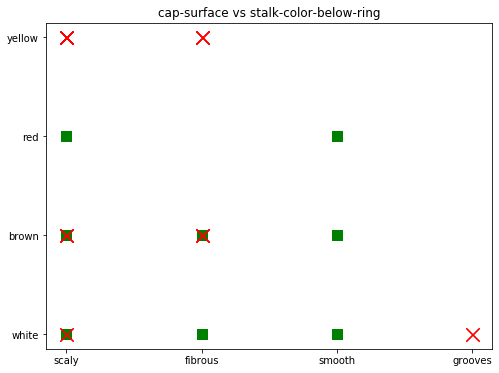

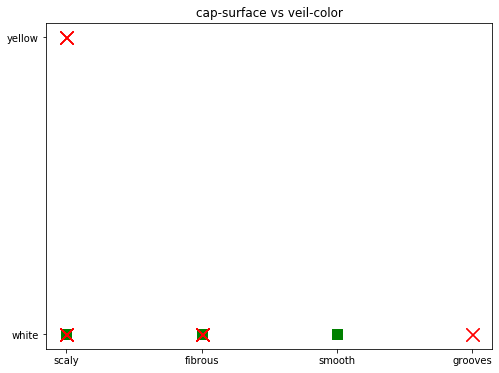

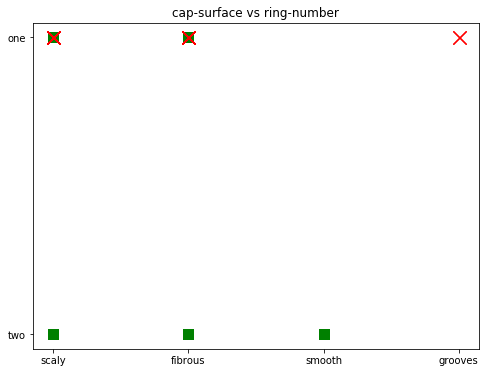

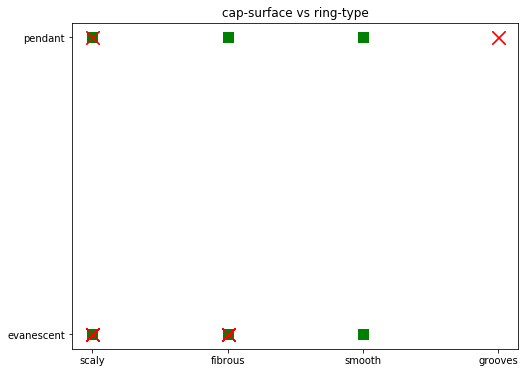

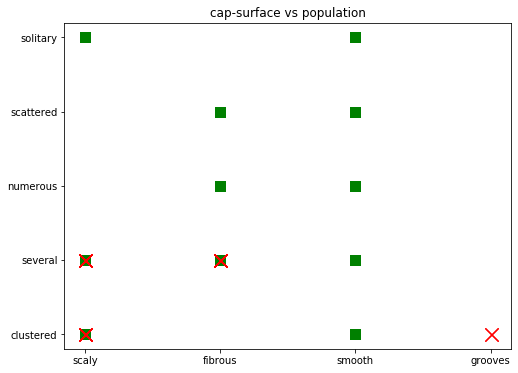

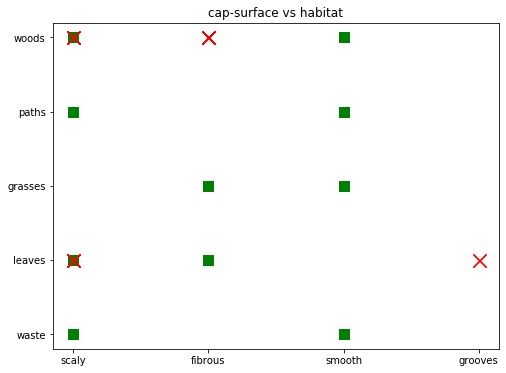

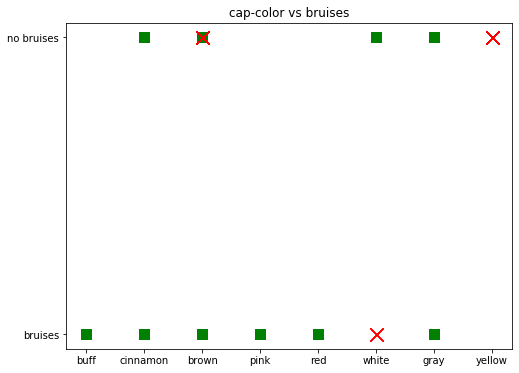

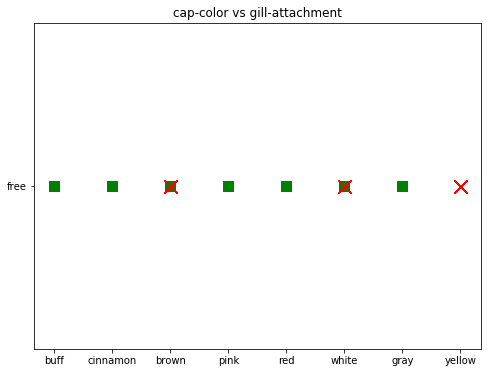

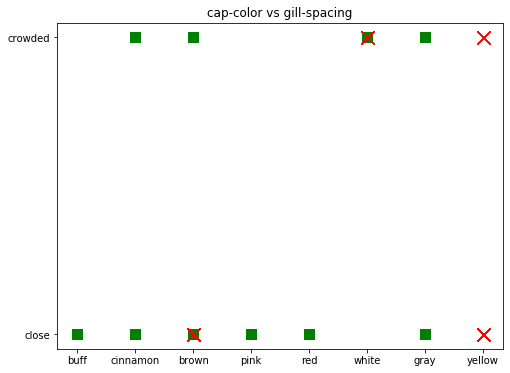

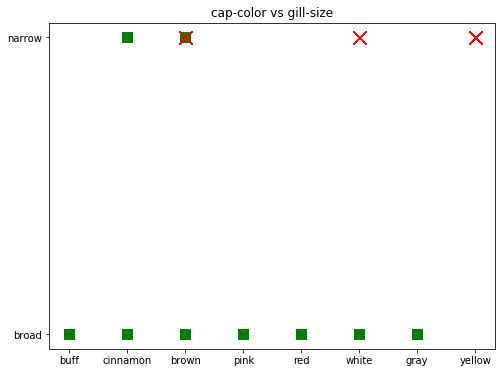

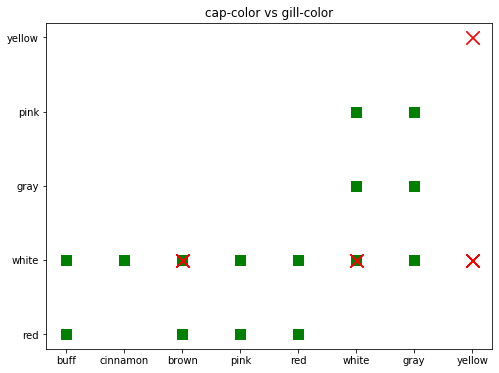

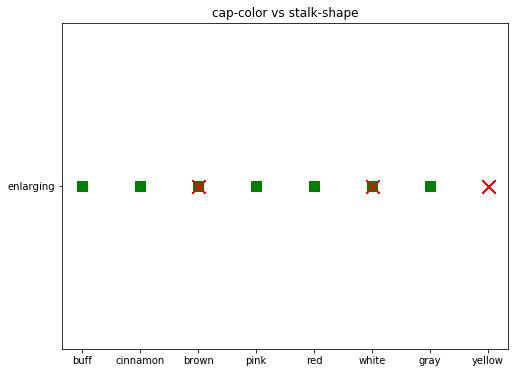

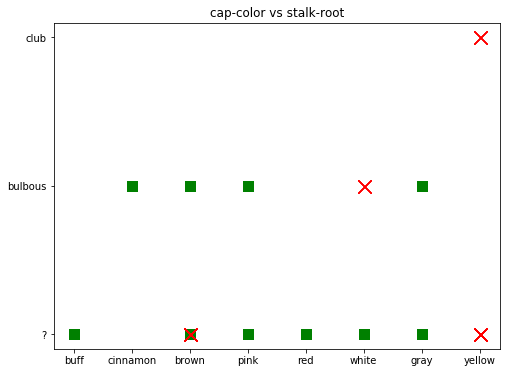

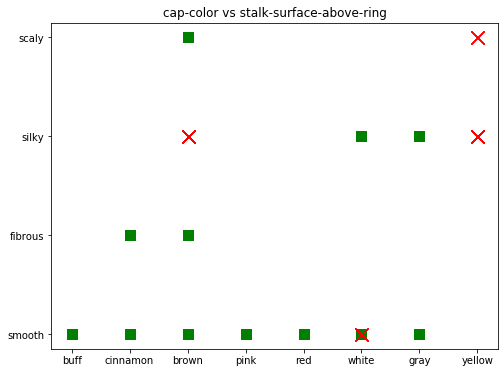

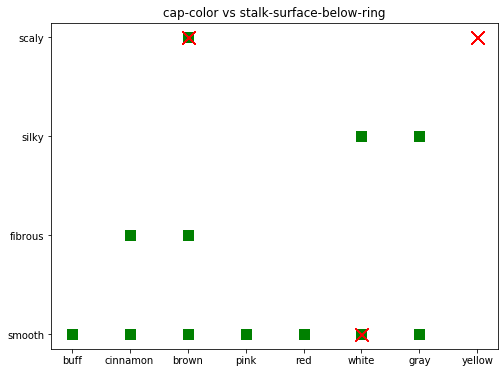

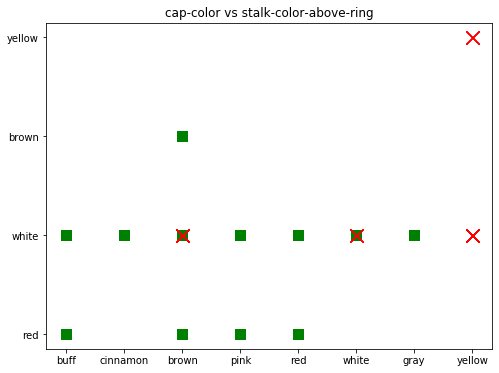

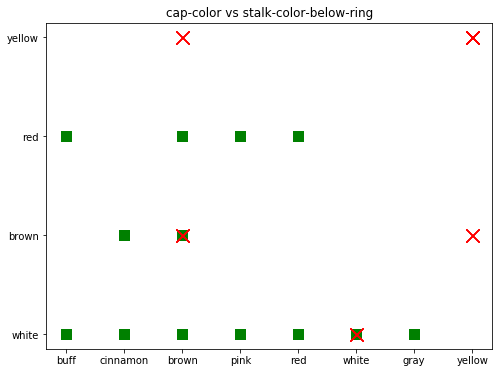

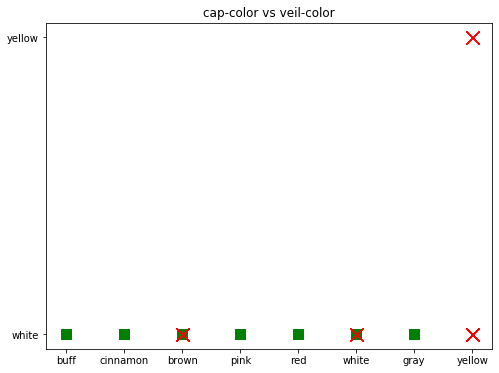

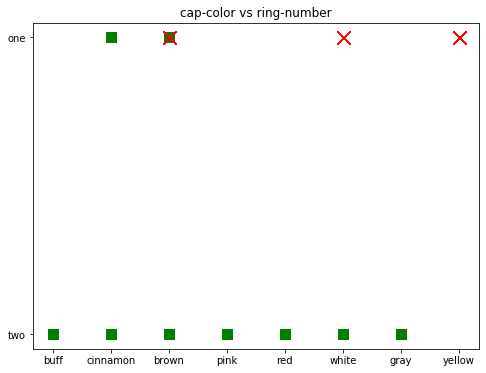

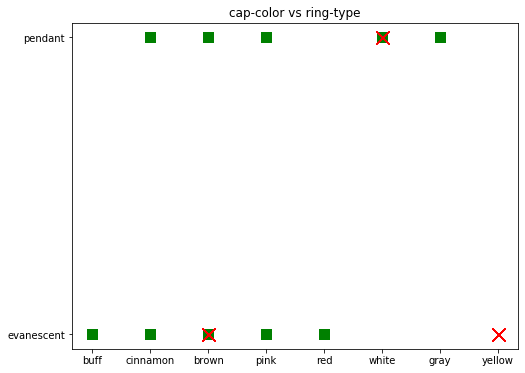

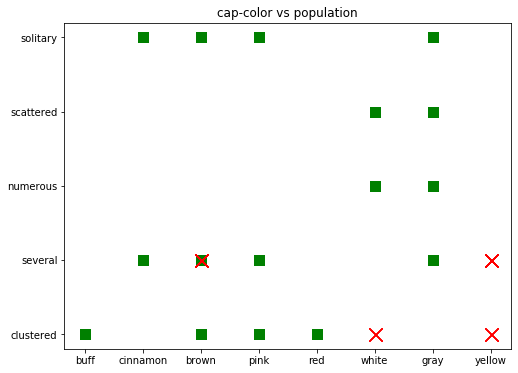

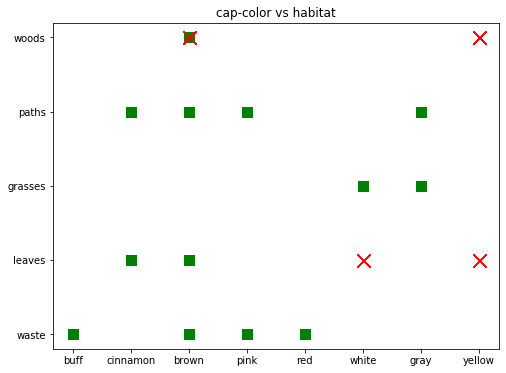

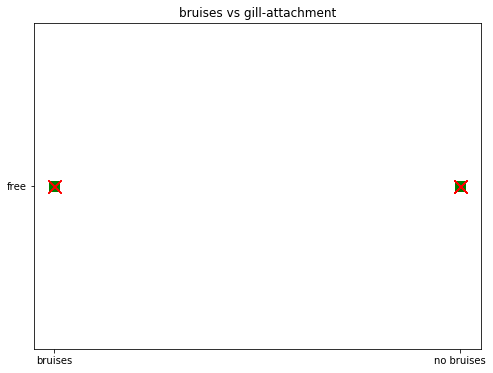

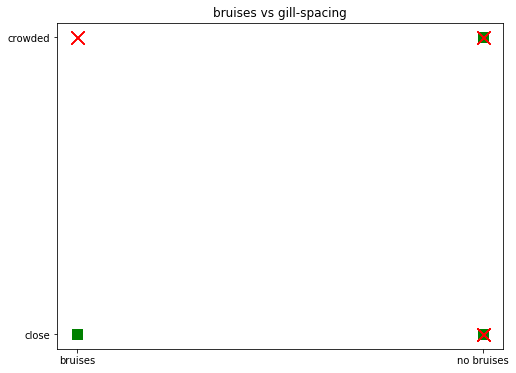

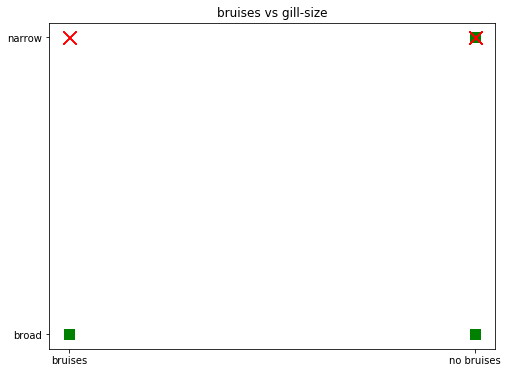

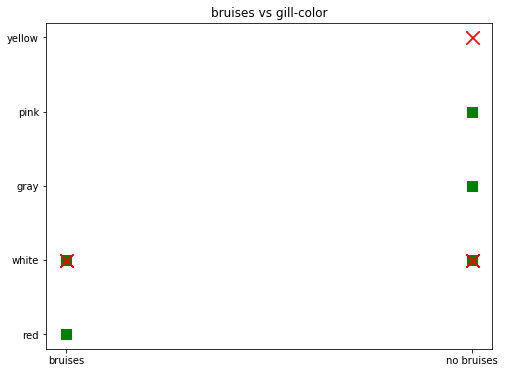

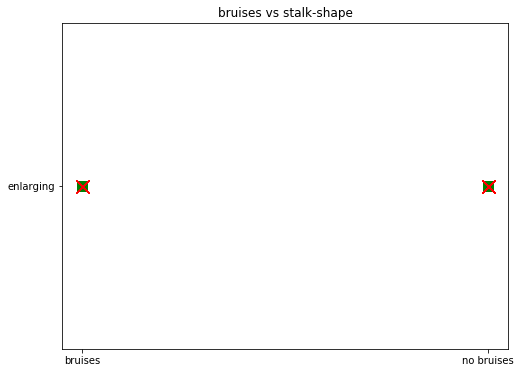

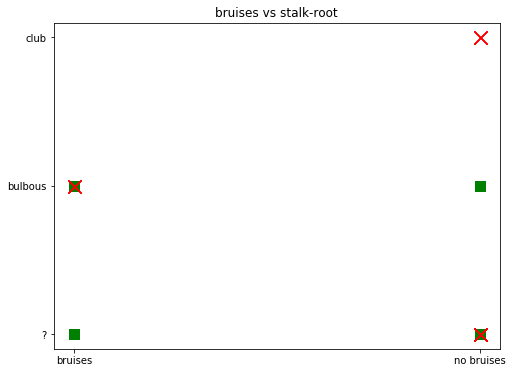

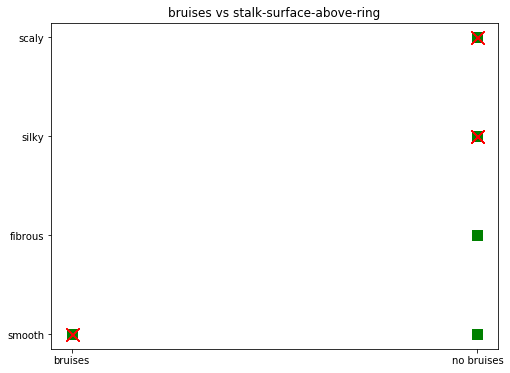

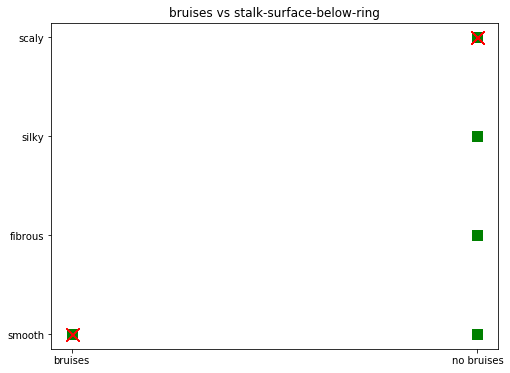

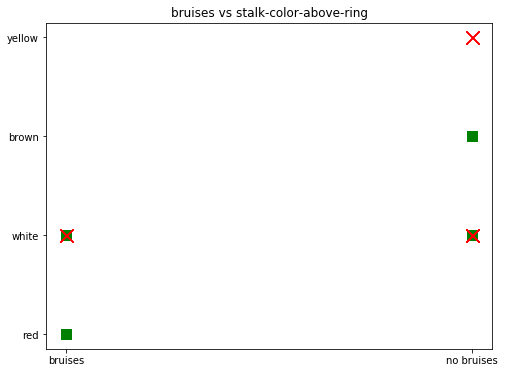

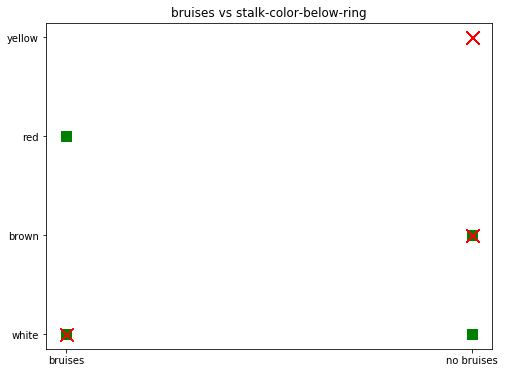

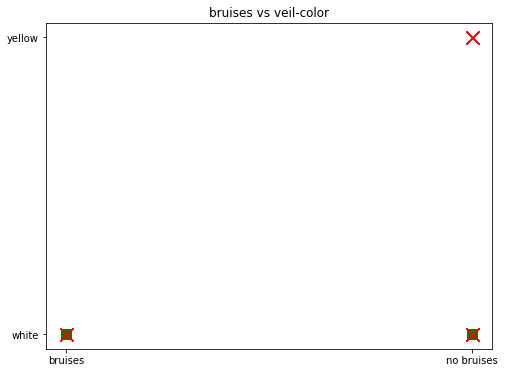

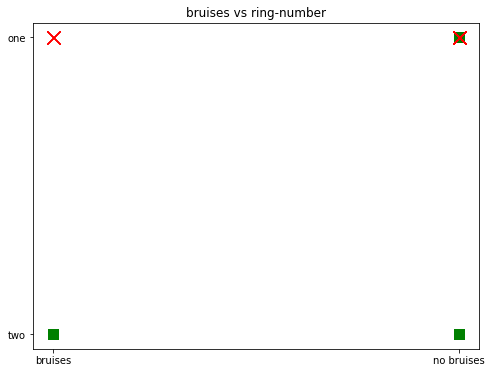

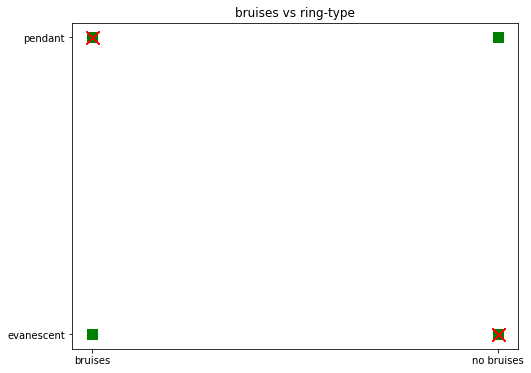

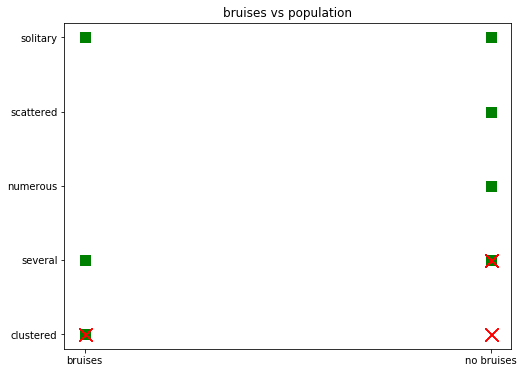

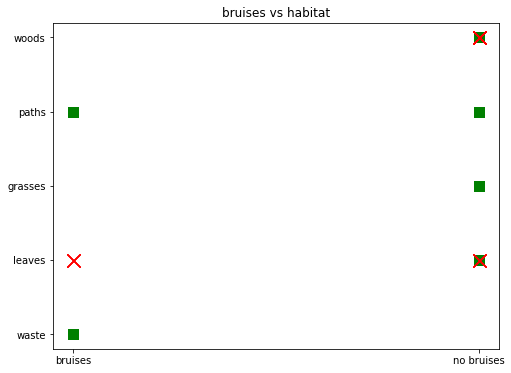

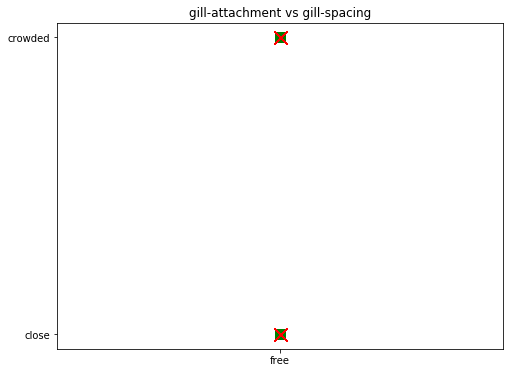

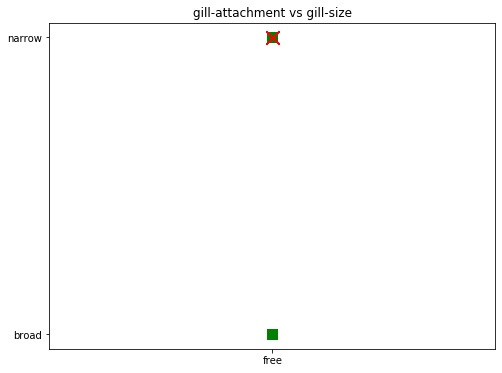

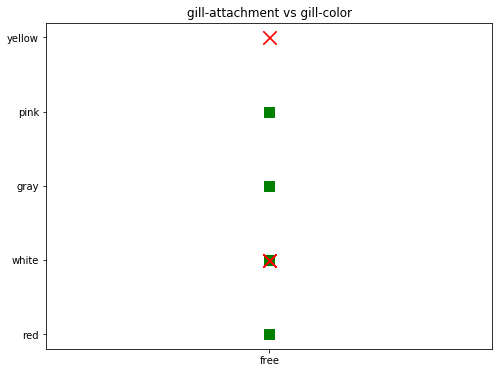

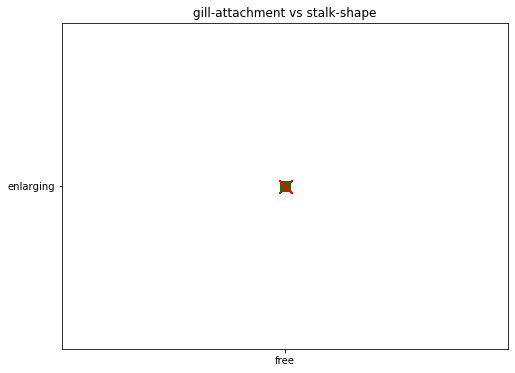

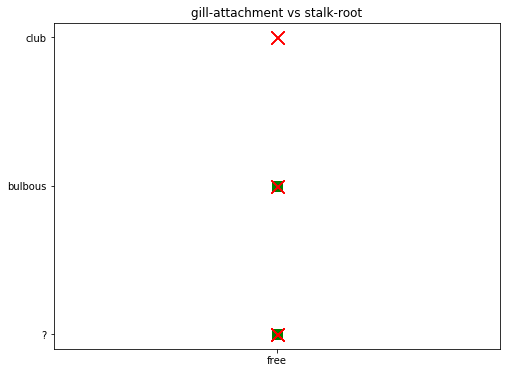

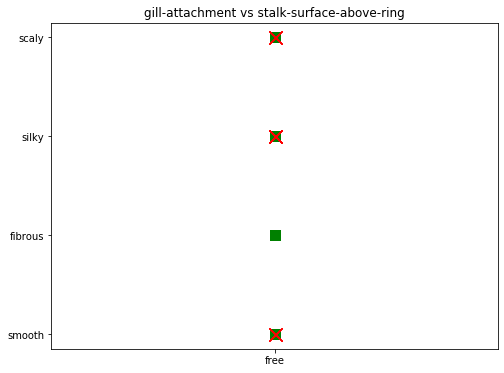

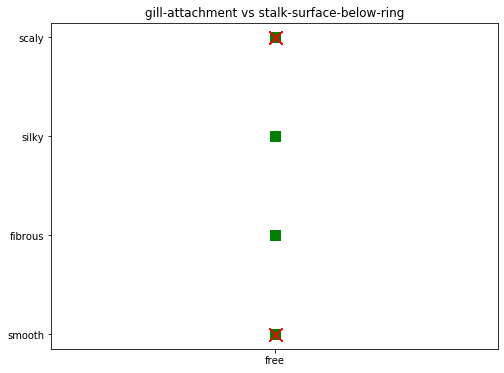

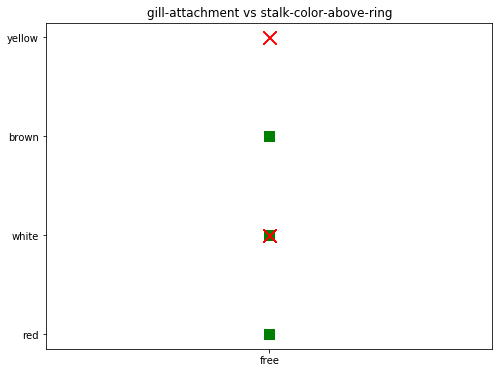

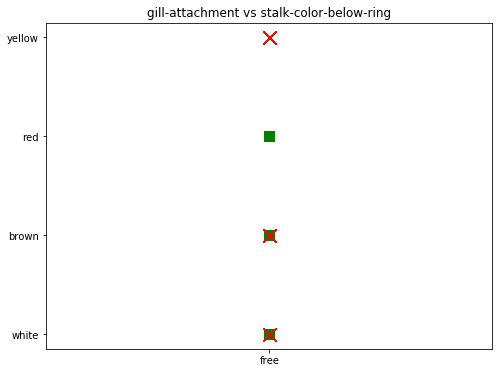

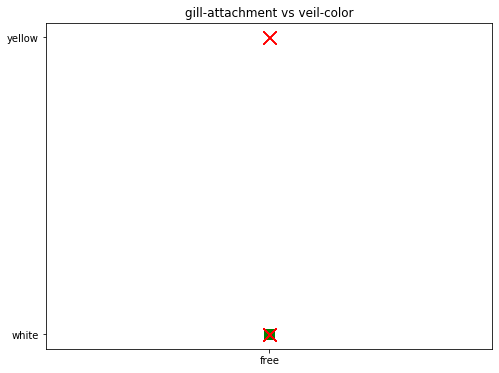

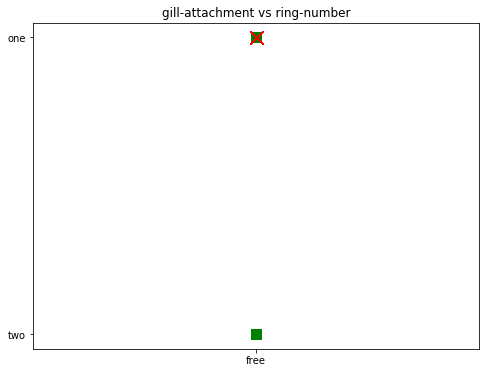

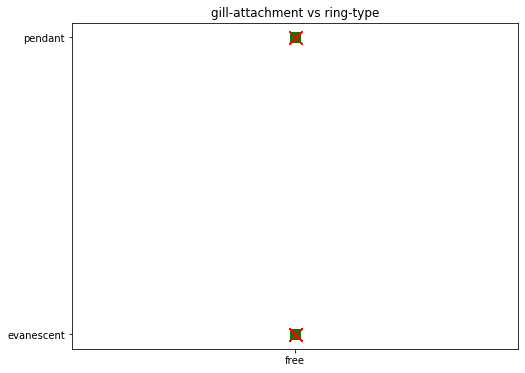

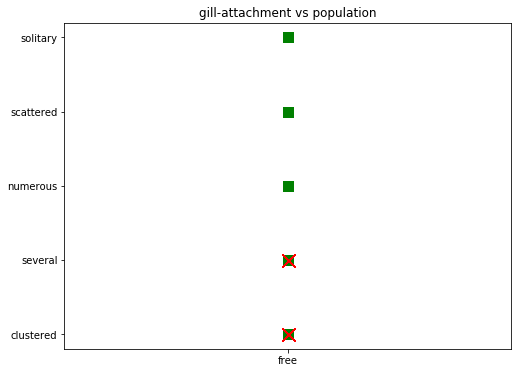

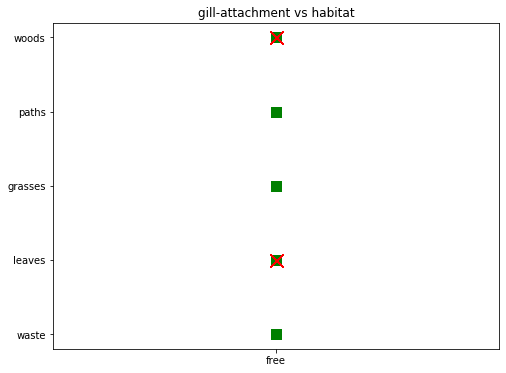

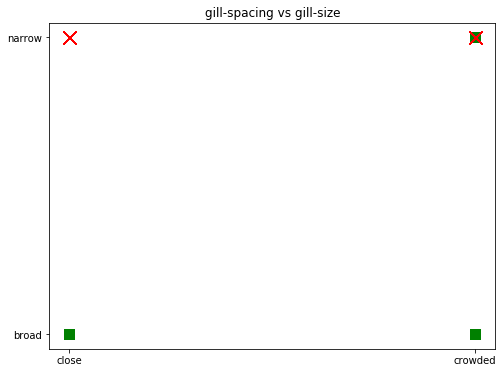

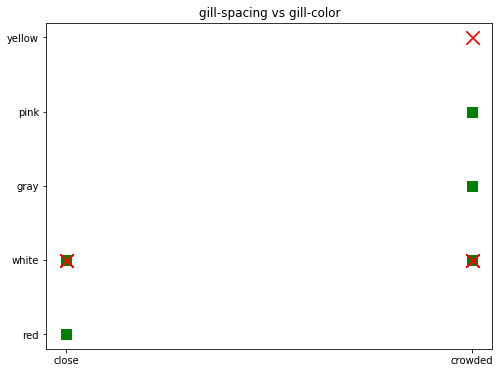

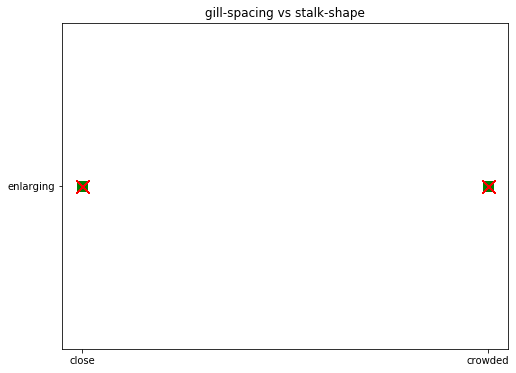

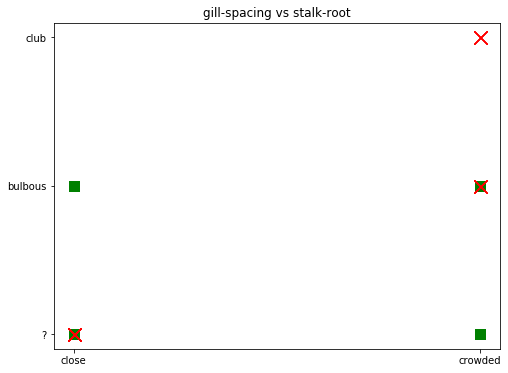

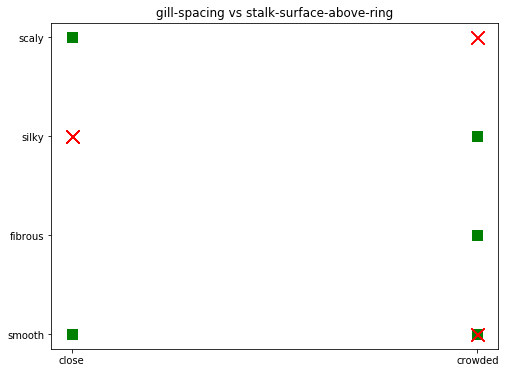

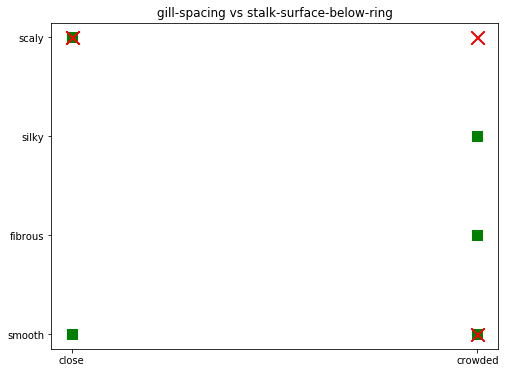

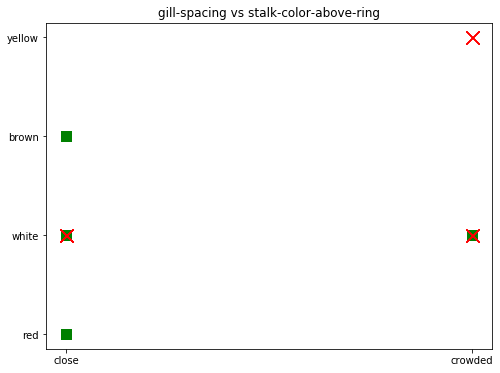

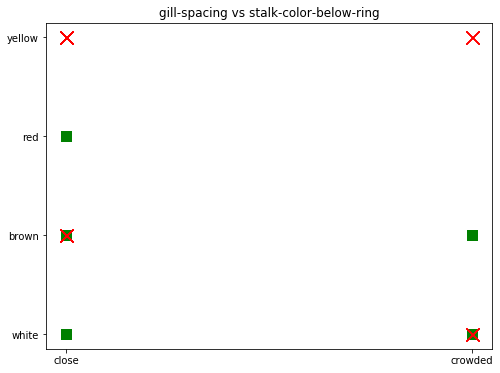

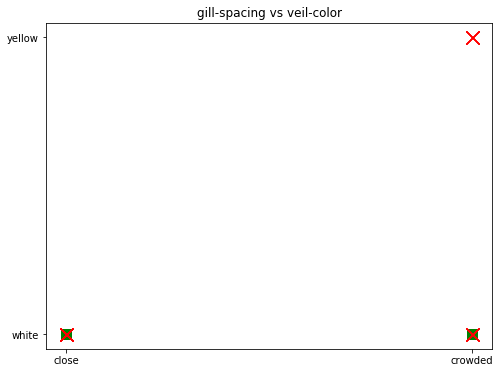

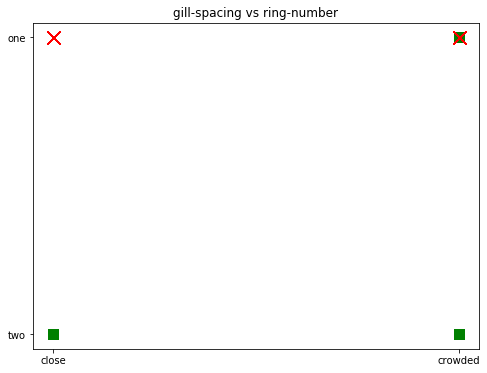

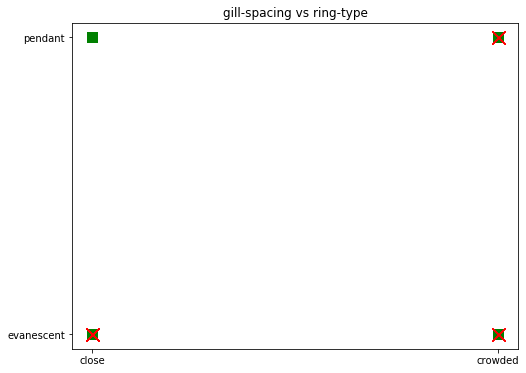

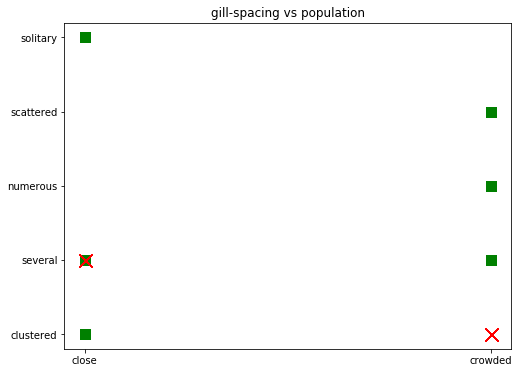

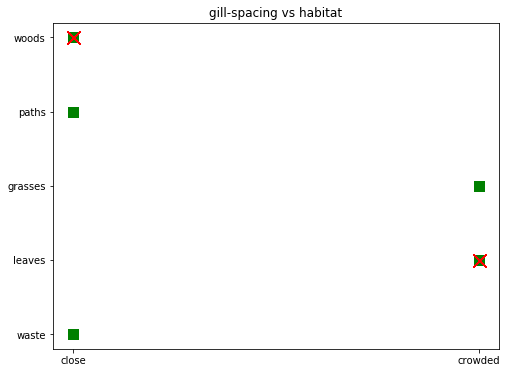

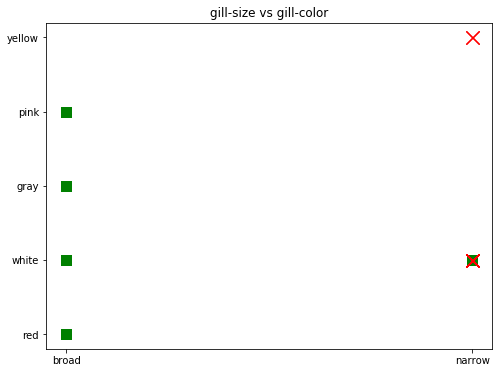

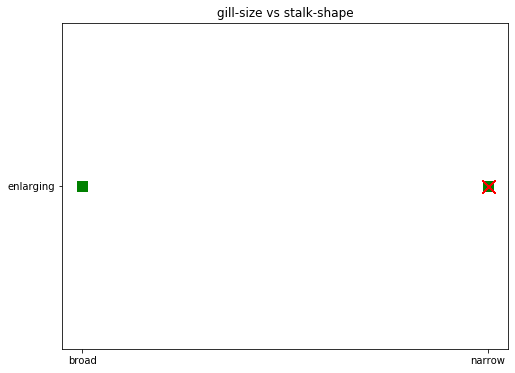

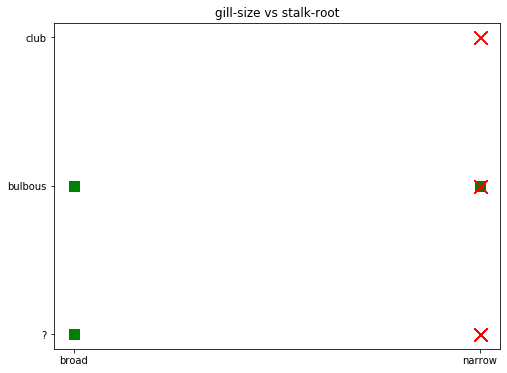

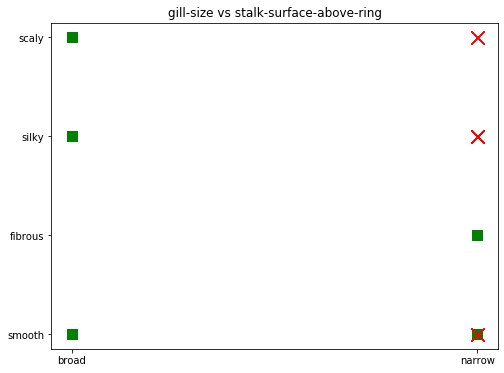

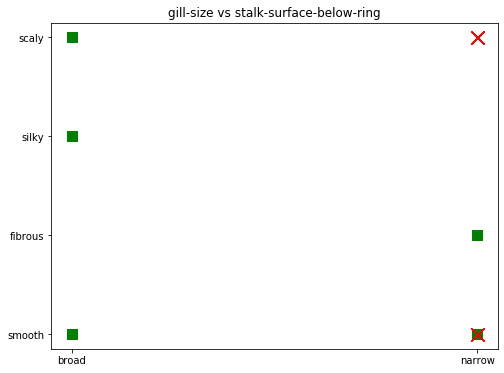

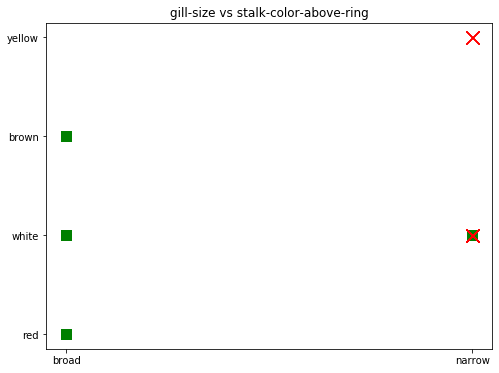

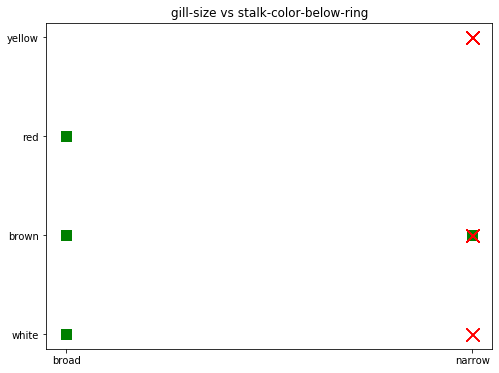

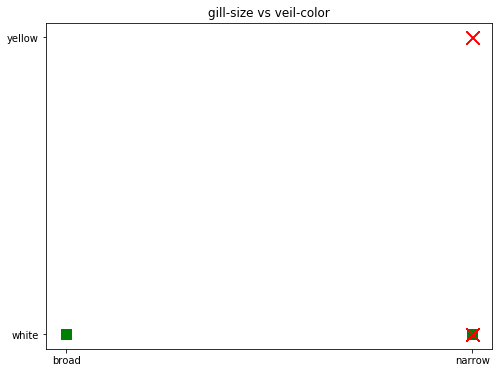

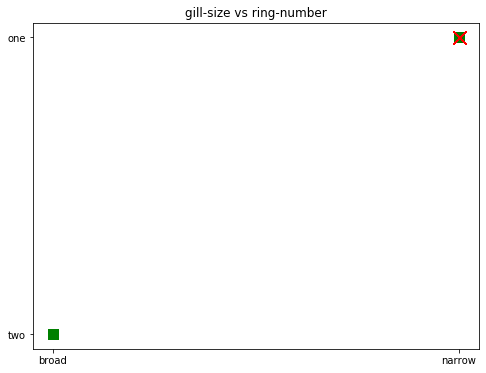

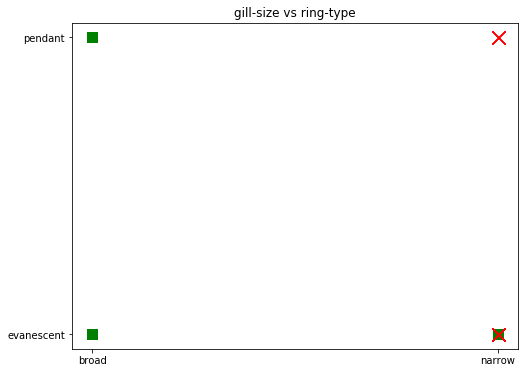

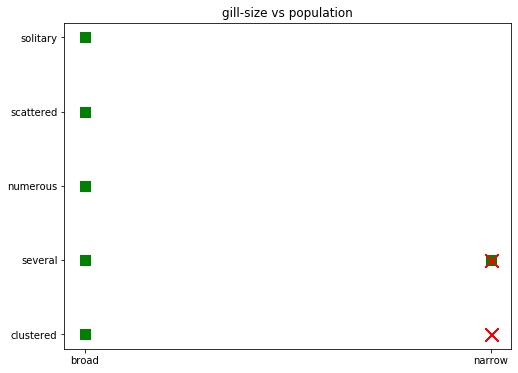

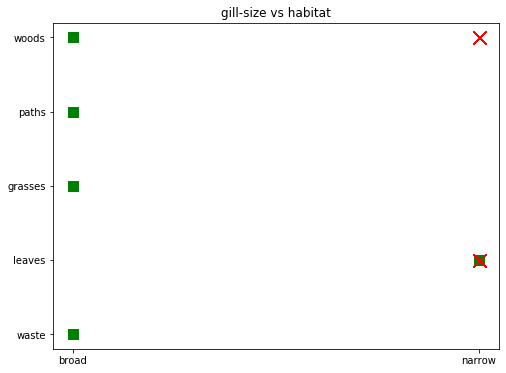

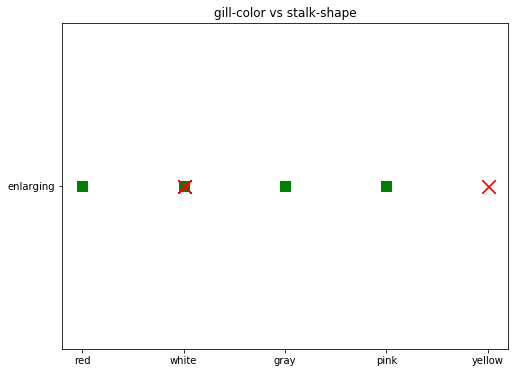

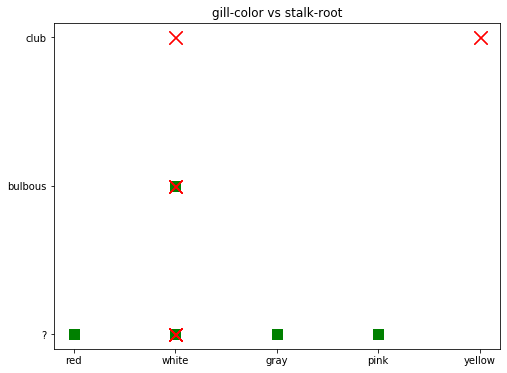

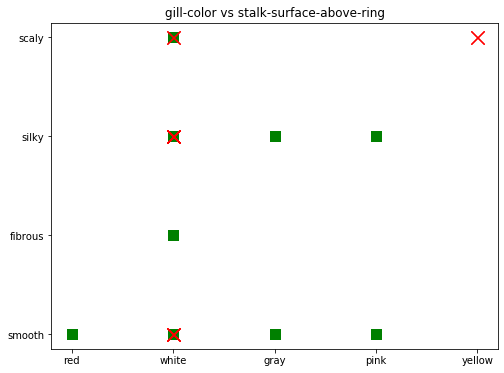

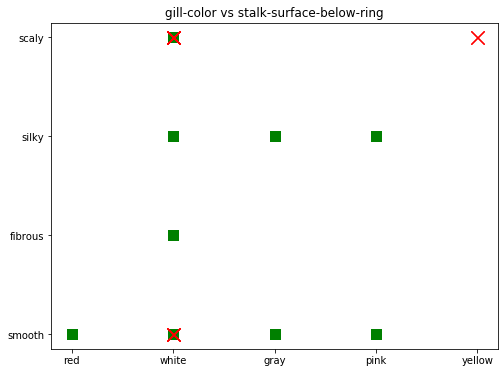

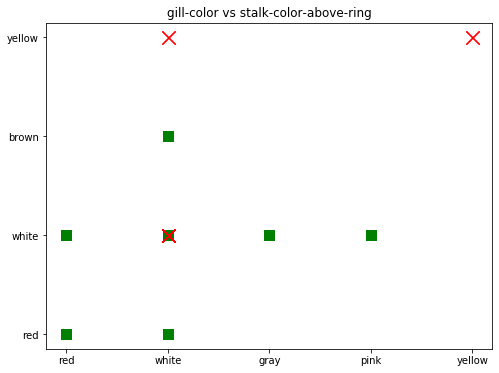

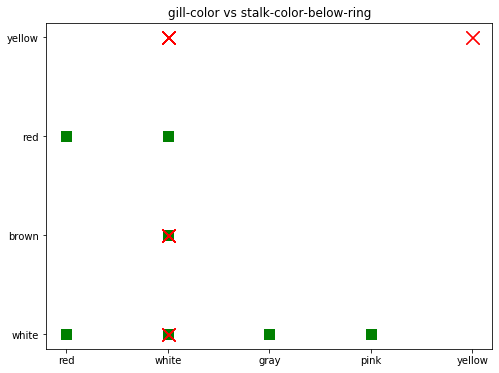

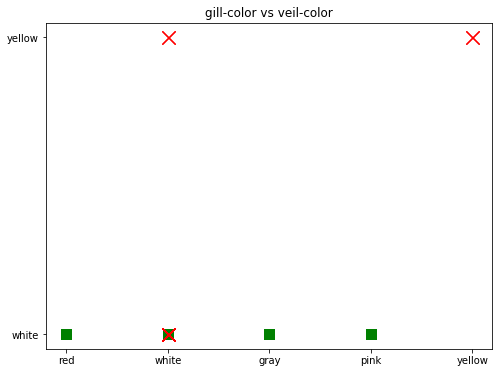

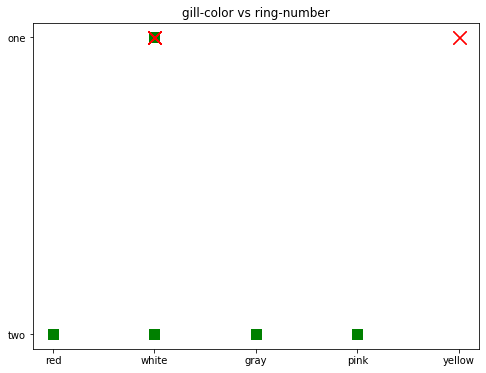

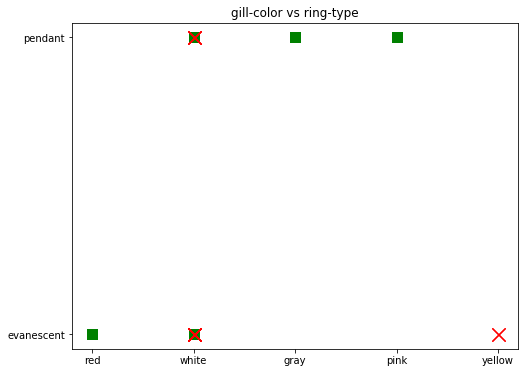

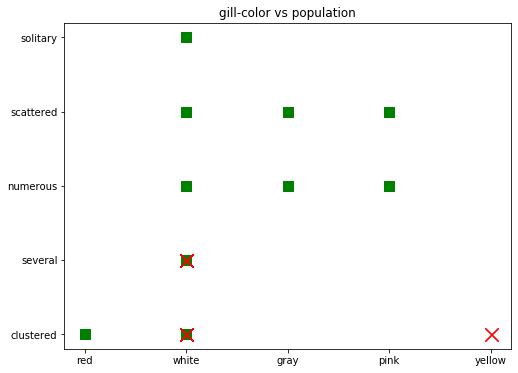

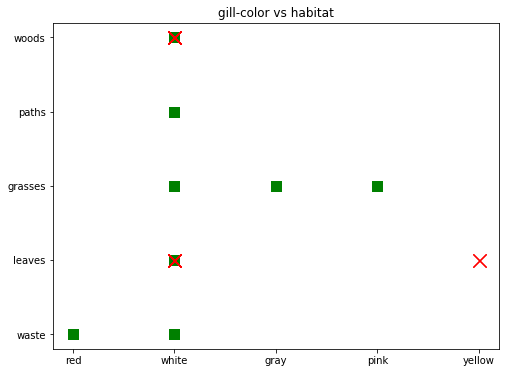

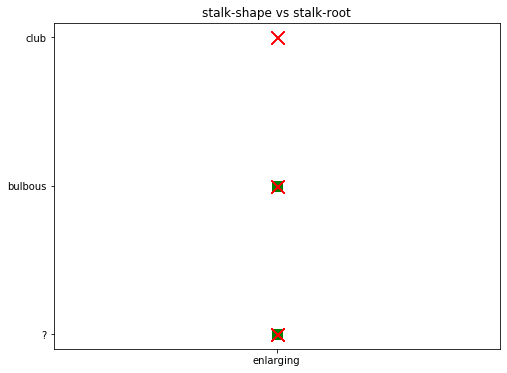

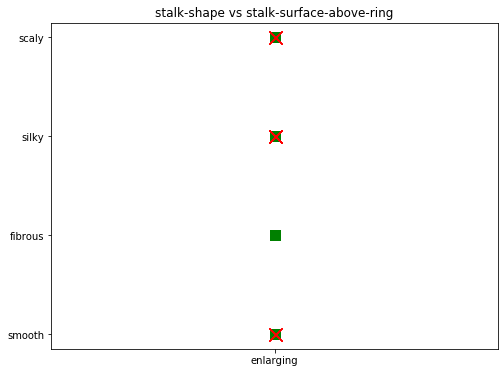

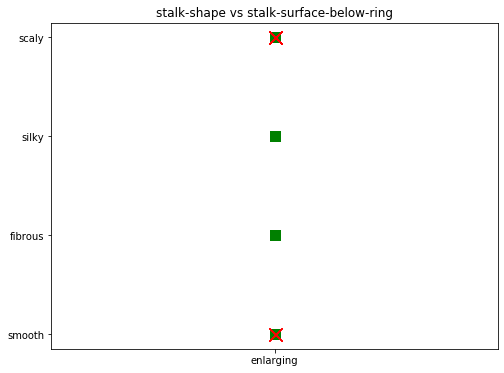

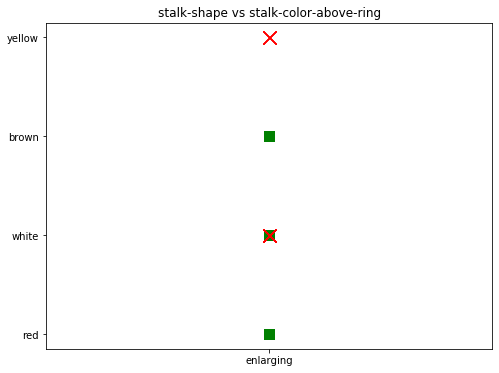

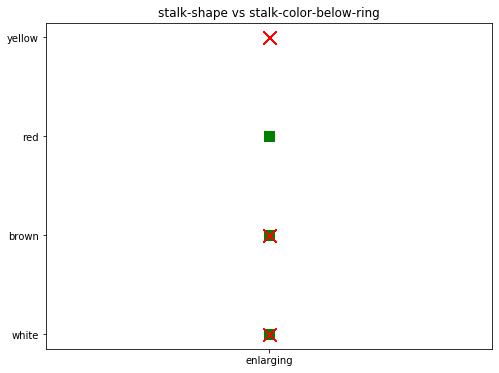

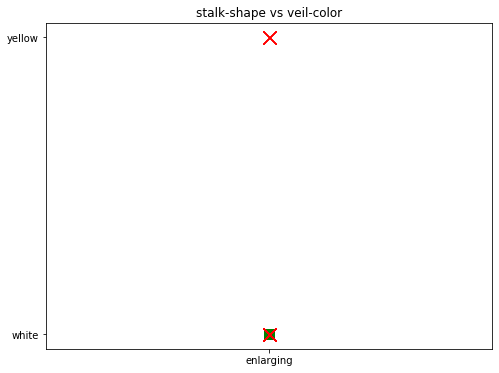

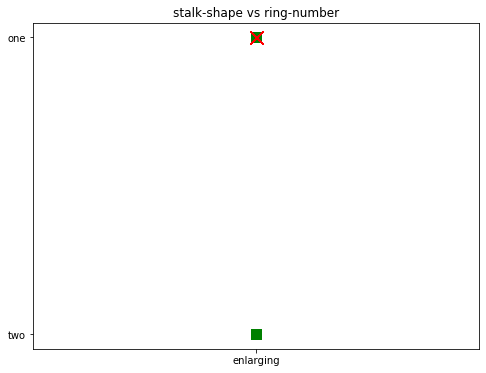

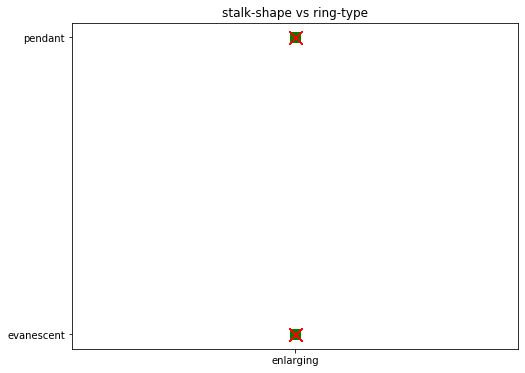

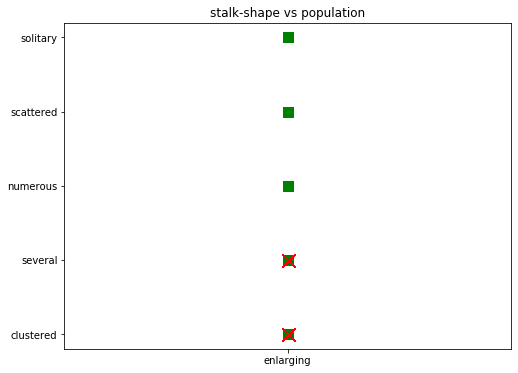

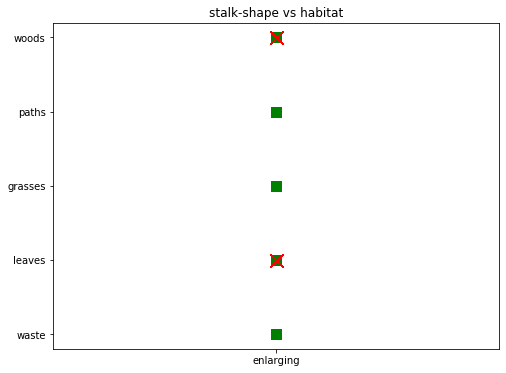

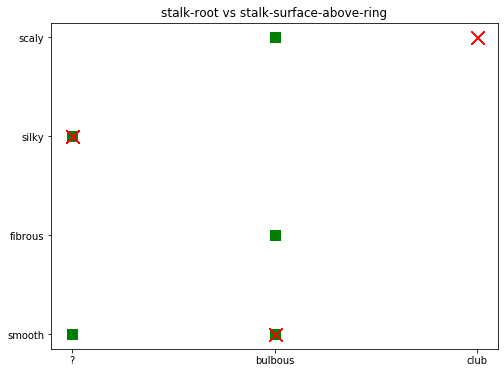

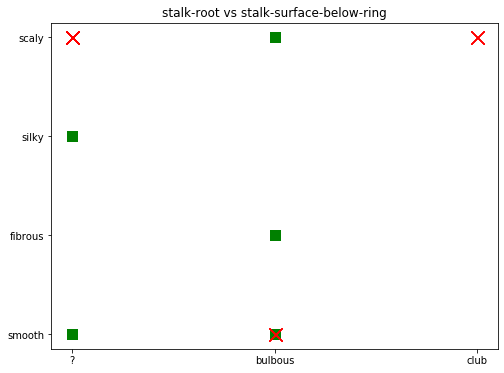

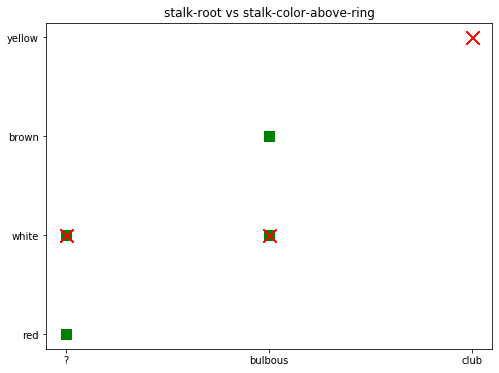

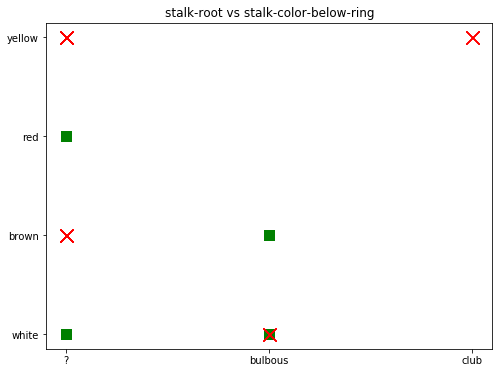

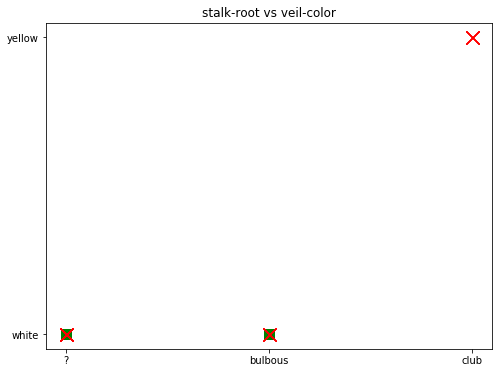

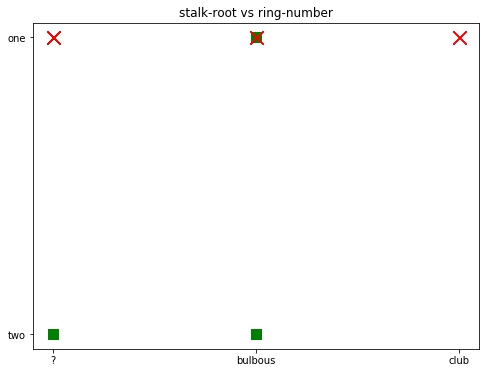

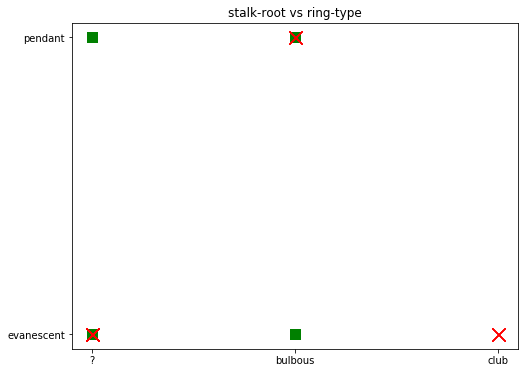

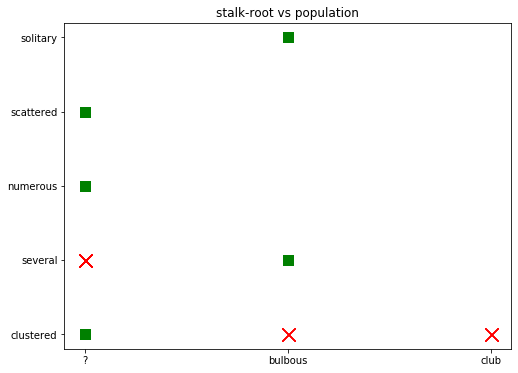

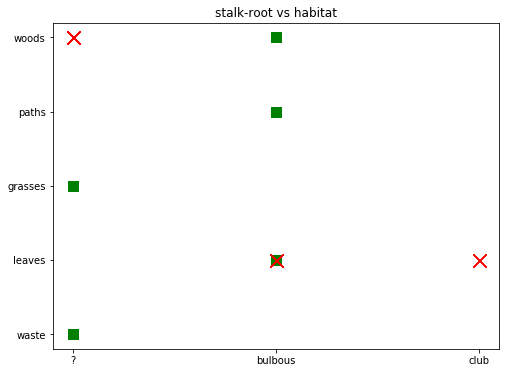

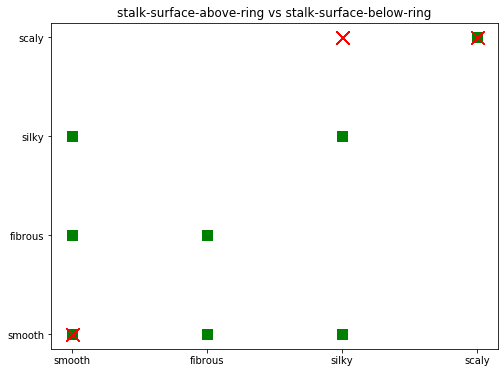

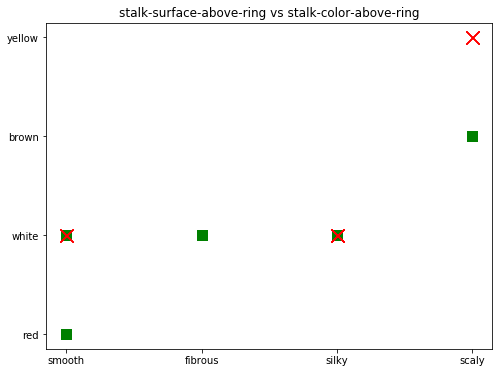

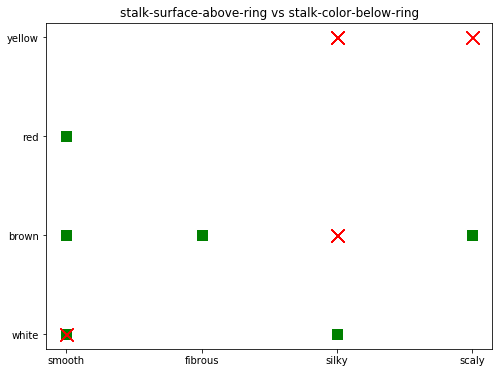

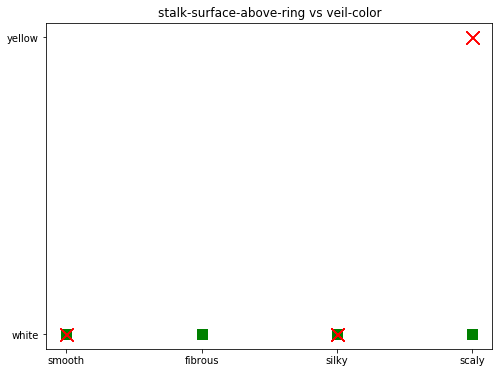

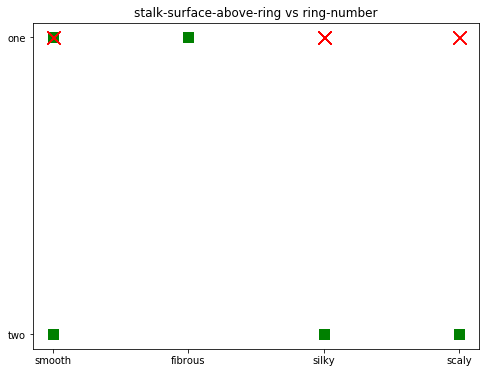

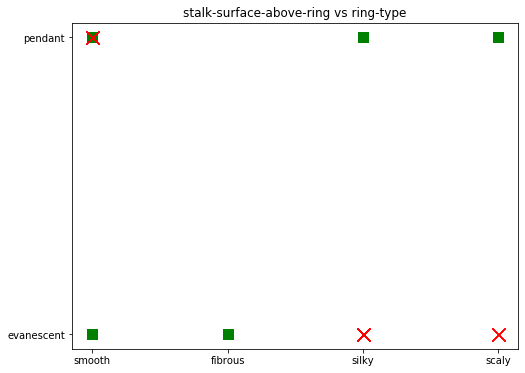

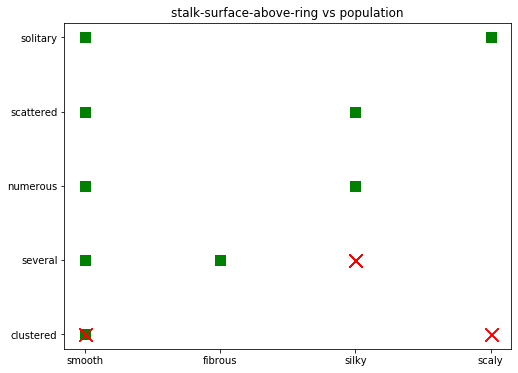

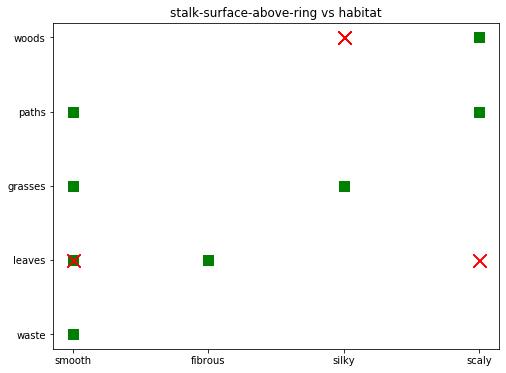

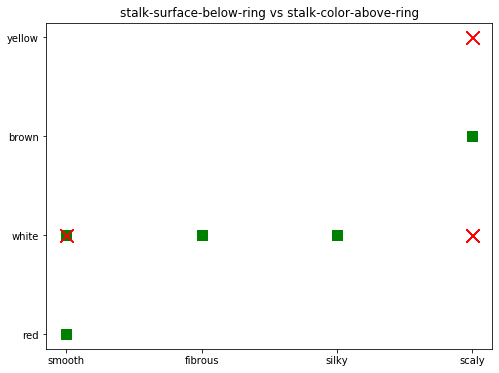

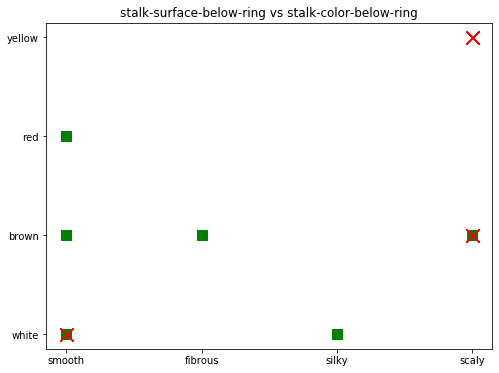

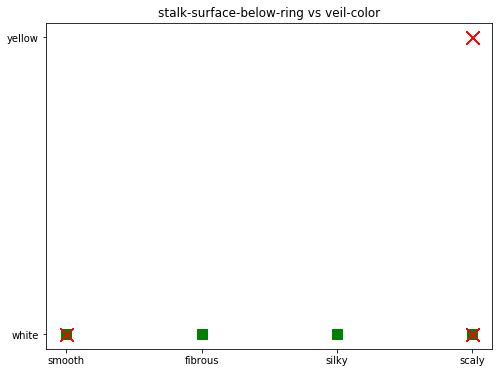

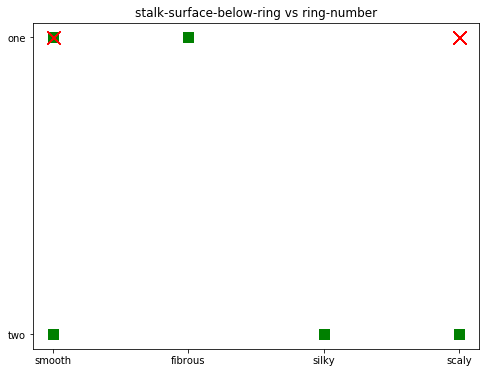

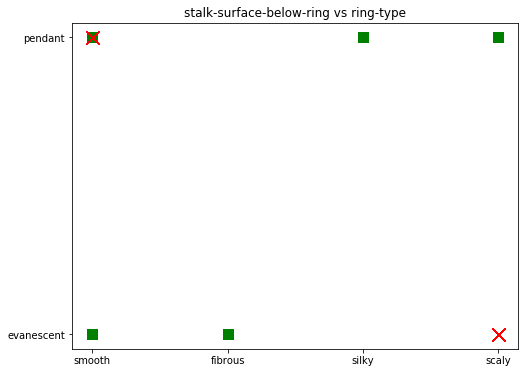

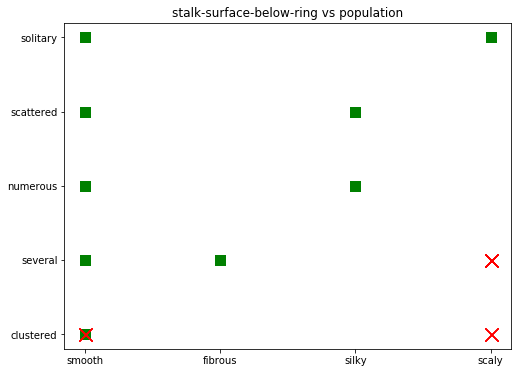

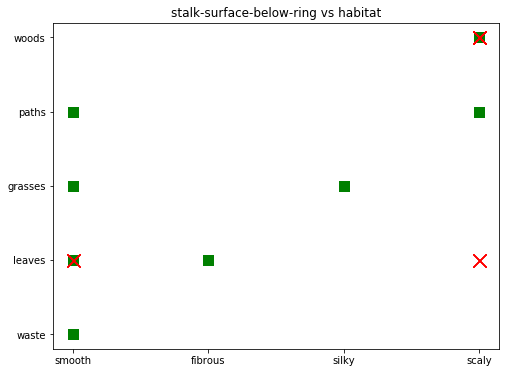

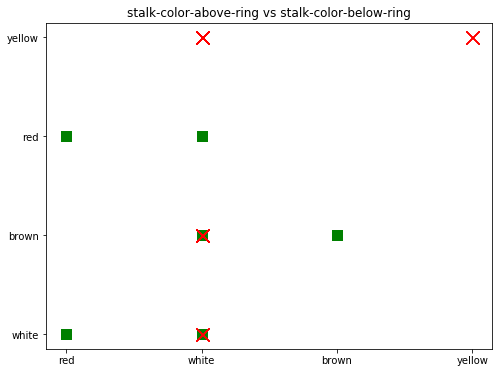

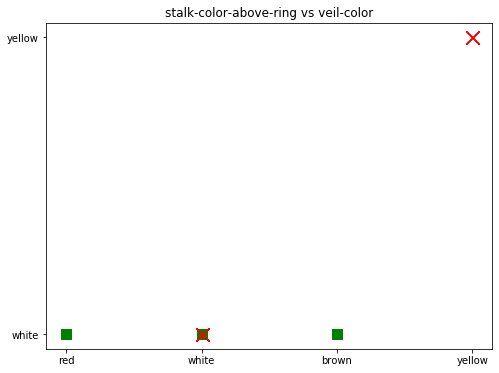

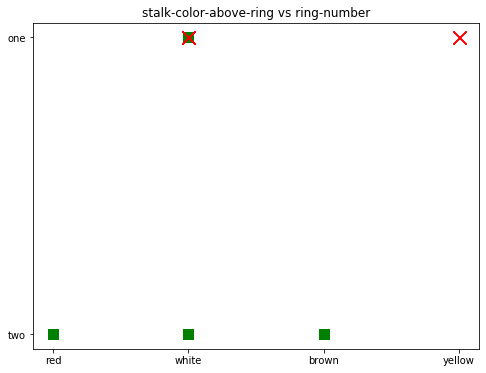

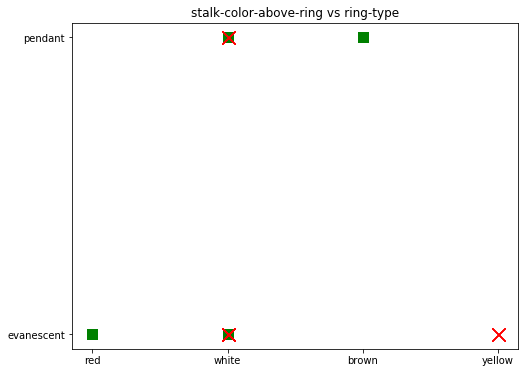

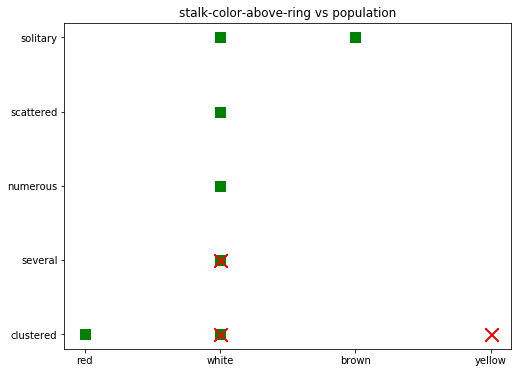

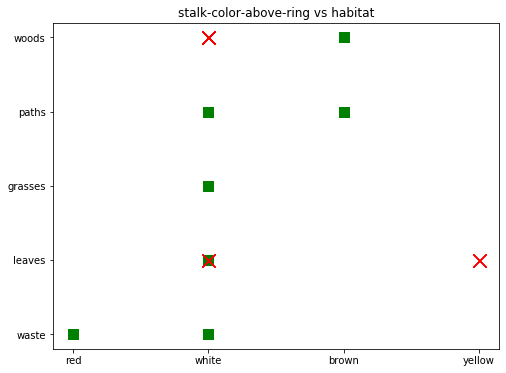

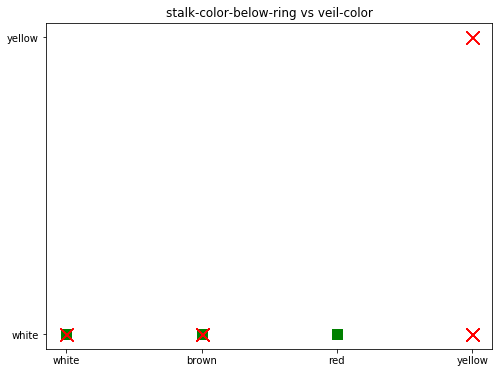

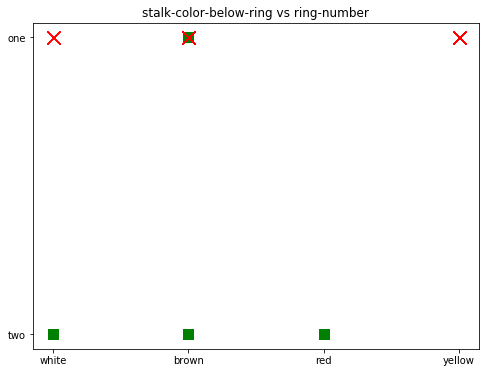

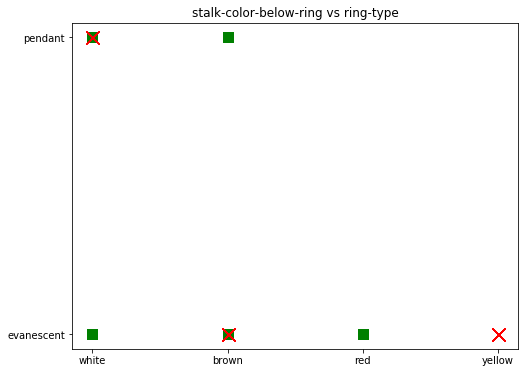

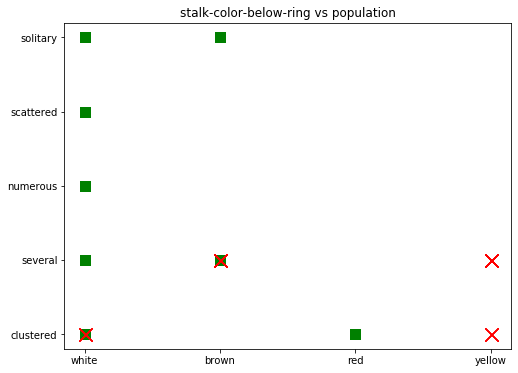

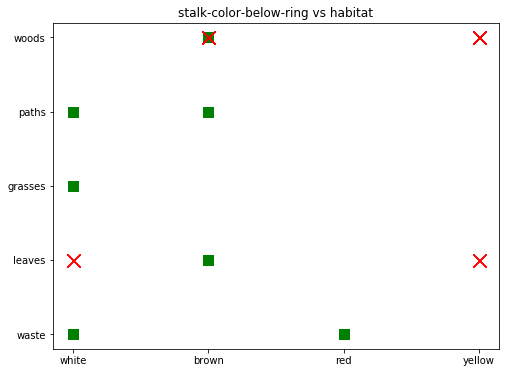

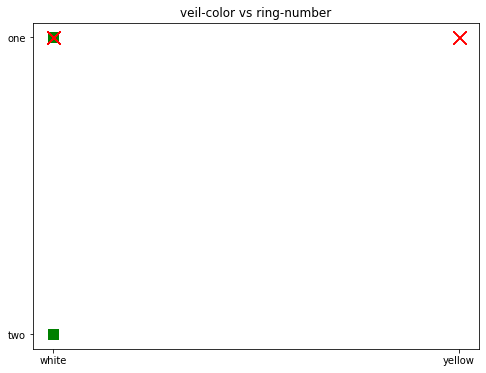

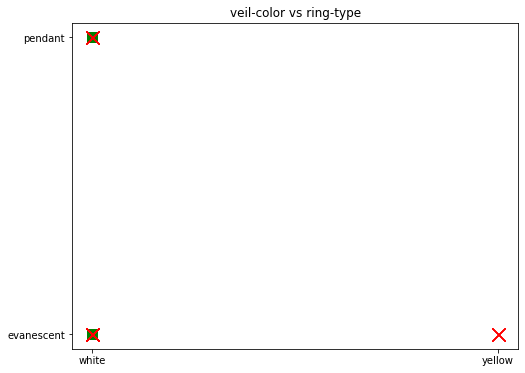

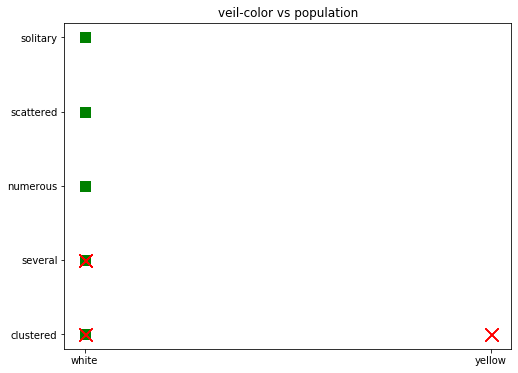

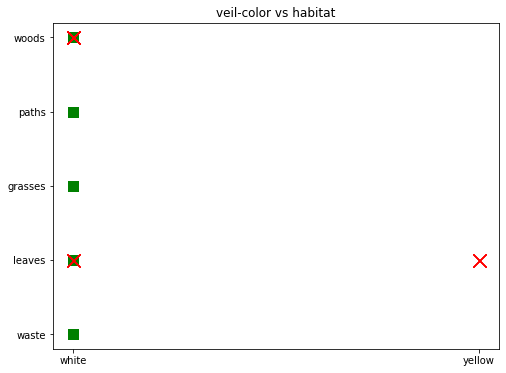

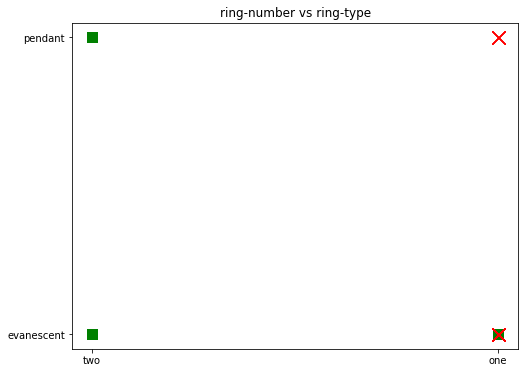

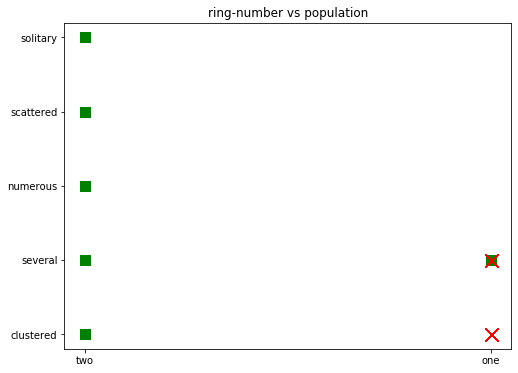

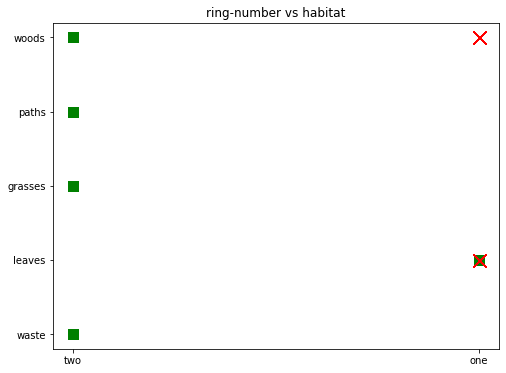

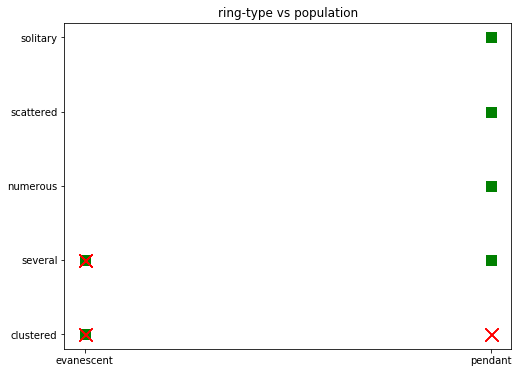

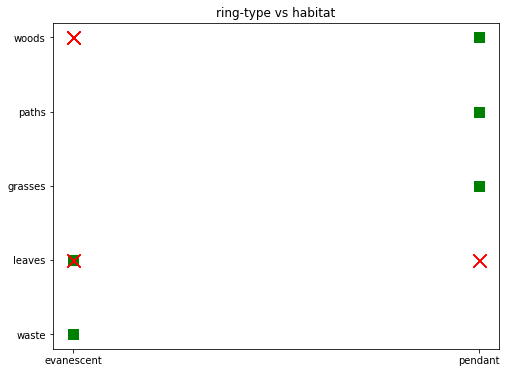

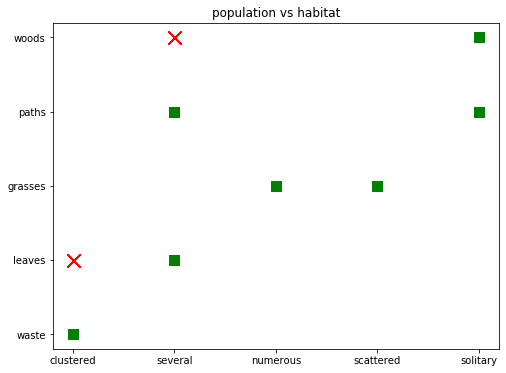

In [25]:
edi=odorn.loc[mush['class']=='edible',:]
poi=odorn.loc[mush['class']=='poisonous',:]
props=list(odorn.columns)
rem=['class','odor','spore-print-color']
props=[x for x in props if x not in rem]
leng=len(props)
for i in range(0,leng):
    for j in range(i+1,leng):
        plt.figure(figsize=(8,6))
        title=str(props[i]+' vs '+props[j])
        plt.title(title)
        plt.plot(props[i],props[j],'gs',data=edi,markersize=10)
        plt.plot(props[i],props[j],'rx',data=poi,markersize=13)
        name=str(props[i]+' vs '+props[j])
        plt.savefig(name)

From the 171 created graphs it was observed that there are about 60 cases where there is ambiguity in only one pair of variable and there are 2 cases where there is no ambiguity which are habitat and population & stalk root and population.

Text(0, 0.5, 'Habitat')

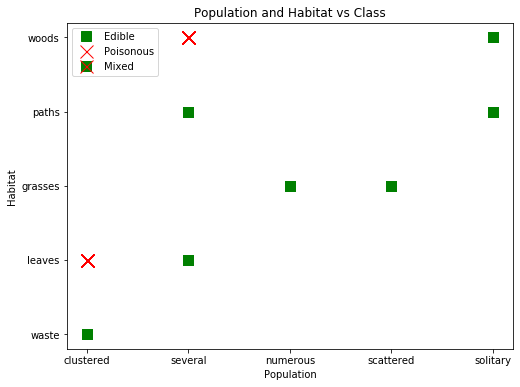

In [26]:
# For our dataset with odor as none and spore print color white
edi=odorn.loc[odorn['class']=='edible',:]
poi=odorn.loc[odorn['class']=='poisonous',:]
plt.figure(figsize=(8,6))
plt.title('Population and Habitat vs Class')
plt.plot('population','habitat','gs',data=edi,markersize=10)
plt.plot('population','habitat','rx',data=poi,markersize=13)
plt.xlabel('Population')
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])
plt.ylabel('Habitat')

From the above graphs we can conclude that if we know about the odor,spore print color, population and habitat properties of a mushroom we can make a good prediction. 

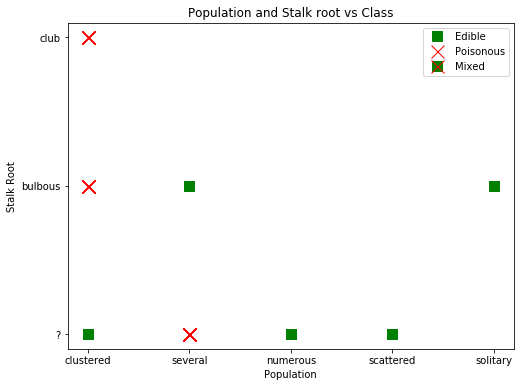

In [27]:
# For our dataset with odor as none and spore print color white
edi=odorn.loc[odorn['class']=='edible',:]
poi=odorn.loc[odorn['class']=='poisonous',:]
plt.figure(figsize=(8,6))
plt.title('Population and Stalk root vs Class')
plt.plot('population','stalk-root','gs',data=edi,markersize=10)
plt.plot('population','stalk-root','rx',data=poi,markersize=13)
plt.xlabel('Population')
plt.ylabel('Stalk Root')
plt.legend([greensq, (redx),(greensq,redx)], ["Edible", "Poisonous",'Mixed'])

But in stalk root we can see that there is we have a missing feature description. So ultimately we cant use it to predict the class of a mushroom.

We need not limit ourselves to the features talked about above. The above features just happen to be one set of features that can predict. There are more ways we can determine class of mushroom. It may require us to go for a more specific dataframe. But it can help us to predict mushroom class.

There is a limitation. The dataset is not an exhaustive collection of all possible mushrooms. There may be a mushroom that is poisonous if habitat is grasses and population is numerous(in above case). But with our way it would lead to us predicting it as edible. Also there maybe a combination of features that isnt featured in our graphs above(the empty spaces in intersection). We wont be able to predict those.

Overall Predictor: <br>
1) If odor is almond or anise then mushroom as edible.
<br>
2) If odor is pungent, foul, spicy, musty, fishy, creosote then mushroom is poisonous.
<br>
3) If odor is none and spore print color is green then mushroom is poisonous.
<br>
4) If odor is none and spore print color is white then we go to habitat and population properties.
<br>
5) In all other cases of odor being none then mushroom is edible.
<br>
6) In case of step 4:
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i) If population is numerous, scattered or solitary then mushroom is edible.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii) If population is several and habitat is leaves or path then mushroom is edible.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iii) If population is clustered and habitat is waste then mushroom is edible.
    <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;iv) If population is clustered and habitat is leaves then mushroom is poisonous.

### Myth Busting & Fact Checking

#### All white colored mushrooms are edible

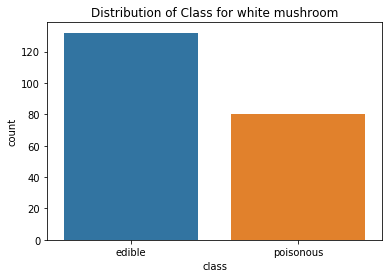

In [28]:
m1=mush.loc[((mush['cap-color']=='white') & (mush['gill-color']=='white') & (mush['veil-color']=='white') & (mush['stalk-color-above-ring']=='white')& (mush['stalk-color-below-ring']=='white')),:]
plt.title("Distribution of Class for white mushroom")
sb.countplot(x='class',data=m1)
plt.xticks(rotation=0)
plt.show()

###### Busted
In this we can see that an all white mushroom is not always edible. There is a one third chance that a whole white mushrrom is going to be poisonous.

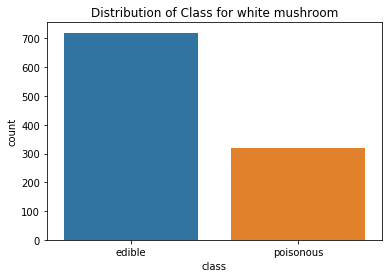

In [29]:
# Mushroom with a white main body only.
m1=mush.loc[((mush['cap-color']=='white')  & (mush['stalk-color-above-ring']=='white')& (mush['stalk-color-below-ring']=='white')),:]
plt.title("Distribution of Class for white mushroom")
sb.countplot(x='class',data=m1)
plt.xticks(rotation=0)
plt.show()

##### Busted
There is a roughly one third chance that mushroom with white main body will be poisonous.

#### Poisonous mushrooms smell and taste awful.

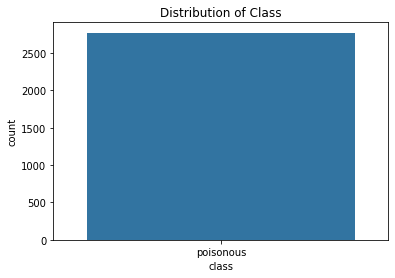

In [30]:
# Mushroom with foul or pungent or musty or fishy odor.
m2=mush.loc[((mush['odor']=='foul')  | (mush['odor']=='white') | (mush['odor']=='musty') | (mush['odor']=='fishy')),:]
plt.title("Distribution of Class")
sb.countplot(x='class',data=m2)
plt.xticks(rotation=0)
plt.show()

##### Unconfirmed
We can see that mushroom with foul or bad smells are poisonous but the myth claims that poisonous mushrooms smell bad.

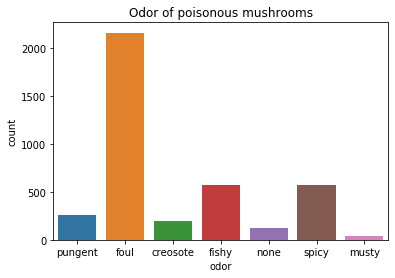

In [31]:
# Mushroom with poisonous class.
m2=mush.loc[(mush['class']=='poisonous'),:]
plt.title("Odor of poisonous mushrooms")
sb.countplot(x='odor',data=m2)
plt.xticks(rotation=0)
plt.show()

###### Busted
We can see that there are mushrooms with none,spicy and creosote odor also which are classed as poisonous. This means not all poisonous mushrooms smell awful. If the claim was that awful smelling mushrooms are poisonous then based on above graph we would have confirmed that.

#### Poisonous mushrooms always have bright, flashy colors.

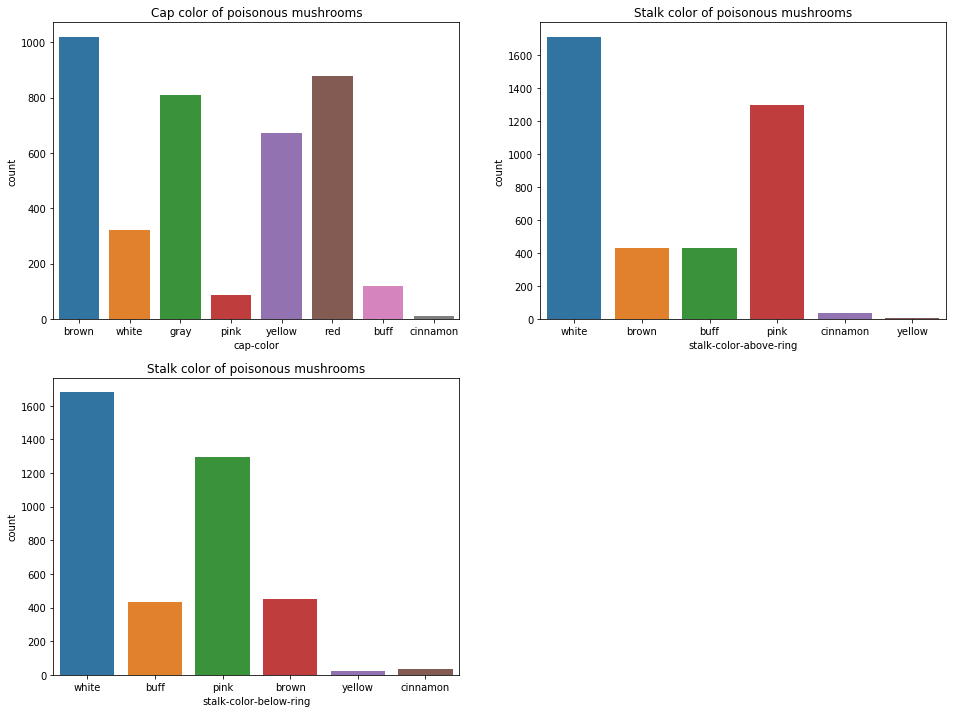

In [32]:
# We will consider just one of the color features
m3=mush.loc[(mush['class']=='poisonous'),:]
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.title("Cap color of poisonous mushrooms")
sb.countplot(x='cap-color',data=m3)
plt.xticks(rotation=0)
plt.subplot(2,2,2)
plt.title("Stalk color of poisonous mushrooms")
sb.countplot(x='stalk-color-above-ring',data=m3)
plt.xticks(rotation=0)
plt.subplot(2,2,3)
plt.title("Stalk color of poisonous mushrooms")
sb.countplot(x='stalk-color-below-ring',data=m3)
plt.xticks(rotation=0)
plt.show()

###### Busted
We can see that there are good number of mushrooms with non bright or flashy colours(brown, white and grey) are also poisonous. So we cant say that poisonous mushrooms are always having bright flashy colours.

#### All mushrooms that grow in woods, meadows and pastures are safe to eat. 

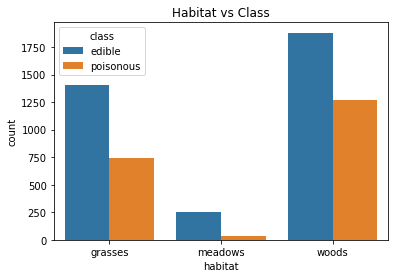

In [33]:
# Mushroom with habitat meadow and pastures.
m4=mush.loc[((mush['habitat']=='meadows')|(mush['habitat']=='grasses')|(mush['habitat']=='woods')),:]
plt.title("Habitat vs Class")
sb.countplot(x='habitat',hue='class',data=m4)
plt.xticks(rotation=0)
plt.show()

##### Busted
It can be seen that in all three habitats the mushrooms can be both edible and poisonous.

#### Poisonous mushrooms have pointy caps.

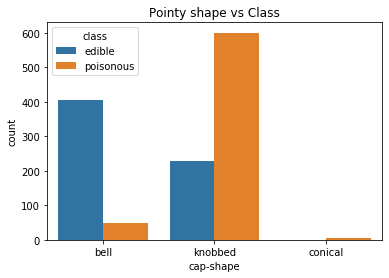

In [34]:
# Mushroom with bell or conical or knobbed shaped caps.
m5=mush.loc[((mush['cap-shape']=='conical')|(mush['cap-shape']=='knobbed')|(mush['cap-shape']=='bell')),:]
plt.title("Pointy shape vs Class")
sb.countplot(x='cap-shape',hue='class',data=m5)
plt.xticks(rotation=0)
plt.show()

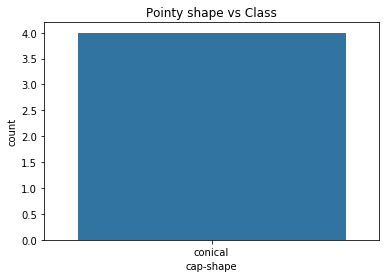

In [35]:
m5=mush.loc[mush['cap-shape']=='conical',:]
plt.title("Pointy shape vs Class")
sb.countplot(x='cap-shape',data=m5)
plt.xticks(rotation=0)
plt.show()

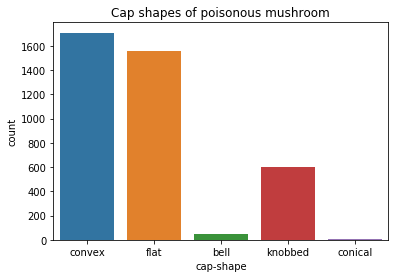

In [36]:
m5=mush.loc[(mush['class']=='poisonous'),:]
plt.title("Cap shapes of poisonous mushroom")
sb.countplot(x='cap-shape',data=m5)
ct=pd.crosstab(mush['cap-shape'],columns=mush['class'])
plt.xticks(rotation=0)
plt.show()

###### Busted?
We can see that bell and knobbed shaped mushrooms are both edible and poisonous. But in case of conical we have very less number of observations all of which point towards mushroom being poisonous.
On the other hand we can see that poisonous mushrooms come in all shapes and not necessarily pointy.

#### All mushrooms with blue colored gills are toxic.

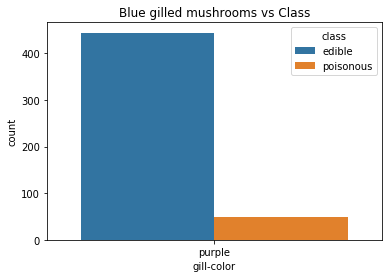

In [37]:
m6=mush.loc[(mush['gill-color']=='purple'),:]
plt.title("Blue gilled mushrooms vs Class")
sb.countplot(x='gill-color',hue='class',data=m6)
plt.xticks(rotation=0)
plt.show()

###### Busted
Majority of the blue or purple gill color mushrooms are edible.

### Classification using Decision Tree

In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder 
from sklearn import metrics

In [39]:
mush1=mush.drop(columns='class')
mush2=mush.loc[:,'class']

In [40]:
mush2=pd.DataFrame(mush2)
mush2['class']=mush2['class'].replace({'edible':0,'poisonous':1})
mush2.head()

class
0      1
1      0
2      0
3      1
4      0

In [41]:
mush1=pd.get_dummies(mush1)

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(mush1,mush2,test_size=0.1,random_state=0)

In [43]:
cl=DecisionTreeClassifier (criterion='gini')

In [44]:
cl=cl.fit(xtrain,ytrain)

In [45]:
ypred = cl.predict(xtest)

In [46]:
ypred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [47]:
print("Accuracy:",metrics.accuracy_score(ytest,ypred))

Accuracy: 1.0


In [48]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

D:\Software\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


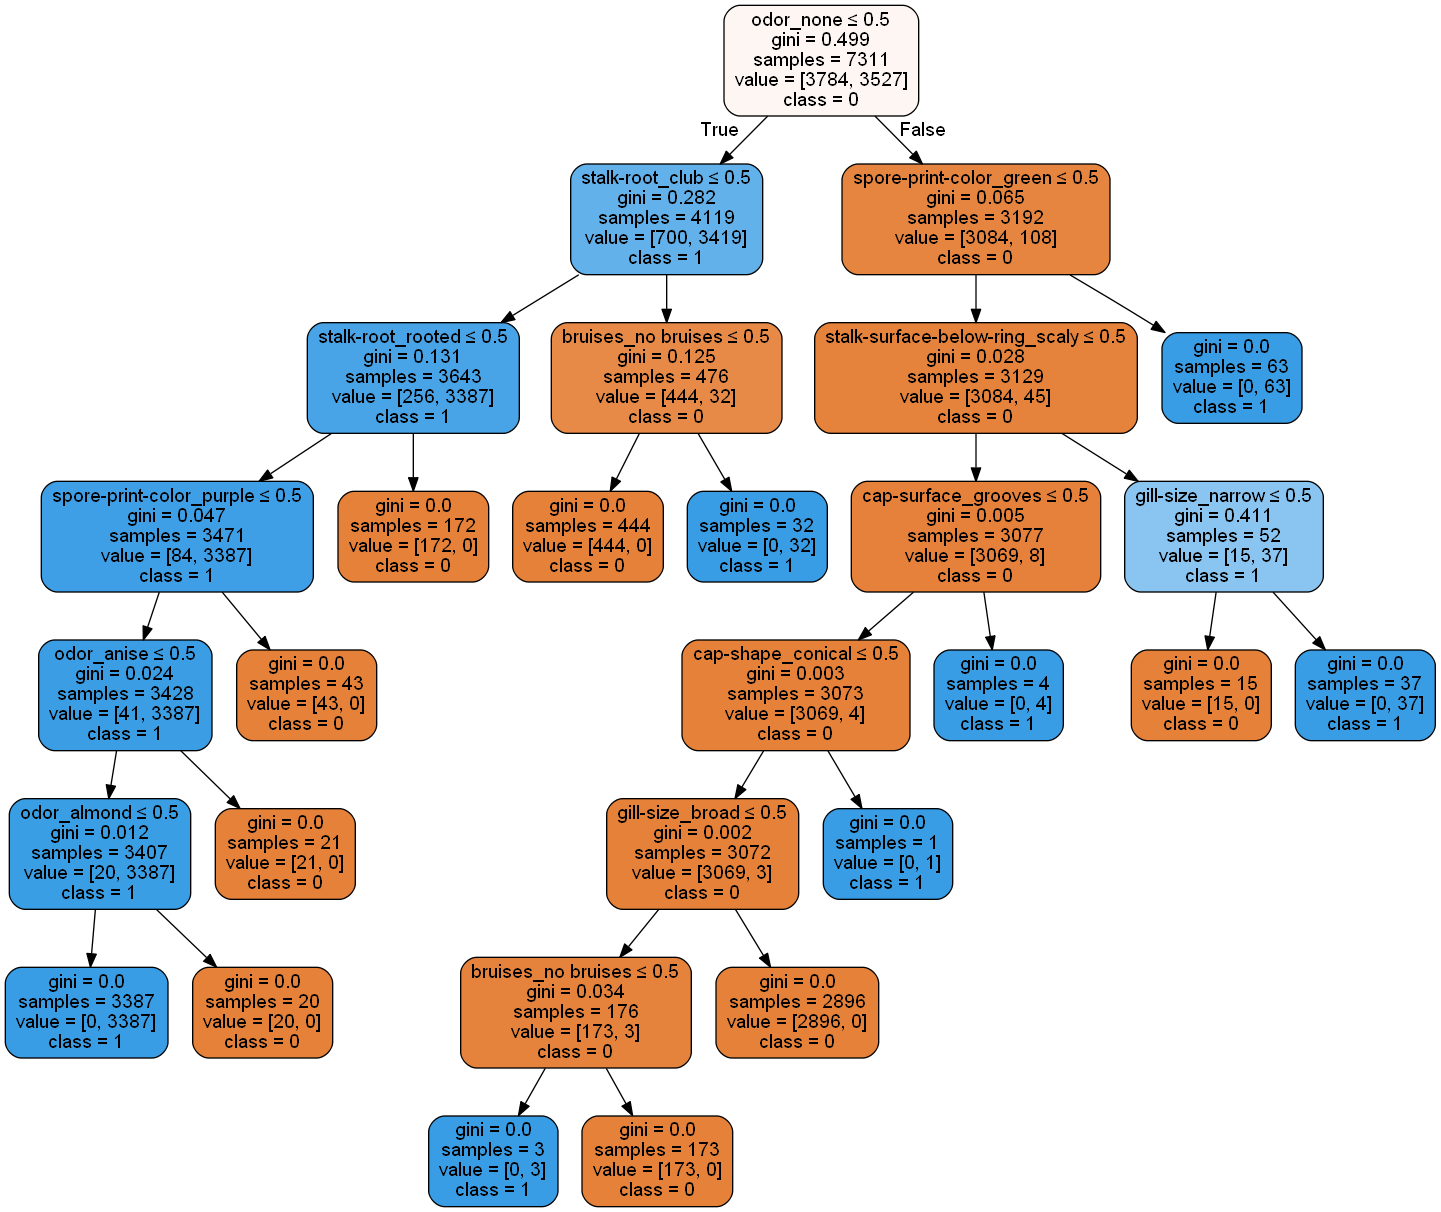

In [49]:
feature_cols =mush1.columns
dot_data = StringIO()
export_graphviz(cl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mushroom.png')
Image(graph.create_png())


In [50]:
print(confusion_matrix(ytest,ypred))

[[424   0]
 [  0 389]]


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(mush1,mush2,test_size=0.1,random_state=None)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain,ytrain) 

D:\Software\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
pred = classifier.predict(xtest)
cm = confusion_matrix(ytest,pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[405   0]
 [  0 408]]


In [67]:
import statsmodels.api as sm
xtrain=sm.add_constant(xtrain)
logit_model=sm.Logit(ytrain,xtrain)
result=logit_model.fit(maxiter=3500)
print(result.summary2())

         Current function value: inf
         Iterations: 3500


LinAlgError: Singular matrix

In [62]:
xtrain

cap-shape_bell  cap-shape_conical  cap-shape_convex  cap-shape_flat  \
1326               1                  0                 0               0   
594                0                  0                 1               0   
2485               0                  0                 1               0   
2803               0                  0                 0               1   
7172               0                  0                 1               0   
...              ...                ...               ...             ...   
740                0                  0                 1               0   
80                 0                  0                 1               0   
2696               0                  0                 0               1   
6476               0                  0                 1               0   
7120               0                  0                 1               0   

      cap-shape_knobbed  cap-shape_sunken  cap-surface_fibrous  \
1326                  0                 0                    0   
594                   0                 0                    0   
2485                  0                 0                    0   
2803                  0                 0                    1   
7172                  0                 0                    0   
...                 ...               ...                  ...   
740                   0                 0                    1   
80                    0                 0                    0   
2696                  0                 0                    1   
6476                  0                 0                    0   
7120                  0                 0                    0   

      cap-surface_grooves  cap-surface_scaly  cap-surface_smooth  \
1326                    0                  0                   1   
594                     0                  0                   1   
2485                    0                  1                   0   
2803                    0                  0                   0   
7172                    0                  0                   1   
...                   ...                ...                 ...   
740                     0                  0                   0   
80                      0                  0                   1   
2696                    0                  0                   0   
6476                    0                  0                   1   
7120                    0                  0                   1   

      cap-color_brown  cap-color_buff  ...  population_clustered  \
1326                0               0  ...                     0   
594                 0               0  ...                     0   
2485                1               0  ...                     0   
2803                0               0  ...                     0   
7172                0               0  ...                     0   
...               ...             ...  ...                   ...   
740                 1               0  ...                     0   
80                  1               0  ...                     0   
2696                1               0  ...                     0   
6476                1               0  ...                     0   
7120                1               0  ...                     0   

      population_numerous  population_scattered  population_several  \
1326                    1                     0                   0   
594                     1                     0                   0   
2485                    0                     0                   0   
2803                    0                     0                   1   
7172                    0                     0                   1   
...                   ...                   ...                 ...   
740                     0                     0                   1   
80                      0                     1                   0   
2696           